# Setup

In [32]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', family='AppleGothic')
# plt.rcParams['axes.unicode_minus'] = False
pd.set_option('display.max_rows', None)

import pickle
import catboost

# Investment Simulation

In [33]:
df_top10 = pd.read_csv('./data/df_top10.csv')    
display(df_top10.head(3))
display(df_top10.tail(3))

,date,year,permno,ticker,ret,ret_pred,me_last_year
0,2017-01-31,2017,83443,BRK,0.007117,0.007911,7.573290e+07
1,2017-01-31,2017,12369,GM,0.050804,0.007909,9.011816e+07
2,2017-01-31,2017,77418,TWX,0.003315,0.007902,9.555091e+07


,date,year,permno,ticker,ret,ret_pred,me_last_year
627,2022-03-31,2022,18163,PG,-0.019822,0.009123,1.390232e+08
628,2022-03-31,2022,57665,NKE,-0.012340,0.009122,3.880286e+08
629,2022-03-31,2022,77274,GILD,-0.003642,0.009119,1.992143e+08


### 어떤 회사들이 속해있는지 알아보기

In [34]:
# for year in df_top10_100['year'].unique():
#     print(year)
#     tmp = df_top10_100[df_top10_100['year']==year]
# #     print(tmp['ticker'].unique())
#     a = pd.DataFrame(tmp['ticker'].unique())
#     a = a.sort_values(by=0)
#     display(a)

## 1. All 매수

In [35]:
## all 매수
def Long(df):
    df['date'] = pd.to_datetime(df['date'])
    df['yyyy_mm'] = df['date'].apply(lambda x: x.strftime('%Y-%m')) 

    ym_list = df['yyyy_mm'].unique()
    seed_list1 = [] ; seed_list2 = [] ; seed_list3 = []

    initial = 1000000
    print(f'initial seed: {initial} \n')

    initial_1 = 1000000 ; initial_2 = 1000000 ; initial_3 = 1000000
    ret1 = 0 ; ret2 = 0 ; ret3 = 0

    for i in range(len(ym_list)):
        yyyy_mm = ym_list[i] ; print(f'\n ###### Trading Month {yyyy_mm} ###### \n')
        initial_1 += ret1 ; seed_list1.append(initial_1)
        initial_2 += ret2 ; seed_list2.append(initial_2)
        initial_3 += ret3 ; seed_list3.append(initial_3)
        print(f'weight1로 top10 all 매도 ===> seed: {round(initial_1, 2)}')
        print(f'weight2로 top10 all 매도 ===> seed: {round(initial_2, 2)}')
        print(f'weight3로 top10 all 매도 ===> seed: {round(initial_3, 2)}')


        df1 = df[df['yyyy_mm'] == yyyy_mm]
        nrow = df1.shape[0]
        df1['weight1'] = 1/nrow # w1: equal weight
        df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
        df1['weight3'] = abs(df1['ret_pred'])/abs(df1['ret_pred']).sum() # w3: predicted return에 비례

        df1 = df1[['yyyy_mm','permno','ticker','ret','weight1','weight2','weight3']]
        display(df1)
        ret1 = round(sum(df1['ret'] * df1['weight1'] * initial_1), 2)
        ret2 = round(sum(df1['ret'] * df1['weight2'] * initial_2), 2)
        ret3 = round(sum(df1['ret'] * df1['weight3'] * initial_3), 2)

        if i >= len(ym_list)-1: 
            break
        else:
            print(f'\nreturn 1 of {ym_list[i+1]}: {ret1}')    
            print(f'return 2 of {ym_list[i+1]}: {ret2}')    
            print(f'return 3 of {ym_list[i+1]}: {ret3}')
        
    return seed_list1, seed_list2, seed_list3

## 1-1. AnnualCap=100

In [36]:
df_top10['date'] = pd.to_datetime(df_top10['date'])
df_top10['yyyy_mm'] = df_top10['date'].apply(lambda x: x.strftime('%Y-%m')) 
ym_list = df_top10['yyyy_mm'].unique()
ym_list

array(['2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06',
       '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12',
       '2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06',
       '2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12',
       '2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06',
       '2019-07', '2019-08', '2019-09', '2019-10', '2019-11', '2019-12',
       '2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06',
       '2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12',
       '2021-01', '2021-02', '2021-03', '2021-04', '2021-05', '2021-06',
       '2021-07', '2021-08', '2021-09', '2021-10', '2021-11', '2021-12',
       '2022-01', '2022-02', '2022-03'], dtype=object)

In [37]:
seed_list1, seed_list2, seed_list3 = Long(df_top10)

initial seed: 1000000 


 ###### Trading Month 2017-01 ###### 

weight1로 top10 all 매도 ===> seed: 1000000
weight2로 top10 all 매도 ===> seed: 1000000
weight3로 top10 all 매도 ===> seed: 1000000


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:29: SettingWithCopyWarning: 
A value is trying to

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
0,2017-01,83443,BRK,0.007117,0.1,0.079820,0.100168
1,2017-01,12369,GM,0.050804,0.1,0.094982,0.100141
2,2017-01,77418,TWX,0.003315,0.1,0.100708,0.100064
3,2017-01,18163,PG,0.049828,0.1,0.099008,0.100039
4,2017-01,86783,PCLN,0.074397,0.1,0.057932,0.100012
5,2017-01,49154,TGT,-0.107296,0.1,0.093510,0.099958
6,2017-01,87055,COST,0.023983,0.1,0.093315,0.099930
7,2017-01,57665,NKE,0.040724,0.1,0.246583,0.099917
8,2017-01,89006,MDLZ,-0.001128,0.1,0.053466,0.099905
9,2017-01,77668,ESRX,0.001308,0.1,0.080677,0.099866



return 1 of 2017-02: 14305.2
return 2 of 2017-02: 17262.43
return 3 of 2017-02: 14316.0

 ###### Trading Month 2017-02 ###### 

weight1로 top10 all 매도 ===> seed: 1014305.2
weight2로 top10 all 매도 ===> seed: 1017262.43
weight3로 top10 all 매도 ===> seed: 1014316.0


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:29: SettingWithCopyWarning: 
A value is trying to

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
10,2017-02,86783,PCLN,0.094595,0.1,0.057040,0.100438
11,2017-02,83443,BRK,0.044352,0.1,0.078591,0.100207
12,2017-02,12369,GM,0.006282,0.1,0.093519,0.100028
13,2017-02,87055,COST,0.083440,0.1,0.091878,0.099992
14,2017-02,18163,PG,0.039612,0.1,0.097483,0.099974
15,2017-02,77418,TWX,0.018198,0.1,0.099157,0.099936
16,2017-02,77668,ESRX,0.025697,0.1,0.079435,0.099897
17,2017-02,57665,NKE,0.080529,0.1,0.242785,0.099865
18,2017-02,89525,CMCSA,-0.007690,0.1,0.068042,0.099859
19,2017-02,49154,TGT,-0.079249,0.1,0.092070,0.099804



return 1 of 2017-03: 31014.09
return 2 of 2017-03: 37205.31
return 3 of 2017-03: 31066.14

 ###### Trading Month 2017-03 ###### 

weight1로 top10 all 매도 ===> seed: 1045319.29
weight2로 top10 all 매도 ===> seed: 1054467.74
weight3로 top10 all 매도 ===> seed: 1045382.14


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:29: SettingWithCopyWarning: 
A value is trying to

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
20,2017-03,86783,PCLN,0.032387,0.1,0.058559,0.100620
21,2017-03,12369,GM,-0.029859,0.1,0.096010,0.100019
22,2017-03,77668,ESRX,-0.067091,0.1,0.081551,0.099991
23,2017-03,77418,TWX,-0.005091,0.1,0.101798,0.099973
24,2017-03,87055,COST,-0.053561,0.1,0.094325,0.099964
25,2017-03,89006,MDLZ,-0.014800,0.1,0.054045,0.099946
26,2017-03,89525,CMCSA,0.004543,0.1,0.069855,0.099938
27,2017-03,18163,PG,-0.013396,0.1,0.100080,0.099911
28,2017-03,57665,NKE,-0.021868,0.1,0.249253,0.099844
29,2017-03,49154,TGT,-0.060915,0.1,0.094523,0.099795



return 1 of 2017-04: -24005.95
return 2 of 2017-04: -26407.95
return 3 of 2017-04: -23965.76

 ###### Trading Month 2017-04 ###### 

weight1로 top10 all 매도 ===> seed: 1021313.34
weight2로 top10 all 매도 ===> seed: 1028059.79
weight3로 top10 all 매도 ===> seed: 1021416.38


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:29: SettingWithCopyWarning: 
A value is trying to

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
30,2017-04,86783,PCLN,0.037557,0.1,0.057781,0.100661
31,2017-04,89006,MDLZ,0.045265,0.1,0.053327,0.100045
32,2017-04,77668,ESRX,-0.069337,0.1,0.080468,0.100035
33,2017-04,12369,GM,-0.020362,0.1,0.094735,0.100024
34,2017-04,77418,TWX,0.015966,0.1,0.100446,0.099947
35,2017-04,18163,PG,-0.020372,0.1,0.098750,0.099941
36,2017-04,89525,CMCSA,0.046754,0.1,0.068927,0.099886
37,2017-04,87055,COST,0.058620,0.1,0.093072,0.099876
38,2017-04,57665,NKE,-0.005742,0.1,0.245941,0.099804
39,2017-04,11308,KO,0.016730,0.1,0.106553,0.099779



return 1 of 2017-05: 10731.79
return 2 of 2017-05: 5876.82
return 3 of 2017-05: 10742.17

 ###### Trading Month 2017-05 ###### 

weight1로 top10 all 매도 ===> seed: 1032045.13
weight2로 top10 all 매도 ===> seed: 1033936.61
weight3로 top10 all 매도 ===> seed: 1032158.55


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:29: SettingWithCopyWarning: 
A value is trying to

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
40,2017-05,16429,LEXEA,0.079901,0.1,0.086584,0.107976
41,2017-05,83443,BRK,0.000424,0.1,0.079933,0.100583
42,2017-05,70519,C,0.024019,0.1,0.088505,0.100476
43,2017-05,12369,GM,-0.020497,0.1,0.095116,0.100407
44,2017-05,86946,RAI,0.042636,0.1,0.095771,0.100373
45,2017-05,86783,PCLN,0.016390,0.1,0.058014,0.098163
46,2017-05,57665,NKE,-0.043674,0.1,0.246932,0.098019
47,2017-05,18163,PG,0.008703,0.1,0.099148,0.098015
48,2017-05,89525,CMCSA,0.063792,0.1,0.069204,0.098009
49,2017-05,77668,ESRX,-0.025921,0.1,0.080792,0.097979



return 1 of 2017-06: 15044.28
return 2 of 2017-06: 4715.83
return 3 of 2017-06: 15686.95

 ###### Trading Month 2017-06 ###### 

weight1로 top10 all 매도 ===> seed: 1047089.41
weight2로 top10 all 매도 ===> seed: 1038652.44
weight3로 top10 all 매도 ===> seed: 1047845.5


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:29: SettingWithCopyWarning: 
A value is trying to

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
50,2017-06,16429,LEXEA,0.035461,0.1,0.084535,0.101885
51,2017-06,83443,BRK,0.024746,0.1,0.078041,0.101310
52,2017-06,12369,GM,0.040672,0.1,0.092865,0.101198
53,2017-06,86946,RAI,-0.025279,0.1,0.093504,0.101123
54,2017-06,70519,C,0.104724,0.1,0.086410,0.100085
55,2017-06,86783,PCLN,-0.003500,0.1,0.056641,0.099061
56,2017-06,57665,NKE,0.116814,0.1,0.241088,0.098946
57,2017-06,18163,PG,-0.010671,0.1,0.096801,0.098866
58,2017-06,77668,ESRX,0.068452,0.1,0.078880,0.098777
59,2017-06,87055,COST,-0.113617,0.1,0.091235,0.098748



return 1 of 2017-07: 24900.01
return 2 of 2017-07: 38800.26
return 3 of 2017-07: 25001.06

 ###### Trading Month 2017-07 ###### 

weight1로 top10 all 매도 ===> seed: 1071989.42
weight2로 top10 all 매도 ===> seed: 1077452.7
weight3로 top10 all 매도 ===> seed: 1072846.56


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:29: SettingWithCopyWarning: 
A value is trying to

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
60,2017-07,16429,LEXEA,0.056090,0.1,0.114881,0.103924
61,2017-07,12369,GM,0.030060,0.1,0.126201,0.101150
62,2017-07,83443,BRK,0.033064,0.1,0.106056,0.100633
63,2017-07,16597,AYX,0.030738,0.1,0.003908,0.099597
64,2017-07,49154,TGT,0.083764,0.1,0.124246,0.099398
65,2017-07,25785,F,0.016086,0.1,0.091558,0.099305
66,2017-07,86783,PCLN,0.084458,0.1,0.076973,0.099112
67,2017-07,77668,ESRX,-0.018797,0.1,0.107195,0.099100
68,2017-07,18163,PG,0.050024,0.1,0.131551,0.098924
69,2017-07,70519,C,0.023475,0.1,0.117430,0.098856



return 1 of 2017-08: 41696.21
return 2 of 2017-08: 42632.17
return 3 of 2017-08: 41797.02

 ###### Trading Month 2017-08 ###### 

weight1로 top10 all 매도 ===> seed: 1113685.63
weight2로 top10 all 매도 ===> seed: 1120084.87
weight3로 top10 all 매도 ===> seed: 1114643.58


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:29: SettingWithCopyWarning: 
A value is trying to

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
70,2017-08,16429,LEXEA,-0.041367,0.1,0.085725,0.102220
71,2017-08,12369,GM,0.015564,0.1,0.094173,0.101342
72,2017-08,83443,BRK,0.035378,0.1,0.079140,0.100154
73,2017-08,86783,PCLN,-0.086971,0.1,0.057438,0.099615
74,2017-08,49154,TGT,-0.026822,0.1,0.092714,0.099559
75,2017-08,25785,F,-0.016934,0.1,0.068322,0.099502
76,2017-08,18163,PG,0.015966,0.1,0.098165,0.099443
77,2017-08,77668,ESRX,0.002874,0.1,0.079990,0.099434
78,2017-08,57665,NKE,-0.102625,0.1,0.244483,0.099416
79,2017-08,77418,TWX,-0.012888,0.1,0.099850,0.099316



return 1 of 2017-09: -24258.97
return 2 of 2017-09: -36402.36
return 3 of 2017-09: -24227.99

 ###### Trading Month 2017-09 ###### 

weight1로 top10 all 매도 ===> seed: 1089426.66
weight2로 top10 all 매도 ===> seed: 1083682.51
weight3로 top10 all 매도 ===> seed: 1090415.59


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:29: SettingWithCopyWarning: 
A value is trying to

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
80,2017-09,16429,LEXEA,-0.028890,0.1,0.096806,0.103592
81,2017-09,16597,AYX,-0.136498,0.1,0.003293,0.101211
82,2017-09,12369,GM,0.115490,0.1,0.106346,0.101092
83,2017-09,25785,F,0.085222,0.1,0.077153,0.100002
84,2017-09,49154,TGT,0.082157,0.1,0.104698,0.099500
85,2017-09,57665,NKE,-0.018178,0.1,0.276085,0.099191
86,2017-09,86783,PCLN,-0.011479,0.1,0.064863,0.099142
87,2017-09,87842,MET,0.109332,0.1,0.091056,0.098847
88,2017-09,83443,BRK,0.011923,0.1,0.089370,0.098719
89,2017-09,77668,ESRX,0.007959,0.1,0.090330,0.098703



return 1 of 2017-10: 23644.56
return 2 of 2017-10: 32715.09
return 3 of 2017-10: 23326.99

 ###### Trading Month 2017-10 ###### 

weight1로 top10 all 매도 ===> seed: 1113071.22
weight2로 top10 all 매도 ===> seed: 1116397.6
weight3로 top10 all 매도 ===> seed: 1113742.58


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:29: SettingWithCopyWarning: 
A value is trying to

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
90,2017-10,16429,LEXEA,-0.131990,0.1,0.090669,0.104786
91,2017-10,12369,GM,0.064388,0.1,0.099603,0.100324
92,2017-10,83443,BRK,0.019747,0.1,0.083704,0.099636
93,2017-10,57665,NKE,0.060559,0.1,0.258581,0.099601
94,2017-10,16597,AYX,0.108984,0.1,0.003085,0.099362
95,2017-10,25785,F,0.037594,0.1,0.072261,0.099318
96,2017-10,18163,PG,-0.043421,0.1,0.103825,0.099291
97,2017-10,49154,TGT,0.000508,0.1,0.098060,0.099243
98,2017-10,77668,ESRX,-0.032059,0.1,0.084603,0.099223
99,2017-10,77418,TWX,-0.036676,0.1,0.105608,0.099217



return 1 of 2017-11: 5302.01
return 2 of 2017-11: 4205.6
return 3 of 2017-11: 4577.61

 ###### Trading Month 2017-11 ###### 

weight1로 top10 all 매도 ===> seed: 1118373.23
weight2로 top10 all 매도 ===> seed: 1120603.2
weight3로 top10 all 매도 ===> seed: 1118320.19


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:29: SettingWithCopyWarning: 
A value is trying to

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
100,2017-11,16429,LEXEA,-0.022126,0.1,0.084651,0.108924
101,2017-11,19502,WBA,0.103969,0.1,0.097915,0.099918
102,2017-11,12369,GM,0.002559,0.1,0.092993,0.099203
103,2017-11,57665,NKE,0.098745,0.1,0.241420,0.098950
104,2017-11,77668,ESRX,0.063469,0.1,0.078988,0.098927
105,2017-11,25785,F,0.020375,0.1,0.067466,0.098900
106,2017-11,18163,PG,0.042275,0.1,0.096935,0.098859
107,2017-11,49154,TGT,0.025068,0.1,0.091552,0.098822
108,2017-11,87055,COST,0.148063,0.1,0.091361,0.098769
109,2017-11,86783,PCLN,-0.090091,0.1,0.056719,0.098729



return 1 of 2017-12: 43874.43
return 2 of 2017-12: 60044.48
return 3 of 2017-12: 43259.85

 ###### Trading Month 2017-12 ###### 

weight1로 top10 all 매도 ===> seed: 1162247.66
weight2로 top10 all 매도 ===> seed: 1180647.68
weight3로 top10 all 매도 ===> seed: 1161580.04


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:29: SettingWithCopyWarning: 
A value is trying to

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
110,2017-12,16429,LEXEA,-0.016637,0.1,0.086663,0.110406
111,2017-12,57665,NKE,0.038563,0.1,0.247156,0.099052
112,2017-12,12369,GM,-0.039916,0.1,0.095203,0.099023
113,2017-12,86783,PCLN,-0.001132,0.1,0.058066,0.098845
114,2017-12,25785,F,-0.002396,0.1,0.069069,0.098842
115,2017-12,77668,ESRX,0.145137,0.1,0.080865,0.098825
116,2017-12,18163,PG,0.021002,0.1,0.099238,0.098821
117,2017-12,87055,COST,0.009163,0.1,0.093532,0.098771
118,2017-12,77418,TWX,-0.000437,0.1,0.100942,0.098730
119,2017-12,89525,CMCSA,0.066862,0.1,0.069267,0.098685



return 1 of 2018-01: 25593.67
return 2 of 2018-01: 27536.17
return 3 of 2018-01: 25044.06

 ###### Trading Month 2018-01 ###### 

weight1로 top10 all 매도 ===> seed: 1187841.33
weight2로 top10 all 매도 ===> seed: 1208183.85
weight3로 top10 all 매도 ===> seed: 1186624.1


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:29: SettingWithCopyWarning: 
A value is trying to

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
120,2018-01,76841,BIIB,0.091785,0.1,0.105647,0.100064
121,2018-01,57665,NKE,0.090648,0.1,0.139829,0.100059
122,2018-01,59328,INTC,0.042894,0.1,0.044255,0.100027
123,2018-01,12369,GM,0.034643,0.1,0.037585,0.100023
124,2018-01,87055,COST,0.047013,0.1,0.045479,0.100003
125,2018-01,76076,CSCO,0.092167,0.1,0.033741,0.099980
126,2018-01,66800,AIG,0.072843,0.1,0.111524,0.099970
127,2018-01,90319,GOOG,0.122290,0.1,0.049225,0.099960
128,2018-01,10145,HON,0.041145,0.1,0.393580,0.099958
129,2018-01,14008,AMGN,0.069868,0.1,0.039135,0.099956



return 1 of 2018-02: 83777.85
return 2 of 2018-02: 77193.06
return 3 of 2018-02: 83691.55

 ###### Trading Month 2018-02 ###### 

weight1로 top10 all 매도 ===> seed: 1271619.18
weight2로 top10 all 매도 ===> seed: 1285376.91
weight3로 top10 all 매도 ===> seed: 1270315.65


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:29: SettingWithCopyWarning: 
A value is trying to

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
130,2018-02,87842,MET,-0.030788,0.1,0.073851,0.100247
131,2018-02,87055,COST,-0.017807,0.1,0.083498,0.100062
132,2018-02,57665,NKE,-0.017444,0.1,0.256720,0.100062
133,2018-02,19393,BMY,0.057508,0.1,0.054816,0.100013
134,2018-02,76076,CSCO,0.077997,0.1,0.061946,0.099963
135,2018-02,13928,COP,-0.071671,0.1,0.108120,0.099958
136,2018-02,18163,PG,-0.090572,0.1,0.097168,0.099947
137,2018-02,90319,GOOG,-0.066231,0.1,0.090375,0.099929
138,2018-02,14008,AMGN,-0.005160,0.1,0.071850,0.099910
139,2018-02,49656,BK,0.005820,0.1,0.101655,0.099908



return 1 of 2018-03: -20135.9
return 2 of 2018-03: -29010.13
return 3 of 2018-03: -20114.59

 ###### Trading Month 2018-03 ###### 

weight1로 top10 all 매도 ===> seed: 1251483.28
weight2로 top10 all 매도 ===> seed: 1256366.78
weight3로 top10 all 매도 ===> seed: 1250201.06


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:29: SettingWithCopyWarning: 
A value is trying to

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
140,2018-03,87842,MET,-0.006495,0.1,0.074843,0.100912
141,2018-03,12369,GM,-0.066836,0.1,0.069931,0.100420
142,2018-03,87055,COST,-0.012939,0.1,0.084619,0.099933
143,2018-03,57665,NKE,-0.005818,0.1,0.260168,0.099907
144,2018-03,90319,GOOG,-0.060494,0.1,0.091589,0.099866
145,2018-03,19393,BMY,-0.044562,0.1,0.055552,0.099821
146,2018-03,18163,PG,0.009679,0.1,0.098473,0.099813
147,2018-03,77274,GILD,-0.035184,0.1,0.082438,0.099800
148,2018-03,14008,AMGN,-0.072319,0.1,0.072815,0.099771
149,2018-03,13928,COP,0.091696,0.1,0.109572,0.099758



return 1 of 2018-04: -25438.99
return 2 of 2018-04: -16270.61
return 3 of 2018-04: -25434.09

 ###### Trading Month 2018-04 ###### 

weight1로 top10 all 매도 ===> seed: 1226044.29
weight2로 top10 all 매도 ===> seed: 1240096.17
weight3로 top10 all 매도 ===> seed: 1224766.97


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:29: SettingWithCopyWarning: 
A value is trying to

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
150,2018-04,12369,GM,0.011007,0.1,0.076535,0.101513
151,2018-04,87842,MET,0.038788,0.1,0.081911,0.100658
152,2018-04,70519,C,0.011407,0.1,0.092231,0.099954
153,2018-04,19502,WBA,0.014969,0.1,0.098664,0.099804
154,2018-04,87055,COST,0.046330,0.1,0.092610,0.099729
155,2018-04,66800,AIG,0.029033,0.1,0.227098,0.099709
156,2018-04,90319,GOOG,-0.017895,0.1,0.100238,0.099706
157,2018-04,19393,BMY,-0.169486,0.1,0.060798,0.099678
158,2018-04,14008,AMGN,0.023463,0.1,0.079691,0.099631
159,2018-04,77274,GILD,-0.041915,0.1,0.090224,0.099617



return 1 of 2018-05: -6657.22
return 2 of 2018-05: 4244.3
return 3 of 2018-05: -6546.22

 ###### Trading Month 2018-05 ###### 

weight1로 top10 all 매도 ===> seed: 1219387.07
weight2로 top10 all 매도 ===> seed: 1244340.47
weight3로 top10 all 매도 ===> seed: 1218220.75


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:29: SettingWithCopyWarning: 
A value is trying to

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
160,2018-05,15408,KHC,0.030596,0.1,0.529075,0.101562
161,2018-05,87842,MET,-0.026432,0.1,0.045386,0.099943
162,2018-05,87055,COST,0.008369,0.1,0.051315,0.099894
163,2018-05,76841,BIIB,0.074415,0.1,0.119203,0.099867
164,2018-05,15579,TXN,0.109435,0.1,0.056061,0.099809
165,2018-05,90319,GOOG,0.079935,0.1,0.055541,0.099799
166,2018-05,18163,PG,0.011474,0.1,0.059716,0.099784
167,2018-05,59328,INTC,0.075165,0.1,0.049933,0.099782
168,2018-05,17830,UTX,0.044694,0.1,0.000084,0.099782
169,2018-05,19393,BMY,0.009400,0.1,0.033688,0.099777



return 1 of 2018-06: 50854.56
return 2 of 2018-06: 49302.33
return 3 of 2018-06: 50770.39

 ###### Trading Month 2018-06 ###### 

weight1로 top10 all 매도 ===> seed: 1270241.63
weight2로 top10 all 매도 ===> seed: 1293642.8
weight3로 top10 all 매도 ===> seed: 1268991.14


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:29: SettingWithCopyWarning: 
A value is trying to

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
170,2018-06,19502,WBA,-0.038067,0.1,0.091576,0.100426
171,2018-06,87842,MET,-0.051968,0.1,0.076026,0.100206
172,2018-06,87055,COST,0.054177,0.1,0.085957,0.100053
173,2018-06,19393,BMY,0.051691,0.1,0.056430,0.099921
174,2018-06,18163,PG,0.066831,0.1,0.100030,0.099911
175,2018-06,17830,UTX,0.001682,0.1,0.000140,0.099900
176,2018-06,11308,KO,0.029070,0.1,0.109163,0.099899
177,2018-06,76841,BIIB,-0.012655,0.1,0.199676,0.099895
178,2018-06,14008,AMGN,0.027670,0.1,0.073966,0.099894
179,2018-06,66093,T,-0.006497,0.1,0.207035,0.099893



return 1 of 2018-07: 15488.48
return 2 of 2018-07: 10569.15
return 3 of 2018-07: 15424.93

 ###### Trading Month 2018-07 ###### 

weight1로 top10 all 매도 ===> seed: 1285730.11
weight2로 top10 all 매도 ===> seed: 1304211.95
weight3로 top10 all 매도 ===> seed: 1284416.07


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:29: SettingWithCopyWarning: 
A value is trying to

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
180,2018-07,19502,WBA,0.126718,0.1,0.107736,0.100665
181,2018-07,87842,MET,0.049083,0.1,0.089442,0.100330
182,2018-07,59328,INTC,-0.032388,0.1,0.098403,0.099929
183,2018-07,87055,COST,0.046560,0.1,0.101125,0.099920
184,2018-07,14008,AMGN,0.064792,0.1,0.087018,0.099876
185,2018-07,90319,GOOG,0.086814,0.1,0.109454,0.099870
186,2018-07,17830,UTX,0.085659,0.1,0.000165,0.099863
187,2018-07,15579,TXN,0.015329,0.1,0.110479,0.099862
188,2018-07,76841,BIIB,0.152047,0.1,0.234912,0.099856
189,2018-07,12490,IBM,0.037437,0.1,0.061265,0.099829



return 1 of 2018-08: 81264.79
return 2 of 2018-08: 97062.91
return 3 of 2018-08: 81229.85

 ###### Trading Month 2018-08 ###### 

weight1로 top10 all 매도 ===> seed: 1366994.9
weight2로 top10 all 매도 ===> seed: 1401274.86
weight3로 top10 all 매도 ===> seed: 1365645.92


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:29: SettingWithCopyWarning: 
A value is trying to

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
190,2018-08,15408,KHC,-0.022490,0.1,0.526715,0.101223
191,2018-08,87842,MET,0.012462,0.1,0.045184,0.100544
192,2018-08,87055,COST,0.068538,0.1,0.051086,0.099856
193,2018-08,15970,ROSE,-0.091116,0.1,0.059179,0.099794
194,2018-08,18163,PG,0.025593,0.1,0.059450,0.099786
195,2018-08,21936,PFE,0.048335,0.1,0.052843,0.099778
196,2018-08,15579,TXN,0.009702,0.1,0.055811,0.099771
197,2018-08,59328,INTC,0.013098,0.1,0.049710,0.099763
198,2018-08,90319,GOOG,0.003732,0.1,0.055293,0.099748
199,2018-08,26403,DIS,-0.013561,0.1,0.044729,0.099736



return 1 of 2018-09: 7421.78
return 2 of 2018-09: -11638.11
return 3 of 2018-09: 7372.52

 ###### Trading Month 2018-09 ###### 

weight1로 top10 all 매도 ===> seed: 1374416.68
weight2로 top10 all 매도 ===> seed: 1389636.75
weight3로 top10 all 매도 ===> seed: 1373018.44


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:29: SettingWithCopyWarning: 
A value is trying to

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
200,2018-09,15408,KHC,-0.054230,0.1,0.525368,0.101961
201,2018-09,87842,MET,0.018087,0.1,0.045068,0.100580
202,2018-09,87055,COST,0.007507,0.1,0.050955,0.099760
203,2018-09,18163,PG,0.003376,0.1,0.059298,0.099716
204,2018-09,86783,BKNG,0.016628,0.1,0.081066,0.099691
205,2018-09,14008,AMGN,0.037436,0.1,0.043847,0.099674
206,2018-09,90319,GOOG,-0.020068,0.1,0.055152,0.099658
207,2018-09,12490,IBM,0.032291,0.1,0.030870,0.099654
208,2018-09,15579,TXN,-0.045463,0.1,0.055668,0.099653
209,2018-09,21936,PFE,0.061416,0.1,0.052708,0.099652



return 1 of 2018-10: 7831.2
return 2 of 2018-10: -32666.66
return 3 of 2018-10: 7650.4

 ###### Trading Month 2018-10 ###### 

weight1로 top10 all 매도 ===> seed: 1382247.88
weight2로 top10 all 매도 ===> seed: 1356970.09
weight3로 top10 all 매도 ===> seed: 1380668.84


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:29: SettingWithCopyWarning: 
A value is trying to

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
210,2018-10,15408,KHC,-0.002540,0.1,0.474734,0.102596
211,2018-10,87842,MET,-0.118365,0.1,0.040725,0.100312
212,2018-10,87055,COST,-0.026609,0.1,0.046044,0.099773
213,2018-10,57665,NKE,-0.114259,0.1,0.141566,0.099755
214,2018-10,18163,PG,0.074098,0.1,0.053583,0.099650
215,2018-10,15579,TXN,-0.127598,0.1,0.050303,0.099605
216,2018-10,90319,GOOG,-0.096514,0.1,0.049836,0.099592
217,2018-10,89525,CMCSA,0.082463,0.1,0.070510,0.099582
218,2018-10,12490,IBM,-0.236625,0.1,0.027895,0.099573
219,2018-10,59328,INTC,-0.008670,0.1,0.044804,0.099560



return 1 of 2018-11: -79426.58
return 2 of 2018-11: -43232.41
return 3 of 2018-11: -79163.84

 ###### Trading Month 2018-11 ###### 

weight1로 top10 all 매도 ===> seed: 1302821.3
weight2로 top10 all 매도 ===> seed: 1313737.68
weight3로 top10 all 매도 ===> seed: 1301505.0


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:29: SettingWithCopyWarning: 
A value is trying to

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
220,2018-11,15408,KHC,-0.058668,0.1,0.441979,0.101976
221,2018-11,66800,AIG,0.047469,0.1,0.105118,0.101286
222,2018-11,87842,MET,0.093712,0.1,0.037915,0.101244
223,2018-11,57665,NKE,0.003998,0.1,0.131798,0.099529
224,2018-11,87055,COST,0.014084,0.1,0.042867,0.099417
225,2018-11,90319,GOOG,0.017486,0.1,0.046398,0.099379
226,2018-11,12490,IBM,0.090184,0.1,0.025970,0.099302
227,2018-11,11552,CELG,0.008659,0.1,0.092980,0.099292
228,2018-11,15579,TXN,0.075622,0.1,0.046832,0.099289
229,2018-11,19393,BMY,0.057776,0.1,0.028142,0.099285



return 1 of 2018-12: 45640.77
return 2 of 2018-12: -9367.67
return 3 of 2018-12: 45434.1

 ###### Trading Month 2018-12 ###### 

weight1로 top10 all 매도 ===> seed: 1348462.07
weight2로 top10 all 매도 ===> seed: 1304370.01
weight3로 top10 all 매도 ===> seed: 1346939.1


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:29: SettingWithCopyWarning: 
A value is trying to

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
230,2018-12,15408,KHC,-0.158059,0.1,0.437194,0.102014
231,2018-12,12060,GE,0.010667,0.1,0.028363,0.101568
232,2018-12,17017,NES,-0.122995,0.1,0.035061,0.101517
233,2018-12,66800,AIG,-0.081387,0.1,0.103980,0.101065
234,2018-12,87842,MET,-0.079991,0.1,0.037504,0.099814
235,2018-12,57665,NKE,-0.013046,0.1,0.130372,0.098981
236,2018-12,11552,CELG,-0.112573,0.1,0.091973,0.098811
237,2018-12,12490,IBM,-0.085298,0.1,0.025689,0.098785
238,2018-12,87055,COST,-0.119206,0.1,0.042403,0.098724
239,2018-12,86783,BKNG,-0.089572,0.1,0.067461,0.098720



return 1 of 2019-01: -114816.27
return 2 of 2019-01: -143373.89
return 3 of 2019-01: -114743.83

 ###### Trading Month 2019-01 ###### 

weight1로 top10 all 매도 ===> seed: 1233645.8
weight2로 top10 all 매도 ===> seed: 1160996.12
weight3로 top10 all 매도 ===> seed: 1232195.27


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:29: SettingWithCopyWarning: 
A value is trying to

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
240,2019-01,15408,KHC,0.116636,0.1,0.312988,0.102798
241,2019-01,70519,C,0.238187,0.1,0.024790,0.100812
242,2019-01,11552,CELG,0.380247,0.1,0.073330,0.099728
243,2019-01,87055,COST,0.053606,0.1,0.024876,0.099603
244,2019-01,40539,TJX,0.111533,0.1,0.022685,0.099594
245,2019-01,86783,BKNG,0.064090,0.1,0.034816,0.099560
246,2019-01,57665,NKE,0.104397,0.1,0.103796,0.099537
247,2019-01,10145,HON,0.087118,0.1,0.331602,0.099461
248,2019-01,12490,IBM,0.182546,0.1,0.028704,0.099458
249,2019-01,90319,GOOG,0.077448,0.1,0.042412,0.099449



return 1 of 2019-02: 174660.4
return 2 of 2019-02: 144704.09
return 3 of 2019-02: 174559.21

 ###### Trading Month 2019-02 ###### 

weight1로 top10 all 매도 ===> seed: 1408306.2
weight2로 top10 all 매도 ===> seed: 1305700.21
weight3로 top10 all 매도 ===> seed: 1406754.48


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:29: SettingWithCopyWarning: 
A value is trying to

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
250,2019-02,15408,KHC,-0.309405,0.1,0.499482,0.102840
251,2019-02,87267,BLK,0.067794,0.1,0.061278,0.100215
252,2019-02,86783,BKNG,-0.074078,0.1,0.055562,0.099876
253,2019-02,87055,COST,0.021805,0.1,0.039698,0.099658
254,2019-02,40539,TJX,0.035291,0.1,0.036202,0.099631
255,2019-02,57665,NKE,0.047020,0.1,0.165643,0.099595
256,2019-02,22752,MRK,0.092167,0.1,0.056319,0.099552
257,2019-02,18163,PG,0.021561,0.1,0.002915,0.099548
258,2019-02,14008,AMGN,0.023622,0.1,0.037092,0.099546
259,2019-02,12490,IBM,0.039280,0.1,0.045808,0.099539



return 1 of 2019-03: -4920.9
return 2 of 2019-03: -178414.55
return 3 of 2019-03: -6286.18

 ###### Trading Month 2019-03 ###### 

weight1로 top10 all 매도 ===> seed: 1403385.3
weight2로 top10 all 매도 ===> seed: 1127285.66
weight3로 top10 all 매도 ===> seed: 1400468.3


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:29: SettingWithCopyWarning: 
A value is trying to

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
260,2019-03,15408,KHC,-0.004218,0.1,0.473179,0.104823
261,2019-03,87267,BLK,-0.028316,0.1,0.058051,0.100271
262,2019-03,86783,BKNG,0.028208,0.1,0.052636,0.099577
263,2019-03,87055,COST,0.106976,0.1,0.037608,0.099445
264,2019-03,40539,TJX,0.037434,0.1,0.034296,0.099412
265,2019-03,57665,NKE,-0.015164,0.1,0.156920,0.099317
266,2019-03,90319,GOOG,0.044685,0.1,0.064119,0.099306
267,2019-03,22752,MRK,0.029893,0.1,0.053354,0.099296
268,2019-03,26403,DIS,-0.016040,0.1,0.026442,0.099284
269,2019-03,12490,IBM,0.021501,0.1,0.043396,0.099269



return 1 of 2019-04: 28763.78
return 2 of 2019-04: 6472.34
return 3 of 2019-04: 28469.62

 ###### Trading Month 2019-04 ###### 

weight1로 top10 all 매도 ===> seed: 1432149.08
weight2로 top10 all 매도 ===> seed: 1133758.0
weight3로 top10 all 매도 ===> seed: 1428937.92


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:29: SettingWithCopyWarning: 
A value is trying to

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
270,2019-04,87267,BLK,0.135410,0.1,0.062323,0.100915
271,2019-04,70519,C,0.136291,0.1,0.040235,0.100182
272,2019-04,57665,NKE,0.042988,0.1,0.168466,0.100001
273,2019-04,86783,BKNG,0.063086,0.1,0.056509,0.099981
274,2019-04,40539,TJX,0.031385,0.1,0.036820,0.099890
275,2019-04,15408,KHC,0.018070,0.1,0.507995,0.099870
276,2019-04,87055,COST,0.014000,0.1,0.040375,0.099828
277,2019-04,18163,PG,0.030523,0.1,0.002964,0.099787
278,2019-04,14008,AMGN,-0.056111,0.1,0.037725,0.099776
279,2019-04,12490,IBM,-0.005882,0.1,0.046589,0.099769



return 1 of 2019-05: 58683.64
return 2 of 2019-05: 37788.0
return 3 of 2019-05: 58761.84

 ###### Trading Month 2019-05 ###### 

weight1로 top10 all 매도 ===> seed: 1490832.72
weight2로 top10 all 매도 ===> seed: 1171546.0
weight3로 top10 all 매도 ===> seed: 1487699.76


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:29: SettingWithCopyWarning: 
A value is trying to

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
280,2019-05,87055,COST,-0.021586,0.1,0.033780,0.100151
281,2019-05,57665,NKE,-0.119208,0.1,0.140950,0.100151
282,2019-05,40539,TJX,-0.079446,0.1,0.030806,0.100095
283,2019-05,18163,PG,-0.033527,0.1,0.002480,0.100047
284,2019-05,90319,GOOG,-0.077117,0.1,0.057593,0.099988
285,2019-05,10145,HON,-0.048955,0.1,0.450300,0.099963
286,2019-05,12490,IBM,-0.083125,0.1,0.038979,0.099929
287,2019-05,89525,CMCSA,-0.058121,0.1,0.065367,0.099907
288,2019-05,55976,WMT,-0.008460,0.1,0.053824,0.099887
289,2019-05,60097,MDT,0.042450,0.1,0.125920,0.099883



return 1 of 2019-06: -72617.6
return 2 of 2019-06: -57050.92
return 3 of 2019-06: -72495.14

 ###### Trading Month 2019-06 ###### 

weight1로 top10 all 매도 ===> seed: 1418215.12
weight2로 top10 all 매도 ===> seed: 1114495.08
weight3로 top10 all 매도 ===> seed: 1415204.62


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:29: SettingWithCopyWarning: 
A value is trying to

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
290,2019-06,57665,NKE,0.088281,0.1,0.156359,0.100150
291,2019-06,40539,TJX,0.051501,0.1,0.034173,0.100109
292,2019-06,87055,COST,0.103014,0.1,0.037473,0.100075
293,2019-06,55976,WMT,0.089215,0.1,0.059708,0.100006
294,2019-06,18163,PG,0.065494,0.1,0.002751,0.099998
295,2019-06,10145,HON,0.062565,0.1,0.499528,0.099974
296,2019-06,12490,IBM,0.085912,0.1,0.043241,0.099957
297,2019-06,90319,GOOG,-0.021419,0.1,0.063890,0.099947
298,2019-06,19393,BMY,-0.000441,0.1,0.030364,0.099945
299,2019-06,89525,CMCSA,0.031219,0.1,0.072513,0.099840



return 1 of 2019-07: 78759.44
return 2 of 2019-07: 67739.58
return 3 of 2019-07: 78617.31

 ###### Trading Month 2019-07 ###### 

weight1로 top10 all 매도 ===> seed: 1496974.56
weight2로 top10 all 매도 ===> seed: 1182234.66
weight3로 top10 all 매도 ===> seed: 1493821.93


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:29: SettingWithCopyWarning: 
A value is trying to

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
300,2019-07,87055,COST,0.043026,0.1,0.040392,0.100148
301,2019-07,40539,TJX,0.031770,0.1,0.036835,0.100094
302,2019-07,18413,SLGG,-0.097076,0.1,0.000278,0.100066
303,2019-07,55976,WMT,-0.000996,0.1,0.064358,0.099999
304,2019-07,57665,NKE,0.024777,0.1,0.168537,0.099981
305,2019-07,90319,GOOG,0.125046,0.1,0.068865,0.099972
306,2019-07,18163,PG,0.083319,0.1,0.002966,0.099966
307,2019-07,10145,HON,-0.012200,0.1,0.538433,0.099953
308,2019-07,12490,IBM,0.074982,0.1,0.046608,0.099922
309,2019-07,19393,BMY,-0.011687,0.1,0.032728,0.099898



return 1 of 2019-08: 39065.17
return 2 of 2019-08: 14653.5
return 3 of 2019-08: 38971.23

 ###### Trading Month 2019-08 ###### 

weight1로 top10 all 매도 ===> seed: 1536039.73
weight2로 top10 all 매도 ===> seed: 1196888.16
weight3로 top10 all 매도 ===> seed: 1532793.16


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:29: SettingWithCopyWarning: 
A value is trying to

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
310,2019-08,87055,COST,0.071763,0.1,0.035241,0.100155
311,2019-08,40539,TJX,0.011730,0.1,0.032138,0.100074
312,2019-08,19393,BMY,0.082414,0.1,0.028555,0.100070
313,2019-08,11552,CELG,0.053778,0.1,0.103887,0.100037
314,2019-08,10145,HON,-0.040705,0.1,0.469778,0.099985
315,2019-08,55976,WMT,0.039953,0.1,0.056152,0.099975
316,2019-08,57665,NKE,-0.015227,0.1,0.147047,0.099966
317,2019-08,77274,GILD,-0.030220,0.1,0.040064,0.099930
318,2019-08,12490,IBM,-0.074811,0.1,0.040665,0.099928
319,2019-08,21936,PFE,-0.075438,0.1,0.046473,0.099881



return 1 of 2019-09: 3569.21
return 2 of 2019-09: -19186.91
return 3 of 2019-09: 3617.37

 ###### Trading Month 2019-09 ###### 

weight1로 top10 all 매도 ===> seed: 1539608.94
weight2로 top10 all 매도 ===> seed: 1177701.25
weight3로 top10 all 매도 ===> seed: 1536410.53


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:29: SettingWithCopyWarning: 
A value is trying to

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
320,2019-09,15408,KHC,0.094632,0.1,0.317689,0.105258
321,2019-09,19502,WBA,0.080485,0.1,0.029096,0.100015
322,2019-09,87055,COST,-0.022561,0.1,0.025250,0.099428
323,2019-09,11552,CELG,0.025826,0.1,0.074432,0.099414
324,2019-09,10145,HON,0.027822,0.1,0.336583,0.099390
325,2019-09,77274,GILD,0.007397,0.1,0.028705,0.099369
326,2019-09,12490,IBM,0.072973,0.1,0.029136,0.099320
327,2019-09,57665,NKE,0.111479,0.1,0.105355,0.099305
328,2019-09,19393,BMY,0.054920,0.1,0.020459,0.099293
329,2019-09,21936,PFE,0.010689,0.1,0.033296,0.099209



return 1 of 2019-10: 71385.74
return 2 of 2019-10: 69113.41
return 3 of 2019-10: 71699.08

 ###### Trading Month 2019-10 ###### 

weight1로 top10 all 매도 ===> seed: 1610994.68
weight2로 top10 all 매도 ===> seed: 1246814.66
weight3로 top10 all 매도 ===> seed: 1608109.61


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:29: SettingWithCopyWarning: 
A value is trying to

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
330,2019-10,57665,NKE,-0.046529,0.1,0.105938,0.100151
331,2019-10,11552,CELG,0.087915,0.1,0.074844,0.100120
332,2019-10,87055,COST,0.033494,0.1,0.025389,0.100059
333,2019-10,19393,BMY,0.139420,0.1,0.020572,0.100032
334,2019-10,77274,GILD,0.005207,0.1,0.028864,0.099992
335,2019-10,10145,HON,0.020863,0.1,0.338446,0.099978
336,2019-10,12490,IBM,-0.080388,0.1,0.029297,0.099951
337,2019-10,15408,KHC,0.157330,0.1,0.319447,0.099914
338,2019-10,21936,PFE,0.067910,0.1,0.033481,0.099907
339,2019-10,14008,AMGN,0.102010,0.1,0.023723,0.099896



return 1 of 2019-11: 78492.84
return 2 of 2019-11: 81264.36
return 3 of 2019-11: 78324.74

 ###### Trading Month 2019-11 ###### 

weight1로 top10 all 매도 ===> seed: 1689487.52
weight2로 top10 all 매도 ===> seed: 1328079.02
weight3로 top10 all 매도 ===> seed: 1686434.35


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:29: SettingWithCopyWarning: 
A value is trying to

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
340,2019-11,15408,KHC,-0.044231,0.1,0.535591,0.109243
341,2019-11,18413,SLGG,-0.301273,0.1,0.000293,0.103241
342,2019-11,16851,DWDP,-0.012138,0.1,0.061863,0.102314
343,2019-11,89393,NFLX,0.094812,0.1,0.041358,0.098846
344,2019-11,18321,THOR,0.302766,0.1,0.003304,0.098339
345,2019-11,60628,FDX,0.048408,0.1,0.034847,0.097860
346,2019-11,34833,OXY,-0.047654,0.1,0.037835,0.097837
347,2019-11,75825,EOG,0.022940,0.1,0.077759,0.097475
348,2019-11,57665,NKE,0.046734,0.1,0.177618,0.097433
349,2019-11,12060,GE,0.129259,0.1,0.029532,0.097412



return 1 of 2019-12: 40483.88
return 2 of 2019-12: -7731.75
return 3 of 2019-12: 36129.37

 ###### Trading Month 2019-12 ###### 

weight1로 top10 all 매도 ===> seed: 1729971.4
weight2로 top10 all 매도 ===> seed: 1320347.27
weight3로 top10 all 매도 ===> seed: 1722563.72


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:29: SettingWithCopyWarning: 
A value is trying to

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
350,2019-12,15408,KHC,0.053443,0.1,0.322701,0.104956
351,2019-12,57665,NKE,0.083645,0.1,0.107017,0.099664
352,2019-12,87055,COST,-0.019646,0.1,0.025648,0.099569
353,2019-12,12490,IBM,-0.003049,0.1,0.029595,0.099491
354,2019-12,59328,INTC,0.031008,0.1,0.033347,0.099407
355,2019-12,14008,AMGN,0.027054,0.1,0.023964,0.099402
356,2019-12,13407,FB,0.017903,0.1,0.042323,0.099387
357,2019-12,12308,CHTR,0.032063,0.1,0.029785,0.099386
358,2019-12,90319,GOOG,0.027069,0.1,0.043728,0.099370
359,2019-12,10145,HON,-0.008681,0.1,0.341893,0.099368



return 1 of 2020-01: 41659.09
return 2 of 2020-01: 35931.99
return 3 of 2020-01: 41773.5

 ###### Trading Month 2020-01 ###### 

weight1로 top10 all 매도 ===> seed: 1771630.49
weight2로 top10 all 매도 ===> seed: 1356279.26
weight3로 top10 all 매도 ===> seed: 1764337.22


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:29: SettingWithCopyWarning: 
A value is trying to

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
360,2020-01,40539,TJX,-0.033082,0.1,0.040301,0.100273
361,2020-01,18729,CL,0.078007,0.1,0.000790,0.100119
362,2020-01,87447,UPS,-0.115667,0.1,0.048310,0.100093
363,2020-01,87055,COST,0.039466,0.1,0.040343,0.099984
364,2020-01,10104,ORCL,-0.005474,0.1,0.097254,0.099970
365,2020-01,57665,NKE,-0.049452,0.1,0.206975,0.099966
366,2020-01,61399,LOW,-0.024800,0.1,0.029476,0.099905
367,2020-01,48725,UNP,-0.007578,0.1,0.188011,0.099902
368,2020-01,66157,USB,-0.102378,0.1,0.129642,0.099894
369,2020-01,22592,MMM,-0.100669,0.1,0.218898,0.099894



return 1 of 2020-02: -56980.29
return 2 of 2020-02: -72560.16
return 3 of 2020-02: -56718.77

 ###### Trading Month 2020-02 ###### 

weight1로 top10 all 매도 ===> seed: 1714650.2
weight2로 top10 all 매도 ===> seed: 1283719.1
weight3로 top10 all 매도 ===> seed: 1707618.45


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:29: SettingWithCopyWarning: 
A value is trying to

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
370,2020-02,57665,NKE,-0.069315,0.1,0.136738,0.100135
371,2020-02,70519,C,-0.147158,0.1,0.029650,0.100056
372,2020-02,38703,WFC,-0.118875,0.1,0.024484,0.100027
373,2020-02,14008,AMGN,-0.068132,0.1,0.017351,0.099998
374,2020-02,87055,COST,-0.077671,0.1,0.026653,0.099989
375,2020-02,76076,CSCO,-0.131390,0.1,0.074680,0.099982
376,2020-02,17478,SPGI,-0.092432,0.1,0.031513,0.099979
377,2020-02,66157,USB,-0.127396,0.1,0.085648,0.099967
378,2020-02,10145,HON,-0.058596,0.1,0.546475,0.099962
379,2020-02,86868,GS,-0.150284,0.1,0.026808,0.099906



return 1 of 2020-03: -178537.66
return 2 of 2020-03: -102299.96
return 3 of 2020-03: -177796.68

 ###### Trading Month 2020-03 ###### 

weight1로 top10 all 매도 ===> seed: 1536112.54
weight2로 top10 all 매도 ===> seed: 1181419.14
weight3로 top10 all 매도 ===> seed: 1529821.77


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:29: SettingWithCopyWarning: 
A value is trying to

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
380,2020-03,17478,SPGI,-0.078448,0.1,0.030343,0.100144
381,2020-03,70519,C,-0.336275,0.1,0.028549,0.100101
382,2020-03,57665,NKE,-0.074290,0.1,0.131660,0.100101
383,2020-03,10145,HON,-0.175002,0.1,0.526179,0.099978
384,2020-03,87055,COST,0.014192,0.1,0.025663,0.099973
385,2020-03,38703,WFC,-0.297430,0.1,0.023575,0.099967
386,2020-03,66157,USB,-0.249139,0.1,0.082467,0.099964
387,2020-03,60097,MDT,-0.098838,0.1,0.084409,0.099931
388,2020-03,60442,PNC,-0.242722,0.1,0.050449,0.099929
389,2020-03,14008,AMGN,0.015020,0.1,0.016706,0.099912



return 1 of 2020-04: -233938.97
return 2 of 2020-04: -190650.43
return 3 of 2020-04: -232992.99

 ###### Trading Month 2020-04 ###### 

weight1로 top10 all 매도 ===> seed: 1302173.57
weight2로 top10 all 매도 ===> seed: 990768.71
weight3로 top10 all 매도 ===> seed: 1296828.78


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:29: SettingWithCopyWarning: 
A value is trying to

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
390,2020-04,70519,C,0.152897,0.1,0.077005,0.100330
391,2020-04,60097,MDT,0.082613,0.1,0.227675,0.100227
392,2020-04,22752,MRK,0.031193,0.1,0.089793,0.100223
393,2020-04,22111,JNJ,0.144208,0.1,0.200680,0.100075
394,2020-04,87055,COST,0.065128,0.1,0.069219,0.099977
395,2020-04,14008,AMGN,0.179993,0.1,0.045062,0.099955
396,2020-04,19393,BMY,0.099031,0.1,0.014334,0.099839
397,2020-04,65875,VZ,0.080681,0.1,0.066016,0.099804
398,2020-04,18163,PG,0.078734,0.1,0.100794,0.099789
399,2020-04,13407,FB,0.227278,0.1,0.109421,0.099780



return 1 of 2020-05: 148676.4
return 2 of 2020-05: 113435.91
return 3 of 2020-05: 148039.06

 ###### Trading Month 2020-05 ###### 

weight1로 top10 all 매도 ===> seed: 1450849.97
weight2로 top10 all 매도 ===> seed: 1104204.62
weight3로 top10 all 매도 ===> seed: 1444867.84


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:29: SettingWithCopyWarning: 
A value is trying to

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
400,2020-05,66157,USB,-0.025753,0.1,0.174725,0.101543
401,2020-05,17005,CVS,0.065313,0.1,0.030883,0.100085
402,2020-05,83443,BRK,-0.009500,0.1,0.059903,0.100038
403,2020-05,22752,MRK,0.017394,0.1,0.070533,0.099870
404,2020-05,12490,IBM,0.007725,0.1,0.087049,0.099785
405,2020-05,60442,PNC,0.069092,0.1,0.106887,0.099782
406,2020-05,18163,PG,-0.016544,0.1,0.079174,0.099750
407,2020-05,22111,JNJ,-0.001866,0.1,0.157634,0.099745
408,2020-05,60097,MDT,0.009731,0.1,0.178839,0.099704
409,2020-05,87055,COST,0.018053,0.1,0.054372,0.099698



return 1 of 2020-06: 19389.63
return 2 of 2020-06: 8116.29
return 3 of 2020-06: 19226.93

 ###### Trading Month 2020-06 ###### 

weight1로 top10 all 매도 ===> seed: 1470239.6
weight2로 top10 all 매도 ===> seed: 1112320.91
weight3로 top10 all 매도 ===> seed: 1464094.77


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:29: SettingWithCopyWarning: 
A value is trying to

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
410,2020-06,12060,GE,0.041096,0.1,0.158062,0.108154
411,2020-06,19561,BA,0.256771,0.1,0.030943,0.106713
412,2020-06,38703,WFC,-0.032867,0.1,0.052865,0.104488
413,2020-06,18578,KTB,0.218194,0.1,0.061146,0.103759
414,2020-06,66157,USB,0.047244,0.1,0.184930,0.101747
415,2020-06,70519,C,0.066583,0.1,0.064020,0.098549
416,2020-06,16851,DD,0.047309,0.1,0.097429,0.097231
417,2020-06,11850,XOM,-0.016494,0.1,0.174951,0.094234
418,2020-06,13928,COP,-0.003793,0.1,0.062899,0.092780
419,2020-06,19502,WBA,-0.012809,0.1,0.112755,0.092346



return 1 of 2020-07: 89865.99
return 2 of 2020-07: 43475.41
return 3 of 2020-07: 93600.2

 ###### Trading Month 2020-07 ###### 

weight1로 top10 all 매도 ===> seed: 1560105.59
weight2로 top10 all 매도 ===> seed: 1155796.32
weight3로 top10 all 매도 ===> seed: 1557694.97


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:29: SettingWithCopyWarning: 
A value is trying to

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
420,2020-07,12060,GE,-0.111274,0.1,0.152776,0.107019
421,2020-07,18578,KTB,0.075800,0.1,0.059101,0.106376
422,2020-07,38703,WFC,-0.052344,0.1,0.051097,0.105653
423,2020-07,19561,BA,-0.138025,0.1,0.029908,0.102715
424,2020-07,70519,C,-0.011350,0.1,0.061879,0.101584
425,2020-07,66157,USB,0.000543,0.1,0.178746,0.101101
426,2020-07,13928,COP,-0.100190,0.1,0.060795,0.095784
427,2020-07,11850,XOM,-0.059034,0.1,0.169100,0.095204
428,2020-07,59408,BAC,0.047579,0.1,0.184761,0.092668
429,2020-07,47896,JPM,0.036998,0.1,0.051835,0.091896



return 1 of 2020-08: -48565.68
return 2 of 2020-08: -29233.92
return 3 of 2020-08: -49937.55

 ###### Trading Month 2020-08 ###### 

weight1로 top10 all 매도 ===> seed: 1511539.91
weight2로 top10 all 매도 ===> seed: 1126562.4
weight3로 top10 all 매도 ===> seed: 1507757.42


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:29: SettingWithCopyWarning: 
A value is trying to

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
430,2020-08,12060,GE,0.044481,0.1,0.162485,0.111448
431,2020-08,38703,WFC,-0.000412,0.1,0.054345,0.110378
432,2020-08,18578,KTB,0.153445,0.1,0.062857,0.106825
433,2020-08,19561,BA,0.087468,0.1,0.031809,0.104855
434,2020-08,70519,C,0.022196,0.1,0.065812,0.096434
435,2020-08,66157,USB,-0.011944,0.1,0.190105,0.095044
436,2020-08,47896,JPM,0.036734,0.1,0.055130,0.094013
437,2020-08,59408,BAC,0.034566,0.1,0.196502,0.093785
438,2020-08,60442,PNC,0.042467,0.1,0.116296,0.093645
439,2020-08,13928,COP,0.013373,0.1,0.064659,0.093574



return 1 of 2020-09: 63843.55
return 2 of 2020-09: 37676.24
return 3 of 2020-09: 65442.35

 ###### Trading Month 2020-09 ###### 

weight1로 top10 all 매도 ===> seed: 1575383.46
weight2로 top10 all 매도 ===> seed: 1164238.64
weight3로 top10 all 매도 ===> seed: 1573199.77


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:29: SettingWithCopyWarning: 
A value is trying to

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
440,2020-09,12060,GE,-0.015773,0.1,0.190082,0.112563
441,2020-09,38703,WFC,-0.026501,0.1,0.063575,0.112532
442,2020-09,19561,BA,-0.038180,0.1,0.037211,0.109615
443,2020-09,18578,KTB,0.095023,0.1,0.073533,0.109505
444,2020-09,19502,WBA,-0.055234,0.1,0.135598,0.093859
445,2020-09,18734,WORK,-0.182095,0.1,0.062917,0.093739
446,2020-09,17005,CVS,-0.059884,0.1,0.039309,0.092171
447,2020-09,70519,C,-0.156690,0.1,0.076990,0.092098
448,2020-09,11850,XOM,-0.140461,0.1,0.210393,0.091973
449,2020-09,77274,GILD,-0.043146,0.1,0.110393,0.091944



return 1 of 2020-10: -98137.07
return 2 of 2020-10: -77765.69
return 3 of 2020-10: -90658.57

 ###### Trading Month 2020-10 ###### 

weight1로 top10 all 매도 ===> seed: 1477246.39
weight2로 top10 all 매도 ===> seed: 1086472.95
weight3로 top10 all 매도 ===> seed: 1482541.2


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:29: SettingWithCopyWarning: 
A value is trying to

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
450,2020-10,38703,WFC,-0.087622,0.1,0.063147,0.104675
451,2020-10,19561,BA,-0.126286,0.1,0.036961,0.102414
452,2020-10,12060,GE,0.191011,0.1,0.188803,0.101366
453,2020-10,18578,KTB,0.359504,0.1,0.073038,0.099475
454,2020-10,18734,WORK,-0.047655,0.1,0.062494,0.099458
455,2020-10,19502,WBA,-0.052338,0.1,0.134685,0.099211
456,2020-10,11850,XOM,-0.049811,0.1,0.208977,0.098883
457,2020-10,16851,DD,0.025234,0.1,0.116379,0.098472
458,2020-10,70519,C,-0.027372,0.1,0.076472,0.098417
459,2020-10,17005,CVS,-0.030993,0.1,0.039044,0.097629



return 1 of 2020-11: 22701.27
return 2 of 2020-11: 34025.22
return 3 of 2020-11: 22128.52

 ###### Trading Month 2020-11 ###### 

weight1로 top10 all 매도 ===> seed: 1499947.66
weight2로 top10 all 매도 ===> seed: 1120498.17
weight3로 top10 all 매도 ===> seed: 1504669.72


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:29: SettingWithCopyWarning: 
A value is trying to

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
460,2020-11,38703,WFC,0.279720,0.1,0.060947,0.105142
461,2020-11,19561,BA,0.459312,0.1,0.035674,0.102508
462,2020-11,11850,XOM,0.195586,0.1,0.201698,0.101272
463,2020-11,12060,GE,0.371968,0.1,0.182227,0.100355
464,2020-11,70519,C,0.329551,0.1,0.073808,0.099764
465,2020-11,18734,WORK,0.676310,0.1,0.060317,0.099065
466,2020-11,19502,WBA,0.130361,0.1,0.129994,0.098565
467,2020-11,13928,COP,0.382250,0.1,0.072515,0.097960
468,2020-11,18578,KTB,0.266565,0.1,0.070494,0.097838
469,2020-11,16851,DD,0.120605,0.1,0.112325,0.097532



return 1 of 2020-12: 481817.27
return 2 of 2020-12: 316860.56
return 3 of 2020-12: 483965.71

 ###### Trading Month 2020-12 ###### 

weight1로 top10 all 매도 ===> seed: 1981764.93
weight2로 top10 all 매도 ===> seed: 1437358.73
weight3로 top10 all 매도 ===> seed: 1988635.43


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:29: SettingWithCopyWarning: 
A value is trying to

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
470,2020-12,38703,WFC,0.103473,0.1,0.069525,0.102972
471,2020-12,13928,COP,0.010870,0.1,0.082721,0.101640
472,2020-12,11850,XOM,0.081039,0.1,0.230085,0.101077
473,2020-12,19502,WBA,0.049198,0.1,0.148289,0.100194
474,2020-12,19561,BA,0.015899,0.1,0.040694,0.100147
475,2020-12,70519,C,0.119666,0.1,0.084196,0.099372
476,2020-12,83443,BRK,0.012931,0.1,0.083383,0.099088
477,2020-12,17005,CVS,0.007523,0.1,0.042988,0.098779
478,2020-12,59328,INTC,0.030403,0.1,0.089985,0.098444
479,2020-12,16851,DD,0.120902,0.1,0.128134,0.098287



return 1 of 2021-01: 109374.17
return 2 of 2021-01: 92545.45
return 3 of 2021-01: 109900.47

 ###### Trading Month 2021-01 ###### 

weight1로 top10 all 매도 ===> seed: 2091139.1
weight2로 top10 all 매도 ===> seed: 1529904.18
weight3로 top10 all 매도 ===> seed: 2098535.9


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:29: SettingWithCopyWarning: 
A value is trying to

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
480,2021-01,38703,WFC,-0.009940,0.1,0.043198,0.102743
481,2021-01,17005,CVS,0.056369,0.1,0.098137,0.100111
482,2021-01,11850,XOM,0.087821,0.1,0.133539,0.099907
483,2021-01,83443,BRK,-0.017251,0.1,0.076100,0.099873
484,2021-01,87055,COST,-0.064627,0.1,0.069559,0.099755
485,2021-01,78975,INTU,-0.047466,0.1,0.075270,0.099599
486,2021-01,57665,NKE,-0.055701,0.1,0.229135,0.099561
487,2021-01,61399,LOW,0.043237,0.1,0.069726,0.099509
488,2021-01,18163,PG,-0.072871,0.1,0.070772,0.099487
489,2021-01,90319,GOOG,0.042633,0.1,0.134563,0.099457



return 1 of 2021-02: -7903.62
return 2 of 2021-02: -2630.74
return 3 of 2021-02: -7878.57

 ###### Trading Month 2021-02 ###### 

weight1로 top10 all 매도 ===> seed: 2083235.48
weight2로 top10 all 매도 ===> seed: 1527273.44
weight3로 top10 all 매도 ===> seed: 2090657.33


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:29: SettingWithCopyWarning: 
A value is trying to

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
490,2021-02,83443,BRK,0.055470,0.1,0.071560,0.100821
491,2021-02,38703,WFC,0.213855,0.1,0.040621,0.100107
492,2021-02,77178,QCOM,-0.128551,0.1,0.028989,0.100103
493,2021-02,87055,COST,-0.058820,0.1,0.065410,0.100024
494,2021-02,77274,GILD,-0.064024,0.1,0.088618,0.099989
495,2021-02,78975,INTU,0.080032,0.1,0.070781,0.099904
496,2021-02,17005,CVS,-0.049128,0.1,0.092283,0.099853
497,2021-02,57665,NKE,0.010966,0.1,0.215467,0.099810
498,2021-02,76076,CSCO,0.006505,0.1,0.144268,0.099749
499,2021-02,60097,MDT,0.050660,0.1,0.182002,0.099641



return 1 of 2021-03: 24366.75
return 2 of 2021-03: 19948.5
return 3 of 2021-03: 24520.34

 ###### Trading Month 2021-03 ###### 

weight1로 top10 all 매도 ===> seed: 2107602.23
weight2로 top10 all 매도 ===> seed: 1547221.94
weight3로 top10 all 매도 ===> seed: 2115177.67


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:29: SettingWithCopyWarning: 
A value is trying to

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
500,2021-03,17005,CVS,0.104213,0.1,0.085152,0.100508
501,2021-03,87055,COST,0.064894,0.1,0.060355,0.100214
502,2021-03,77274,GILD,0.064169,0.1,0.081770,0.100046
503,2021-03,57665,NKE,-0.014023,0.1,0.198817,0.099979
504,2021-03,76076,CSCO,0.152440,0.1,0.133119,0.099916
505,2021-03,83443,BRK,0.062201,0.1,0.066030,0.099899
506,2021-03,90319,GOOG,0.020085,0.1,0.116758,0.099886
507,2021-03,60097,MDT,0.014876,0.1,0.167938,0.099872
508,2021-03,87447,UPS,0.077045,0.1,0.063311,0.099844
509,2021-03,77178,QCOM,-0.021661,0.1,0.026749,0.099835



return 1 of 2021-04: 110488.83
return 2 of 2021-04: 75491.03
return 3 of 2021-04: 110967.22

 ###### Trading Month 2021-04 ###### 

weight1로 top10 all 매도 ===> seed: 2218091.06
weight2로 top10 all 매도 ===> seed: 1622712.97
weight3로 top10 all 매도 ===> seed: 2226144.89


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:29: SettingWithCopyWarning: 
A value is trying to

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
510,2021-04,57665,NKE,-0.002032,0.1,0.183102,0.100108
511,2021-04,77274,GILD,-0.017948,0.1,0.075306,0.100085
512,2021-04,87055,COST,0.057876,0.1,0.055585,0.100053
513,2021-04,90319,GOOG,0.141080,0.1,0.107529,0.100012
514,2021-04,60097,MDT,0.108271,0.1,0.154664,0.099999
515,2021-04,76076,CSCO,-0.008316,0.1,0.122597,0.099977
516,2021-04,15579,TXN,-0.039473,0.1,0.136813,0.099973
517,2021-04,87447,UPS,0.199247,0.1,0.058307,0.099935
518,2021-04,13407,FB,0.103725,0.1,0.054811,0.099931
519,2021-04,12308,CHTR,0.091456,0.1,0.051285,0.099927



return 1 of 2021-05: 140601.35
return 2 of 2021-05: 79484.12
return 3 of 2021-05: 141061.45

 ###### Trading Month 2021-05 ###### 

weight1로 top10 all 매도 ===> seed: 2358692.41
weight2로 top10 all 매도 ===> seed: 1702197.09
weight3로 top10 all 매도 ===> seed: 2367206.34


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:29: SettingWithCopyWarning: 
A value is trying to

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
520,2021-05,19353,ORIC,-0.053046,0.1,0.000725,0.102610
521,2021-05,83443,BRK,0.052700,0.1,0.068974,0.101186
522,2021-05,17005,CVS,0.131414,0.1,0.088947,0.100964
523,2021-05,77178,QCOM,-0.030692,0.1,0.027942,0.099521
524,2021-05,19396,PTRS,0.032895,0.1,0.073034,0.099390
525,2021-05,57665,NKE,0.031029,0.1,0.207679,0.099338
526,2021-05,15579,TXN,0.051576,0.1,0.155177,0.099285
527,2021-05,76076,CSCO,0.039089,0.1,0.139053,0.099264
528,2021-05,87055,COST,0.016609,0.1,0.063046,0.099228
529,2021-05,60097,MDT,-0.033074,0.1,0.175423,0.099212



return 1 of 2021-06: 56254.75
return 2 of 2021-06: 54399.39
return 3 of 2021-06: 56392.56

 ###### Trading Month 2021-06 ###### 

weight1로 top10 all 매도 ===> seed: 2414947.16
weight2로 top10 all 매도 ===> seed: 1756596.48
weight3로 top10 all 매도 ===> seed: 2423598.9


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:29: SettingWithCopyWarning: 
A value is trying to

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
530,2021-06,83443,BRK,-0.039801,0.1,0.065136,0.101488
531,2021-06,17005,CVS,-0.034706,0.1,0.083999,0.100163
532,2021-06,19353,ORIC,-0.225821,0.1,0.000684,0.100117
533,2021-06,77178,QCOM,0.067415,0.1,0.026387,0.099889
534,2021-06,57665,NKE,0.132127,0.1,0.196124,0.099779
535,2021-06,15579,TXN,0.013065,0.1,0.146543,0.099754
536,2021-06,19396,PTRS,0.027389,0.1,0.068971,0.099737
537,2021-06,60097,MDT,-0.014456,0.1,0.165663,0.099700
538,2021-06,76076,CSCO,0.001890,0.1,0.131316,0.099691
539,2021-06,90319,GOOG,0.036040,0.1,0.115177,0.099683



return 1 of 2021-07: -8901.21
return 2 of 2021-07: 48899.55
return 3 of 2021-07: -9287.08

 ###### Trading Month 2021-07 ###### 

weight1로 top10 all 매도 ===> seed: 2406045.95
weight2로 top10 all 매도 ===> seed: 1805496.03
weight3로 top10 all 매도 ===> seed: 2414311.82


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:29: SettingWithCopyWarning: 
A value is trying to

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
540,2021-07,83443,BRK,0.001331,0.1,0.034200,0.101525
541,2021-07,17005,CVS,-0.006951,0.1,0.044104,0.100418
542,2021-07,77178,QCOM,0.048066,0.1,0.013855,0.099892
543,2021-07,87055,COST,0.088053,0.1,0.031261,0.099836
544,2021-07,15579,TXN,-0.003432,0.1,0.076944,0.099764
545,2021-07,10104,ORCL,0.123587,0.1,0.057687,0.099736
546,2021-07,76076,CSCO,0.051698,0.1,0.068949,0.099730
547,2021-07,60097,MDT,0.057843,0.1,0.086983,0.099719
548,2021-07,90319,GOOG,0.103506,0.1,0.060474,0.099707
549,2021-07,10145,HON,0.065831,0.1,0.525544,0.099674



return 1 of 2021-08: 127407.62
return 2 of 2021-08: 107381.87
return 3 of 2021-08: 127520.83

 ###### Trading Month 2021-08 ###### 

weight1로 top10 all 매도 ===> seed: 2533453.57
weight2로 top10 all 매도 ===> seed: 1912877.9
weight3로 top10 all 매도 ===> seed: 2541832.65


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:29: SettingWithCopyWarning: 
A value is trying to

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
550,2021-08,19353,ORIC,0.326727,0.1,0.001216,0.103175
551,2021-08,83443,BRK,0.026878,0.1,0.115700,0.100668
552,2021-08,17005,CVS,0.048932,0.1,0.149206,0.100175
553,2021-08,19396,PTRS,-0.015819,0.1,0.122512,0.100008
554,2021-08,77178,QCOM,-0.020761,0.1,0.046871,0.099794
555,2021-08,19655,STEP,0.053395,0.1,0.005460,0.099728
556,2021-08,19565,NCNO,-0.024540,0.1,0.113730,0.099222
557,2021-08,87055,COST,0.059969,0.1,0.105756,0.099100
558,2021-08,76076,CSCO,0.065920,0.1,0.233256,0.099069
559,2021-08,59328,INTC,0.012798,0.1,0.106293,0.099062



return 1 of 2021-09: 135159.4
return 2 of 2021-09: 54471.34
return 3 of 2021-09: 138009.3

 ###### Trading Month 2021-09 ###### 

weight1로 top10 all 매도 ===> seed: 2668612.97
weight2로 top10 all 매도 ===> seed: 1967349.24
weight3로 top10 all 매도 ===> seed: 2679841.95


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:29: SettingWithCopyWarning: 
A value is trying to

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
560,2021-09,19353,ORIC,-0.053418,0.1,0.000881,0.101637
561,2021-09,83443,BRK,-0.044896,0.1,0.083861,0.101083
562,2021-09,17005,CVS,-0.017710,0.1,0.108147,0.100310
563,2021-09,19396,PTRS,-0.047646,0.1,0.088799,0.099864
564,2021-09,77178,QCOM,-0.116095,0.1,0.033973,0.099845
565,2021-09,87055,COST,-0.013480,0.1,0.076654,0.099495
566,2021-09,59328,INTC,-0.014428,0.1,0.077043,0.099478
567,2021-09,76076,CSCO,-0.077770,0.1,0.169067,0.099447
568,2021-09,60097,MDT,-0.056188,0.1,0.213288,0.099434
569,2021-09,90319,GOOG,-0.076169,0.1,0.148288,0.099409



return 1 of 2021-10: -138181.32
return 2 of 2021-10: -103236.59
return 3 of 2021-10: -138716.73

 ###### Trading Month 2021-10 ###### 

weight1로 top10 all 매도 ===> seed: 2530431.65
weight2로 top10 all 매도 ===> seed: 1864112.65
weight3로 top10 all 매도 ===> seed: 2541125.22


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:29: SettingWithCopyWarning: 
A value is trying to

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
570,2021-10,19353,ORIC,-0.299857,0.1,0.000798,0.102233
571,2021-10,83443,BRK,0.051550,0.1,0.075946,0.100910
572,2021-10,17005,CVS,0.057978,0.1,0.097940,0.100022
573,2021-10,77178,QCOM,0.031478,0.1,0.030766,0.099798
574,2021-10,87055,COST,0.095649,0.1,0.069419,0.099539
575,2021-10,19396,PTRS,0.044740,0.1,0.080418,0.099536
576,2021-10,57665,NKE,0.151897,0.1,0.228674,0.099535
577,2021-10,59328,INTC,-0.080330,0.1,0.069771,0.099495
578,2021-10,76076,CSCO,0.035091,0.1,0.153110,0.099466
579,2021-10,60097,MDT,-0.043797,0.1,0.193157,0.099465



return 1 of 2021-11: 11234.72
return 2 of 2021-11: 86873.98
return 3 of 2021-11: 9457.96

 ###### Trading Month 2021-11 ###### 

weight1로 top10 all 매도 ===> seed: 2541666.37
weight2로 top10 all 매도 ===> seed: 1950986.63
weight3로 top10 all 매도 ===> seed: 2550583.18


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:29: SettingWithCopyWarning: 
A value is trying to

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
580,2021-11,83443,BRK,-0.035957,0.1,0.083653,0.101322
581,2021-11,89003,FIS,-0.056348,0.1,0.067593,0.100433
582,2021-11,77178,QCOM,0.357186,0.1,0.033888,0.099992
583,2021-11,17005,CVS,-0.002464,0.1,0.107878,0.099893
584,2021-11,19396,PTRS,0.108796,0.1,0.088578,0.099847
585,2021-11,87055,COST,0.097327,0.1,0.076463,0.099740
586,2021-11,57665,NKE,0.011656,0.1,0.251878,0.099713
587,2021-11,19393,BMY,-0.081678,0.1,0.000460,0.099698
588,2021-11,59328,INTC,0.011173,0.1,0.076851,0.099685
589,2021-11,60097,MDT,-0.109795,0.1,0.212758,0.099678



return 1 of 2021-12: 76223.72
return 2 of 2021-12: 4873.89
return 3 of 2021-12: 76329.25

 ###### Trading Month 2021-12 ###### 

weight1로 top10 all 매도 ===> seed: 2617890.09
weight2로 top10 all 매도 ===> seed: 1955860.52
weight3로 top10 all 매도 ===> seed: 2626912.43


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:29: SettingWithCopyWarning: 
A value is trying to

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
590,2021-12,83443,BRK,0.080632,0.1,0.072639,0.101247
591,2021-12,70519,C,-0.051962,0.1,0.088648,0.100379
592,2021-12,89003,FIS,0.048230,0.1,0.058694,0.100211
593,2021-12,17005,CVS,0.158320,0.1,0.093674,0.099876
594,2021-12,87055,COST,0.052505,0.1,0.066396,0.099777
595,2021-12,19393,BMY,0.162596,0.1,0.000400,0.099724
596,2021-12,60097,MDT,-0.024555,0.1,0.184745,0.099700
597,2021-12,57665,NKE,-0.013383,0.1,0.218715,0.099698
598,2021-12,76076,CSCO,0.155543,0.1,0.146442,0.099697
599,2021-12,87447,UPS,0.080506,0.1,0.069648,0.099692



return 1 of 2022-01: 169752.09
return 2 of 2022-01: 84854.34
return 3 of 2022-01: 170216.87

 ###### Trading Month 2022-01 ###### 

weight1로 top10 all 매도 ===> seed: 2787642.18
weight2로 top10 all 매도 ===> seed: 2040714.86
weight3로 top10 all 매도 ===> seed: 2797129.3


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:29: SettingWithCopyWarning: 
A value is trying to

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
600,2022-01,83443,BRK,0.046890,0.1,0.104455,0.100773
601,2022-01,70519,C,0.078324,0.1,0.115410,0.100182
602,2022-01,87055,COST,-0.110217,0.1,0.079685,0.100122
603,2022-01,66181,HD,-0.115732,0.1,0.055953,0.100067
604,2022-01,61241,AMD,-0.206046,0.1,0.092511,0.099897
605,2022-01,61399,LOW,-0.078652,0.1,0.112864,0.099891
606,2022-01,89003,FIS,0.098672,0.1,0.073718,0.099836
607,2022-01,90319,GOOG,-0.065919,0.1,0.151573,0.099783
608,2022-01,18163,PG,-0.013817,0.1,0.092041,0.099729
609,2022-01,15579,TXN,-0.041545,0.1,0.121789,0.099720



return 1 of 2022-02: -113747.67
return 2 of 2022-02: -78177.05
return 3 of 2022-02: -113931.82

 ###### Trading Month 2022-02 ###### 

weight1로 top10 all 매도 ===> seed: 2673894.51
weight2로 top10 all 매도 ===> seed: 1962537.81
weight3로 top10 all 매도 ===> seed: 2683197.48


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:29: SettingWithCopyWarning: 
A value is trying to

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
610,2022-02,83443,BRK,0.026931,0.1,0.086673,0.100513
611,2022-02,87055,COST,0.029517,0.1,0.066120,0.100241
612,2022-02,66181,HD,-0.139381,0.1,0.046428,0.100151
613,2022-02,92221,MELI,-0.004779,0.1,0.079461,0.099965
614,2022-02,61399,LOW,-0.068633,0.1,0.093650,0.099954
615,2022-02,90319,GOOG,-0.001822,0.1,0.125769,0.099878
616,2022-02,15579,TXN,-0.052928,0.1,0.101055,0.099860
617,2022-02,22752,MRK,-0.060137,0.1,0.051694,0.099831
618,2022-02,76076,CSCO,0.001796,0.1,0.135989,0.099811
619,2022-02,57665,NKE,-0.077801,0.1,0.213162,0.099796



return 1 of 2022-03: -92847.29
return 2 of 2022-03: -66763.49
return 3 of 2022-03: -93072.33

 ###### Trading Month 2022-03 ###### 

weight1로 top10 all 매도 ===> seed: 2581047.22
weight2로 top10 all 매도 ===> seed: 1895774.32
weight3로 top10 all 매도 ===> seed: 2590125.15


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_43232/4228483086.py:29: SettingWithCopyWarning: 
A value is trying to

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
620,2022-03,89003,FIS,0.059435,0.1,0.065038,0.100573
621,2022-03,83443,BRK,0.097869,0.1,0.092156,0.100414
622,2022-03,87055,COST,0.109003,0.1,0.070303,0.100273
623,2022-03,70519,C,-0.098430,0.1,0.101821,0.099982
624,2022-03,77178,QCOM,-0.107506,0.1,0.142138,0.099909
625,2022-03,66181,HD,-0.046227,0.1,0.049365,0.099906
626,2022-03,22752,MRK,0.080439,0.1,0.054965,0.099785
627,2022-03,18163,PG,-0.019822,0.1,0.081204,0.099736
628,2022-03,57665,NKE,-0.012340,0.1,0.226649,0.099732
629,2022-03,77274,GILD,-0.003642,0.1,0.116362,0.099691


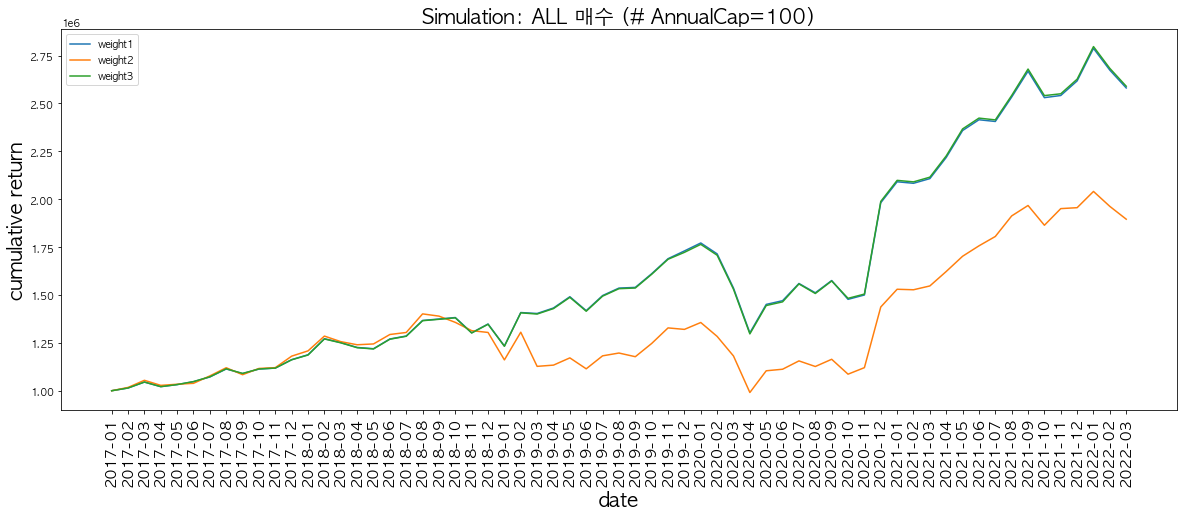

In [38]:
# Simulation: ALL 매수
plt.figure(figsize=(20,7))
plt.plot(ym_list, seed_list1, label='weight1')
plt.plot(ym_list, seed_list2, label='weight2')
plt.plot(ym_list, seed_list3, label='weight3')

plt.xticks(rotation=90, fontsize=15)
plt.xlabel('date', fontdict = {'fontsize' : 20})
plt.ylabel('cumulative return', fontdict = {'fontsize' : 20})
plt.title('Simulation: ALL 매수 (# AnnualCap=100)', fontdict = {'fontsize' : 20})
plt.legend()

## 1-2. AnnualCap=500

In [64]:
seed_list1_500, seed_list2_500, seed_list3_500 = Long(df_top10_500)

initial seed: 1000000 


 ###### Trading Month 2017-01 ###### 

weight1로 top10 all 매도 ===> seed: 1000000
weight2로 top10 all 매도 ===> seed: 1000000
weight3로 top10 all 매도 ===> seed: 1000000


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:28: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
0,2017-01,14295,TWTR,0.080982,0.1,0.037323,0.116371
1,2017-01,90178,ALNY,0.068109,0.1,0.040799,0.098388
2,2017-01,13456,TSRO,0.210886,0.1,0.091386,0.098273
3,2017-01,15398,CC,0.196016,0.1,0.085532,0.098260
4,2017-01,86580,NVDA,0.022859,0.1,0.193937,0.098256
5,2017-01,91983,CLR,-0.057819,0.1,0.272690,0.098217
6,2017-01,61241,AMD,-0.085538,0.1,0.118325,0.098109
7,2017-01,81774,FCX,0.262320,0.1,0.055305,0.098081
8,2017-01,25232,OKE,-0.029350,0.1,0.066491,0.098044
9,2017-01,91063,VIAB,0.200570,0.1,0.038212,0.098001



return 1 of 2017-02: 86903.52
return 2 of 2017-02: 40604.62
return 3 of 2017-02: 86792.26

 ###### Trading Month 2017-02 ###### 

weight1로 top10 all 매도 ===> seed: 1086903.52
weight2로 top10 all 매도 ===> seed: 1040604.62
weight3로 top10 all 매도 ===> seed: 1086792.26


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:28: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
10,2017-02,14295,TWTR,-0.104994,0.1,0.011396,0.116747
11,2017-02,90178,ALNY,0.291323,0.1,0.012457,0.102290
12,2017-02,81774,FCX,-0.195195,0.1,0.016887,0.098285
13,2017-02,89533,WYNN,-0.047126,0.1,0.289390,0.097874
14,2017-02,91063,VIAB,0.031087,0.1,0.011668,0.097688
15,2017-02,12476,TRGP,-0.019438,0.1,0.022537,0.097467
16,2017-02,76082,COG,0.019553,0.1,0.262787,0.097452
17,2017-02,77281,WFM,0.014891,0.1,0.153136,0.097421
18,2017-02,15069,MRO,-0.041791,0.1,0.021848,0.097410
19,2017-02,14040,S,-0.045504,0.1,0.197894,0.097365



return 1 of 2017-03: -10564.1
return 2 of 2017-03: -17769.51
return 3 of 2017-03: -11148.74

 ###### Trading Month 2017-03 ###### 

weight1로 top10 all 매도 ===> seed: 1076339.42
weight2로 top10 all 매도 ===> seed: 1022835.11
weight3로 top10 all 매도 ===> seed: 1075643.52


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:28: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
20,2017-03,14295,TWTR,-0.051998,0.1,0.023146,0.114960
21,2017-03,61241,AMD,0.006224,0.1,0.073380,0.098594
22,2017-03,15398,CC,0.143791,0.1,0.053043,0.098574
23,2017-03,13456,TSRO,-0.183150,0.1,0.056674,0.098525
24,2017-03,86580,NVDA,0.073413,0.1,0.120271,0.098441
25,2017-03,14040,S,-0.014756,0.1,0.401933,0.098202
26,2017-03,87137,DVN,-0.036439,0.1,0.050389,0.098199
27,2017-03,25232,OKE,0.025717,0.1,0.041235,0.098195
28,2017-03,85663,URI,-0.023276,0.1,0.028891,0.098177
29,2017-03,14714,ANET,0.111606,0.1,0.151039,0.098131



return 1 of 2017-04: 5503.63
return 2 of 2017-04: 15146.03
return 3 of 2017-04: 4471.36

 ###### Trading Month 2017-04 ###### 

weight1로 top10 all 매도 ===> seed: 1081843.05
weight2로 top10 all 매도 ===> seed: 1037981.14
weight3로 top10 all 매도 ===> seed: 1080114.88


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:28: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
30,2017-04,14295,TWTR,0.102341,0.1,0.022290,0.103977
31,2017-04,61241,AMD,-0.085911,0.1,0.070666,0.099847
32,2017-04,15398,CC,0.046494,0.1,0.051082,0.099828
33,2017-04,13456,TSRO,-0.040814,0.1,0.054578,0.099748
34,2017-04,86580,NVDA,-0.042504,0.1,0.115823,0.099615
35,2017-04,14040,S,0.040323,0.1,0.387069,0.099468
36,2017-04,76744,VRTX,0.081847,0.1,0.023134,0.099381
37,2017-04,14714,ANET,0.055719,0.1,0.145454,0.099381
38,2017-04,92890,MJN,-0.004041,0.1,0.023524,0.099378
39,2017-04,88446,ILMN,0.083333,0.1,0.106381,0.099377



return 1 of 2017-05: 25616.66
return 2 of 2017-05: 26790.67
return 3 of 2017-05: 25881.24

 ###### Trading Month 2017-05 ###### 

weight1로 top10 all 매도 ===> seed: 1107459.71
weight2로 top10 all 매도 ===> seed: 1064771.81
weight3로 top10 all 매도 ===> seed: 1105996.12


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:28: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
40,2017-05,61241,AMD,-0.158647,0.1,0.074842,0.100300
41,2017-05,15398,CC,-0.006701,0.1,0.054101,0.100256
42,2017-05,13456,TSRO,0.011654,0.1,0.057803,0.100224
43,2017-05,86580,NVDA,0.385331,0.1,0.122668,0.100061
44,2017-05,14040,S,-0.059801,0.1,0.409945,0.099915
45,2017-05,53613,MU,0.112035,0.1,0.029419,0.099900
46,2017-05,75654,CGNX,0.073295,0.1,0.027686,0.099867
47,2017-05,76744,VRTX,0.044801,0.1,0.024501,0.099827
48,2017-05,14714,ANET,0.055428,0.1,0.154050,0.099826
49,2017-05,46877,BCR,-0.000163,0.1,0.044985,0.099824



return 1 of 2017-06: 50636.69
return 2 of 2017-06: 27838.14
return 3 of 2017-06: 50507.24

 ###### Trading Month 2017-06 ###### 

weight1로 top10 all 매도 ===> seed: 1158096.4
weight2로 top10 all 매도 ===> seed: 1092609.95
weight3로 top10 all 매도 ===> seed: 1156503.36


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:28: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
50,2017-06,13456,TSRO,-0.063291,0.1,0.058563,0.100312
51,2017-06,15398,CC,-0.051763,0.1,0.054812,0.100216
52,2017-06,61241,AMD,0.115281,0.1,0.075826,0.100056
53,2017-06,86580,NVDA,0.001455,0.1,0.124280,0.099994
54,2017-06,14040,S,-0.032980,0.1,0.415331,0.099946
55,2017-06,76744,VRTX,0.042638,0.1,0.024823,0.099910
56,2017-06,46877,BCR,0.028234,0.1,0.045576,0.099906
57,2017-06,85914,BBY,-0.028961,0.1,0.127545,0.099902
58,2017-06,92221,MELI,-0.087529,0.1,0.025495,0.099892
59,2017-06,85631,ADSK,-0.097969,0.1,0.047751,0.099867



return 1 of 2017-07: -20253.36
return 2 of 2017-07: -21390.59
return 3 of 2017-07: -20229.86

 ###### Trading Month 2017-07 ###### 

weight1로 top10 all 매도 ===> seed: 1137843.04
weight2로 top10 all 매도 ===> seed: 1071219.36
weight3로 top10 all 매도 ===> seed: 1136273.5


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:28: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
60,2017-07,81774,FCX,0.217319,0.1,0.063511,0.104152
61,2017-07,15069,MRO,0.032067,0.1,0.082173,0.103871
62,2017-07,86580,NVDA,0.124170,0.1,0.222713,0.099342
63,2017-07,15398,CC,0.255538,0.1,0.098224,0.099208
64,2017-07,92221,MELI,0.149633,0.1,0.045688,0.098920
65,2017-07,46877,BCR,0.015026,0.1,0.081673,0.098911
66,2017-07,13511,PANW,-0.015171,0.1,0.045032,0.098909
67,2017-07,85914,BBY,0.017617,0.1,0.228564,0.098907
68,2017-07,90178,ALNY,0.037362,0.1,0.046852,0.098905
69,2017-07,85631,ADSK,0.098889,0.1,0.085570,0.098875



return 1 of 2017-08: 106098.37
return 2 of 2017-08: 97278.55
return 3 of 2017-08: 106417.44

 ###### Trading Month 2017-08 ###### 

weight1로 top10 all 매도 ===> seed: 1243941.41
weight2로 top10 all 매도 ===> seed: 1168497.91
weight3로 top10 all 매도 ===> seed: 1242690.94


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:28: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
70,2017-08,81774,FCX,0.010944,0.1,0.032624,0.103673
71,2017-08,15069,MRO,-0.086672,0.1,0.042210,0.103625
72,2017-08,86580,NVDA,0.043505,0.1,0.114403,0.099358
73,2017-08,15398,CC,0.031296,0.1,0.050455,0.099297
74,2017-08,76744,VRTX,0.057436,0.1,0.022850,0.099019
75,2017-08,13511,PANW,0.006905,0.1,0.023132,0.099013
76,2017-08,85914,BBY,-0.069935,0.1,0.117408,0.099011
77,2017-08,90178,ALNY,0.036137,0.1,0.024067,0.099009
78,2017-08,92221,MELI,-0.103842,0.1,0.023469,0.099001
79,2017-08,92709,SNI,-0.016703,0.1,0.549382,0.098994



return 1 of 2017-09: -11310.85
return 2 of 2017-09: -16624.97
return 3 of 2017-09: -11589.26

 ###### Trading Month 2017-09 ###### 

weight1로 top10 all 매도 ===> seed: 1232630.56
weight2로 top10 all 매도 ===> seed: 1151872.94
weight3로 top10 all 매도 ===> seed: 1231101.68


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:28: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
80,2017-09,15069,MRO,0.219425,0.1,0.036691,0.112697
81,2017-09,14295,TWTR,-0.002365,0.1,0.019138,0.102938
82,2017-09,15398,CC,0.031384,0.1,0.043858,0.098235
83,2017-09,86580,NVDA,0.055064,0.1,0.099444,0.098129
84,2017-09,14714,ANET,0.076412,0.1,0.124885,0.098013
85,2017-09,13511,PANW,0.085990,0.1,0.020107,0.098009
86,2017-09,76744,VRTX,-0.052946,0.1,0.019862,0.097997
87,2017-09,91594,SPR,0.044564,0.1,0.067128,0.097995
88,2017-09,88446,ILMN,-0.025726,0.1,0.091338,0.097995
89,2017-09,92709,SNI,0.002802,0.1,0.477548,0.097993



return 1 of 2017-10: 53570.36
return 2 of 2017-10: 31167.15
return 3 of 2017-10: 56409.69

 ###### Trading Month 2017-10 ###### 

weight1로 top10 all 매도 ===> seed: 1286200.92
weight2로 top10 all 매도 ===> seed: 1183040.09
weight3로 top10 all 매도 ===> seed: 1287511.37


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:28: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
90,2017-10,15069,MRO,0.048673,0.1,0.045579,0.110860
91,2017-10,14295,TWTR,0.222288,0.1,0.023774,0.102780
92,2017-10,15398,CC,0.118554,0.1,0.054482,0.098447
93,2017-10,86580,NVDA,0.156850,0.1,0.123534,0.098365
94,2017-10,15456,FL,-0.137138,0.1,0.349980,0.098343
95,2017-10,76744,VRTX,-0.038214,0.1,0.024674,0.098251
96,2017-10,14714,ANET,0.054217,0.1,0.155137,0.098249
97,2017-10,90178,ALNY,0.037024,0.1,0.025988,0.098242
98,2017-10,91594,SPR,0.030623,0.1,0.083389,0.098231
99,2017-10,88446,ILMN,0.030070,0.1,0.113464,0.098230



return 1 of 2017-11: 67261.38
return 2 of 2017-11: -309.17
return 3 of 2017-11: 68273.18

 ###### Trading Month 2017-11 ###### 

weight1로 top10 all 매도 ===> seed: 1353462.3
weight2로 top10 all 매도 ===> seed: 1182730.92
weight3로 top10 all 매도 ===> seed: 1355784.55


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:28: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
100,2017-11,90178,ALNY,0.104235,0.1,0.032171,0.100459
101,2017-11,15398,CC,-0.091503,0.1,0.067445,0.100142
102,2017-11,86580,NVDA,-0.028770,0.1,0.152925,0.100027
103,2017-11,14714,ANET,0.166241,0.1,0.192047,0.099981
104,2017-11,39538,MAT,0.292493,0.1,0.033687,0.099980
105,2017-11,88860,ALGN,0.091640,0.1,0.203117,0.099956
106,2017-11,91594,SPR,0.051810,0.1,0.103229,0.099903
107,2017-11,88446,ILMN,0.121059,0.1,0.140459,0.099902
108,2017-11,14295,TWTR,-0.001940,0.1,0.029430,0.099857
109,2017-11,84761,TTWO,0.008134,0.1,0.045491,0.099792



return 1 of 2017-12: 96555.72
return 2 of 2017-12: 89698.45
return 3 of 2017-12: 96725.38

 ###### Trading Month 2017-12 ###### 

weight1로 top10 all 매도 ===> seed: 1450018.02
weight2로 top10 all 매도 ===> seed: 1272429.37
weight3로 top10 all 매도 ===> seed: 1452509.93


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:28: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
110,2017-12,77462,M,0.074265,0.1,0.203352,0.103508
111,2017-12,91063,VIAB,0.094986,0.1,0.019341,0.102898
112,2017-12,90178,ALNY,-0.055671,0.1,0.020650,0.099536
113,2017-12,88860,ALGN,-0.148306,0.1,0.130376,0.099457
114,2017-12,14295,TWTR,0.166667,0.1,0.018891,0.099182
115,2017-12,12476,TRGP,0.115668,0.1,0.037359,0.099176
116,2017-12,82598,NTAP,-0.021058,0.1,0.035272,0.099090
117,2017-12,12558,KMI,0.048752,0.1,0.395102,0.099078
118,2017-12,13379,SPLK,0.034336,0.1,0.115378,0.099076
119,2017-12,90386,MOS,0.057431,0.1,0.024279,0.098999



return 1 of 2018-01: 53225.8
return 2 of 2018-01: 35372.27
return 3 of 2018-01: 53746.82

 ###### Trading Month 2018-01 ###### 

weight1로 top10 all 매도 ===> seed: 1503243.82
weight2로 top10 all 매도 ===> seed: 1307801.64
weight3로 top10 all 매도 ===> seed: 1506256.75


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:28: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
120,2018-01,88860,ALGN,0.179171,0.1,0.180892,0.100123
121,2018-01,13947,BLUE,0.150477,0.1,0.033273,0.100105
122,2018-01,90178,ALNY,0.023062,0.1,0.036104,0.100033
123,2018-01,80539,NKTR,0.400033,0.1,0.036142,0.100014
124,2018-01,15826,SQ,0.353043,0.1,0.062385,0.099993
125,2018-01,89217,AAP,0.173538,0.1,0.049926,0.099983
126,2018-01,12558,KMI,0.001937,0.1,0.398019,0.099944
127,2018-01,91063,VIAB,0.084713,0.1,0.029546,0.099942
128,2018-01,14714,ANET,0.170812,0.1,0.143256,0.099937
129,2018-01,15398,CC,0.031163,0.1,0.030458,0.099927



return 1 of 2018-02: 235700.96
return 2 of 2018-02: 146590.7
return 3 of 2018-02: 236204.3

 ###### Trading Month 2018-02 ###### 

weight1로 top10 all 매도 ===> seed: 1738944.78
weight2로 top10 all 매도 ===> seed: 1454392.34
weight3로 top10 all 매도 ===> seed: 1742461.05


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:28: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
130,2018-02,80539,NKTR,0.035283,0.1,0.048164,0.100112
131,2018-02,14714,ANET,-0.022043,0.1,0.190909,0.100060
132,2018-02,90178,ALNY,-0.075550,0.1,0.048113,0.100059
133,2018-02,89217,AAP,-0.023421,0.1,0.066533,0.100040
134,2018-02,88860,ALGN,0.001985,0.1,0.241064,0.099959
135,2018-02,92618,DPS,-0.025974,0.1,0.062036,0.099955
136,2018-02,52695,GWW,-0.025328,0.1,0.056875,0.099955
137,2018-02,13379,SPLK,0.008986,0.1,0.201543,0.099954
138,2018-02,82598,NTAP,-0.015447,0.1,0.046536,0.099954
139,2018-02,16544,BIVV,0.015719,0.1,0.038227,0.099953



return 1 of 2018-03: -21874.46
return 2 of 2018-03: -12482.4
return 3 of 2018-03: -21920.37

 ###### Trading Month 2018-03 ###### 

weight1로 top10 all 매도 ===> seed: 1717070.32
weight2로 top10 all 매도 ===> seed: 1441909.94
weight3로 top10 all 매도 ===> seed: 1720540.68


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:28: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
140,2018-03,80539,NKTR,0.227588,0.1,0.033942,0.100061
141,2018-03,88860,ALGN,-0.043387,0.1,0.169883,0.100035
142,2018-03,91068,CMG,0.014761,0.1,0.030770,0.100017
143,2018-03,13947,BLUE,-0.150498,0.1,0.031248,0.099999
144,2018-03,90178,ALNY,-0.008822,0.1,0.033906,0.099993
145,2018-03,77462,M,0.024056,0.1,0.206253,0.099989
146,2018-03,12558,KMI,-0.070370,0.1,0.373796,0.099983
147,2018-03,90386,MOS,-0.077508,0.1,0.036403,0.099975
148,2018-03,92618,DPS,0.023312,0.1,0.043718,0.099974
149,2018-03,52695,GWW,0.079220,0.1,0.040081,0.099974



return 1 of 2018-04: 3151.3
return 2 of 2018-04: -34841.12
return 3 of 2018-04: 3180.14

 ###### Trading Month 2018-04 ###### 

weight1로 top10 all 매도 ===> seed: 1720221.62
weight2로 top10 all 매도 ===> seed: 1407068.82
weight3로 top10 all 매도 ===> seed: 1723720.82


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:28: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
150,2018-04,80539,NKTR,-0.212686,0.1,0.013051,0.100179
151,2018-04,14567,GRUB,-0.003252,0.1,0.012543,0.100161
152,2018-04,85035,QRVO,-0.043293,0.1,0.858550,0.099992
153,2018-04,92618,DPS,0.013347,0.1,0.016810,0.099991
154,2018-04,52695,GWW,-0.003259,0.1,0.015412,0.099991
155,2018-04,13721,ABBV,0.030217,0.1,0.023903,0.099950
156,2018-04,85631,ADSK,0.002548,0.1,0.016356,0.099944
157,2018-04,81736,RMD,-0.038895,0.1,0.009015,0.099935
158,2018-04,91068,CMG,0.310173,0.1,0.011832,0.099930
159,2018-04,15826,SQ,-0.037805,0.1,0.022528,0.099927



return 1 of 2018-05: 2940.6
return 2 of 2018-05: -51470.96
return 3 of 2018-05: 2849.49

 ###### Trading Month 2018-05 ###### 

weight1로 top10 all 매도 ===> seed: 1723162.22
weight2로 top10 all 매도 ===> seed: 1355597.86
weight3로 top10 all 매도 ===> seed: 1726570.31


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:28: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
160,2018-05,14040,S,-0.083779,0.1,0.116762,0.100200
161,2018-05,60986,NWL,-0.138255,0.1,0.031800,0.100165
162,2018-05,80539,NKTR,-0.040521,0.1,0.011211,0.100074
163,2018-05,14567,GRUB,0.060016,0.1,0.010774,0.100003
164,2018-05,15826,SQ,0.230460,0.1,0.019352,0.099985
165,2018-05,81696,DISH,-0.119225,0.1,0.008290,0.099931
166,2018-05,80191,ALB,-0.035994,0.1,0.012774,0.099926
167,2018-05,85035,QRVO,0.190653,0.1,0.737482,0.099908
168,2018-05,11786,SIVB,0.041788,0.1,0.018147,0.099908
169,2018-05,86580,NVDA,0.122010,0.1,0.033408,0.099901



return 1 of 2018-06: 39141.92
return 2 of 2018-06: 182277.24
return 3 of 2018-06: 39101.1

 ###### Trading Month 2018-06 ###### 

weight1로 top10 all 매도 ===> seed: 1762304.14
weight2로 top10 all 매도 ===> seed: 1537875.1
weight3로 top10 all 매도 ===> seed: 1765671.41


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:28: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
170,2018-06,81696,DISH,0.137394,0.1,0.034083,0.100424
171,2018-06,60986,NWL,0.093724,0.1,0.130735,0.100282
172,2018-06,80539,NKTR,-0.391678,0.1,0.046090,0.100061
173,2018-06,79906,INCY,-0.018603,0.1,0.039532,0.100035
174,2018-06,15408,KHC,0.092902,0.1,0.030370,0.099933
175,2018-06,91068,CMG,0.002766,0.1,0.041782,0.099866
176,2018-06,12558,KMI,0.059353,0.1,0.507576,0.099860
177,2018-06,14567,GRUB,-0.021453,0.1,0.044295,0.099859
178,2018-06,11786,SIVB,-0.074873,0.1,0.074603,0.099840
179,2018-06,75100,TIF,0.010476,0.1,0.050934,0.099840



return 1 of 2018-07: -19383.98
return 2 of 2018-07: 38767.29
return 3 of 2018-07: -19317.42

 ###### Trading Month 2018-07 ###### 

weight1로 top10 all 매도 ===> seed: 1742920.16
weight2로 top10 all 매도 ===> seed: 1576642.39
weight3로 top10 all 매도 ===> seed: 1746353.99


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:28: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
180,2018-07,79906,INCY,-0.006866,0.1,0.052565,0.100155
181,2018-07,81696,DISH,-0.060994,0.1,0.045320,0.100120
182,2018-07,80539,NKTR,0.077207,0.1,0.061286,0.100025
183,2018-07,14567,GRUB,0.161853,0.1,0.058899,0.100024
184,2018-07,15826,SQ,0.048832,0.1,0.105787,0.100018
185,2018-07,60986,NWL,0.015510,0.1,0.173838,0.099969
186,2018-07,75107,ABMD,-0.133284,0.1,0.071605,0.099945
187,2018-07,16753,ATUS,0.004103,0.1,0.062114,0.099922
188,2018-07,13983,COTY,-0.048936,0.1,0.061845,0.099913
189,2018-07,88860,ALGN,0.042409,0.1,0.306740,0.099909



return 1 of 2018-08: 17400.26
return 2 of 2018-08: 31051.76
return 3 of 2018-08: 17443.46

 ###### Trading Month 2018-08 ###### 

weight1로 top10 all 매도 ===> seed: 1760320.42
weight2로 top10 all 매도 ===> seed: 1607694.15
weight3로 top10 all 매도 ===> seed: 1763797.45


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:28: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
190,2018-08,60986,NWL,-0.161894,0.1,0.226593,0.100200
191,2018-08,81696,DISH,0.120089,0.1,0.059073,0.100195
192,2018-08,79906,INCY,0.110760,0.1,0.068517,0.100166
193,2018-08,75107,ABMD,0.146814,0.1,0.093334,0.099992
194,2018-08,16753,ATUS,0.046118,0.1,0.080964,0.099992
195,2018-08,14295,TWTR,0.103859,0.1,0.063513,0.099938
196,2018-08,14567,GRUB,0.182296,0.1,0.076773,0.099933
197,2018-08,15826,SQ,0.371075,0.1,0.137890,0.099865
198,2018-08,75100,TIF,-0.108389,0.1,0.088281,0.099863
199,2018-08,86136,SRE,0.004239,0.1,0.105062,0.099856



return 1 of 2018-09: 143460.37
return 2 of 2018-09: 93361.46
return 3 of 2018-09: 143661.13

 ###### Trading Month 2018-09 ###### 

weight1로 top10 all 매도 ===> seed: 1903780.79
weight2로 top10 all 매도 ===> seed: 1701055.61
weight3로 top10 all 매도 ===> seed: 1907458.58


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:28: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
200,2018-09,81696,DISH,0.011598,0.1,0.050263,0.100178
201,2018-09,60986,NWL,-0.065378,0.1,0.192799,0.100139
202,2018-09,15826,SQ,0.116990,0.1,0.117325,0.099986
203,2018-09,14567,GRUB,-0.038096,0.1,0.065323,0.099985
204,2018-09,90664,DXCM,-0.009281,0.1,0.081739,0.099980
205,2018-09,75654,CGNX,0.037546,0.1,0.060717,0.099957
206,2018-09,76841,BIIB,-0.000509,0.1,0.044526,0.099948
207,2018-09,76795,ZBRA,0.029638,0.1,0.242811,0.099943
208,2018-09,25778,CA,0.007991,0.1,0.055105,0.099942
209,2018-09,86136,SRE,-0.012362,0.1,0.089393,0.099941



return 1 of 2018-10: 14875.69
return 2 of 2018-10: 12325.15
return 3 of 2018-10: 14883.49

 ###### Trading Month 2018-10 ###### 

weight1로 top10 all 매도 ===> seed: 1918656.48
weight2로 top10 all 매도 ===> seed: 1713380.76
weight3로 top10 all 매도 ===> seed: 1922342.07


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:28: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
210,2018-10,60986,NWL,-0.217734,0.1,0.177910,0.100173
211,2018-10,14567,GRUB,-0.330977,0.1,0.060279,0.100129
212,2018-10,90664,DXCM,-0.071798,0.1,0.075427,0.100086
213,2018-10,92203,LULU,-0.133916,0.1,0.134792,0.099997
214,2018-10,80539,NKTR,-0.365486,0.1,0.062722,0.099978
215,2018-10,93132,FTNT,-0.109353,0.1,0.059430,0.099950
216,2018-10,75654,CGNX,-0.232533,0.1,0.056028,0.099929
217,2018-10,15826,SQ,-0.258156,0.1,0.108265,0.099923
218,2018-10,76841,BIIB,-0.138802,0.1,0.041088,0.099920
219,2018-10,76795,ZBRA,-0.059549,0.1,0.224060,0.099915



return 1 of 2018-11: -368056.36
return 2 of 2018-11: -294016.18
return 3 of 2018-11: -368801.77

 ###### Trading Month 2018-11 ###### 

weight1로 top10 all 매도 ===> seed: 1550600.12
weight2로 top10 all 매도 ===> seed: 1419364.58
weight3로 top10 all 매도 ===> seed: 1553540.3


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:28: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
220,2018-11,60986,NWL,0.488035,0.1,0.128796,0.100153
221,2018-11,90664,DXCM,-0.023951,0.1,0.054604,0.100115
222,2018-11,16595,SNAP,-0.015129,0.1,0.032005,0.100055
223,2018-11,92203,LULU,-0.058125,0.1,0.097581,0.100016
224,2018-11,93132,FTNT,-0.101485,0.1,0.043023,0.099956
225,2018-11,61241,AMD,0.169687,0.1,0.044431,0.099954
226,2018-11,87299,AKAM,-0.048443,0.1,0.302614,0.099939
227,2018-11,15202,VMC,0.047953,0.1,0.060914,0.099939
228,2018-11,87184,RHT,0.040317,0.1,0.073828,0.099939
229,2018-11,76795,ZBRA,0.081179,0.1,0.162205,0.099933



return 1 of 2018-12: 89940.75
return 2 of 2018-12: 89379.65
return 3 of 2018-12: 90202.95

 ###### Trading Month 2018-12 ###### 

weight1로 top10 all 매도 ===> seed: 1640540.87
weight2로 top10 all 매도 ===> seed: 1508744.23
weight3로 top10 all 매도 ===> seed: 1643743.25


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:28: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
230,2018-12,60986,NWL,-0.205556,0.1,0.050792,0.100172
231,2018-12,11600,XRAY,-0.012771,0.1,0.094364,0.100118
232,2018-12,66384,WDC,-0.174488,0.1,0.325641,0.100109
233,2018-12,87184,RHT,-0.016353,0.1,0.029115,0.099959
234,2018-12,85753,VRSN,-0.049789,0.1,0.019244,0.099955
235,2018-12,87299,AKAM,-0.111564,0.1,0.119339,0.099946
236,2018-12,85593,AMG,-0.123110,0.1,0.018884,0.099938
237,2018-12,15720,EIX,0.037283,0.1,0.036385,0.099938
238,2018-12,11403,CDNS,-0.034636,0.1,0.288037,0.099937
239,2018-12,93436,TSLA,-0.050445,0.1,0.018200,0.099929



return 1 of 2019-01: -121634.28
return 2 of 2019-01: -143446.87
return 3 of 2019-01: -121930.5

 ###### Trading Month 2019-01 ###### 

weight1로 top10 all 매도 ===> seed: 1518906.59
weight2로 top10 all 매도 ===> seed: 1365297.36
weight3로 top10 all 매도 ===> seed: 1521812.75


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:28: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
240,2019-01,16932,ROKU,0.467037,0.1,0.008093,0.108189
241,2019-01,13983,COTY,0.182927,0.1,0.014724,0.099714
242,2019-01,16140,TWLO,0.246585,0.1,0.023928,0.099552
243,2019-01,16309,TTD,0.229364,0.1,0.012516,0.099360
244,2019-01,16649,OKTA,0.292006,0.1,0.018556,0.099154
245,2019-01,85002,SRPT,0.280216,0.1,0.821680,0.098933
246,2019-01,90664,DXCM,0.177212,0.1,0.014613,0.098835
247,2019-01,85753,VRSN,0.141480,0.1,0.009252,0.098756
248,2019-01,87299,AKAM,0.065815,0.1,0.065464,0.098753
249,2019-01,93436,TSLA,-0.077464,0.1,0.011174,0.098752



return 1 of 2019-02: 304567.75
return 2 of 2019-02: 352590.85
return 3 of 2019-02: 309109.57

 ###### Trading Month 2019-02 ###### 

weight1로 top10 all 매도 ===> seed: 1823474.34
weight2로 top10 all 매도 ===> seed: 1717888.21
weight3로 top10 all 매도 ===> seed: 1830922.32


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:28: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
250,2019-02,13983,COTY,0.433634,0.1,0.101453,0.111599
251,2019-02,16140,TWLO,0.093155,0.1,0.164869,0.099408
252,2019-02,16309,TTD,0.384497,0.1,0.086237,0.098814
253,2019-02,85753,VRSN,0.051811,0.1,0.063747,0.098616
254,2019-02,76201,XLNX,0.122566,0.1,0.057555,0.098605
255,2019-02,15720,EIX,0.051255,0.1,0.131589,0.098600
256,2019-02,76661,IONS,0.223965,0.1,0.122998,0.098592
257,2019-02,17750,KMB,0.048932,0.1,0.074920,0.098592
258,2019-02,16431,LW,-0.041356,0.1,0.105080,0.098588
259,2019-02,80286,TSCO,0.120140,0.1,0.091552,0.098586



return 1 of 2019-03: 271442.22
return 2 of 2019-03: 253350.97
return 3 of 2019-03: 279341.01

 ###### Trading Month 2019-03 ###### 

weight1로 top10 all 매도 ===> seed: 2094916.56
weight2로 top10 all 매도 ===> seed: 1971239.18
weight3로 top10 all 매도 ===> seed: 2110263.33


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:28: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
260,2019-03,16140,TWLO,0.061550,0.1,0.023490,0.101480
261,2019-03,90664,DXCM,-0.145195,0.1,0.014346,0.100772
262,2019-03,16309,TTD,0.002076,0.1,0.012287,0.100683
263,2019-03,85002,SRPT,-0.173669,0.1,0.806660,0.099816
264,2019-03,16649,OKTA,-0.025330,0.1,0.018217,0.099772
265,2019-03,25320,CPB,0.058579,0.1,0.025729,0.099722
266,2019-03,90454,MKTX,0.009021,0.1,0.008784,0.099468
267,2019-03,21371,CAH,-0.105147,0.1,0.024360,0.099438
268,2019-03,17005,CVS,-0.067439,0.1,0.007379,0.099434
269,2019-03,11600,XRAY,0.189595,0.1,0.058748,0.099415



return 1 of 2019-04: -41051.94
return 2 of 2019-04: -259216.26
return 3 of 2019-04: -41387.56

 ###### Trading Month 2019-04 ###### 

weight1로 top10 all 매도 ===> seed: 2053864.62
weight2로 top10 all 매도 ===> seed: 1712022.92
weight3로 top10 all 매도 ===> seed: 2068875.77


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:28: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
270,2019-04,13688,PCG,0.265169,0.1,0.030931,0.105087
271,2019-04,16140,TWLO,0.061620,0.1,0.052706,0.100251
272,2019-04,83534,NBIX,-0.180023,0.1,0.592140,0.099897
273,2019-04,16309,TTD,0.118868,0.1,0.027569,0.099768
274,2019-04,84761,TTWO,0.026068,0.1,0.033962,0.099630
275,2019-04,17005,CVS,0.017615,0.1,0.016557,0.099278
276,2019-04,14983,W,0.092287,0.1,0.034171,0.099212
277,2019-04,88860,ALGN,0.141913,0.1,0.022269,0.099068
278,2019-04,25320,CPB,0.023866,0.1,0.057729,0.098927
279,2019-04,91983,CLR,0.027250,0.1,0.131964,0.098881



return 1 of 2019-05: 122129.45
return 2 of 2019-05: -135946.99
return 3 of 2019-05: 125239.76

 ###### Trading Month 2019-05 ###### 

weight1로 top10 all 매도 ===> seed: 2175994.07
weight2로 top10 all 매도 ===> seed: 1576075.93
weight3로 top10 all 매도 ===> seed: 2194115.53


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:28: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
280,2019-05,13688,PCG,-0.240675,0.1,0.059052,0.102146
281,2019-05,13983,COTY,0.140481,0.1,0.061919,0.100079
282,2019-05,15408,KHC,-0.156137,0.1,0.048585,0.100057
283,2019-05,70332,APC,-0.034042,0.1,0.124120,0.099743
284,2019-05,16932,ROKU,0.421607,0.1,0.034032,0.099685
285,2019-05,23819,HAL,-0.248500,0.1,0.117659,0.099679
286,2019-05,11600,XRAY,0.053589,0.1,0.251650,0.099671
287,2019-05,77178,QCOM,-0.224196,0.1,0.049458,0.099653
288,2019-05,92221,MELI,0.178419,0.1,0.085413,0.099644
289,2019-05,85914,BBY,-0.157775,0.1,0.168113,0.099642



return 1 of 2019-06: -58148.84
return 2 of 2019-06: -64780.95
return 3 of 2019-06: -59742.91

 ###### Trading Month 2019-06 ###### 

weight1로 top10 all 매도 ===> seed: 2117845.23
weight2로 top10 all 매도 ===> seed: 1511294.98
weight3로 top10 all 매도 ===> seed: 2134372.62


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:28: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
290,2019-06,13688,PCG,0.340351,0.1,0.042960,0.100332
291,2019-06,11600,XRAY,0.084973,0.1,0.183076,0.099992
292,2019-06,16932,ROKU,0.001991,0.1,0.024758,0.099973
293,2019-06,77178,QCOM,0.147710,0.1,0.035981,0.099970
294,2019-06,52978,HAS,0.110784,0.1,0.041571,0.099959
295,2019-06,92203,LULU,0.088290,0.1,0.071327,0.099959
296,2019-06,76639,TSS,0.039424,0.1,0.107430,0.099959
297,2019-06,70332,APC,0.006963,0.1,0.090297,0.099956
298,2019-06,14040,S,-0.043668,0.1,0.340462,0.099956
299,2019-06,92221,MELI,0.072302,0.1,0.062138,0.099944



return 1 of 2019-07: 179830.71
return 2 of 2019-07: 61864.07
return 3 of 2019-07: 181438.05

 ###### Trading Month 2019-07 ###### 

weight1로 top10 all 매도 ===> seed: 2297675.94
weight2로 top10 all 매도 ===> seed: 1573159.05
weight3로 top10 all 매도 ===> seed: 2315810.67


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:28: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
300,2019-07,13688,PCG,-0.208988,0.1,0.034564,0.108969
301,2019-07,15408,KHC,0.031250,0.1,0.028438,0.103289
302,2019-07,93436,TSLA,0.081223,0.1,0.027505,0.100067
303,2019-07,23819,HAL,0.011434,0.1,0.068869,0.098983
304,2019-07,66384,WDC,0.133333,0.1,0.526400,0.098499
305,2019-07,91983,CLR,-0.116892,0.1,0.147465,0.098494
306,2019-07,59010,GPS,0.098637,0.1,0.026995,0.098010
307,2019-07,90312,WLK,-0.027210,0.1,0.031976,0.097964
308,2019-07,87137,DVN,-0.053296,0.1,0.034441,0.097935
309,2019-07,86580,NVDA,0.027340,0.1,0.073346,0.097791



return 1 of 2019-08: -5323.77
return 2 of 2019-08: 81171.98
return 3 of 2019-08: -9749.57

 ###### Trading Month 2019-08 ###### 

weight1로 top10 all 매도 ===> seed: 2292352.17
weight2로 top10 all 매도 ===> seed: 1654331.03
weight3로 top10 all 매도 ===> seed: 2306061.1


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:28: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
310,2019-08,15408,KHC,-0.190253,0.1,0.065941,0.101929
311,2019-08,23819,HAL,-0.180870,0.1,0.159691,0.100428
312,2019-08,59010,GPS,-0.190256,0.1,0.062595,0.100122
313,2019-08,76841,BIIB,-0.075982,0.1,0.059207,0.099964
314,2019-08,13688,PCG,-0.423607,0.1,0.080147,0.099792
315,2019-08,77606,KSS,-0.122540,0.1,0.300175,0.099790
316,2019-08,34833,OXY,-0.153427,0.1,0.089815,0.099665
317,2019-08,93436,TSLA,-0.066222,0.1,0.063777,0.099474
318,2019-08,72726,STT,-0.116715,0.1,0.053971,0.099426
319,2019-08,75107,ABMD,-0.306900,0.1,0.064681,0.099410



return 1 of 2019-09: -418760.58
return 2 of 2019-09: -285742.65
return 3 of 2019-09: -421303.36

 ###### Trading Month 2019-09 ###### 

weight1로 top10 all 매도 ===> seed: 1873591.59
weight2로 top10 all 매도 ===> seed: 1368588.38
weight3로 top10 all 매도 ===> seed: 1884757.74


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:28: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
320,2019-09,13688,PCG,-0.043062,0.1,0.039310,0.113894
321,2019-09,13983,COTY,0.113613,0.1,0.041219,0.098708
322,2019-09,59248,TAP,0.119548,0.1,0.251519,0.098653
323,2019-09,81696,DISH,0.015197,0.1,0.031812,0.098426
324,2019-09,21371,CAH,0.105289,0.1,0.069463,0.098421
325,2019-09,81061,MCK,-0.011644,0.1,0.108759,0.098401
326,2019-09,75241,PXD,0.022606,0.1,0.151160,0.098390
327,2019-09,25320,CPB,0.042667,0.1,0.073367,0.098369
328,2019-09,17144,GIS,0.024535,0.1,0.207251,0.098369
329,2019-09,42585,SJM,0.046215,0.1,0.026140,0.098369



return 1 of 2019-10: 81494.28
return 2 of 2019-10: 71755.05
return 3 of 2019-10: 79531.55

 ###### Trading Month 2019-10 ###### 

weight1로 top10 all 매도 ===> seed: 1955085.87
weight2로 top10 all 매도 ===> seed: 1440343.43
weight3로 top10 all 매도 ===> seed: 1964289.29


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:28: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
330,2019-10,13688,PCG,-0.383000,0.1,0.104093,0.114557
331,2019-10,15408,KHC,0.157330,0.1,0.085643,0.101194
332,2019-10,90454,MKTX,0.125466,0.1,0.066328,0.098115
333,2019-10,16649,OKTA,0.107760,0.1,0.137550,0.098111
334,2019-10,16932,ROKU,0.446541,0.1,0.059989,0.098088
335,2019-10,14988,LBRDK,0.128021,0.1,0.055317,0.098051
336,2019-10,90178,ALNY,0.078587,0.1,0.073067,0.097996
337,2019-10,14579,PAYC,0.009738,0.1,0.081216,0.097966
338,2019-10,14182,BURL,-0.038284,0.1,0.061245,0.097962
339,2019-10,61241,AMD,0.170404,0.1,0.275552,0.097960



return 1 of 2019-11: 156907.65
return 2 of 2019-11: 117767.53
return 3 of 2019-11: 143154.18

 ###### Trading Month 2019-11 ###### 

weight1로 top10 all 매도 ===> seed: 2111993.52
weight2로 top10 all 매도 ===> seed: 1558110.96
weight3로 top10 all 매도 ===> seed: 2107443.47


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:28: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
340,2019-11,13688,PCG,0.209076,0.1,0.048174,0.114457
341,2019-11,15408,KHC,-0.044231,0.1,0.039635,0.105876
342,2019-11,81696,DISH,-0.003030,0.1,0.038986,0.098118
343,2019-11,59248,TAP,-0.031677,0.1,0.308234,0.097811
344,2019-11,13983,COTY,-0.002139,0.1,0.050513,0.097765
345,2019-11,88860,ALGN,0.099291,0.1,0.034684,0.097303
346,2019-11,75241,PXD,0.039181,0.1,0.185244,0.097233
347,2019-11,75034,BHGE,0.056075,0.1,0.238234,0.097185
348,2019-11,90454,MKTX,0.096964,0.1,0.030697,0.097145
349,2019-11,14988,LBRDK,0.012027,0.1,0.025601,0.097107



return 1 of 2019-12: 91140.1
return 2 of 2019-12: 40002.79
return 3 of 2019-12: 95152.22

 ###### Trading Month 2019-12 ###### 

weight1로 top10 all 매도 ===> seed: 2203133.62
weight2로 top10 all 매도 ===> seed: 1598113.75
weight3로 top10 all 매도 ===> seed: 2202595.69


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:28: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
350,2019-12,13688,PCG,0.457105,0.1,0.014046,0.112485
351,2019-12,40125,DXC,0.012590,0.1,0.018372,0.101736
352,2019-12,92239,CXO,0.206863,0.1,0.023584,0.099329
353,2019-12,14983,W,0.064178,0.1,0.015517,0.098572
354,2019-12,90386,MOS,0.138583,0.1,0.008060,0.098403
355,2019-12,85002,SRPT,0.147124,0.1,0.821868,0.098140
356,2019-12,75107,ABMD,-0.130441,0.1,0.011335,0.098136
357,2019-12,91983,CLR,0.110751,0.1,0.059923,0.097844
358,2019-12,34833,OXY,0.088929,0.1,0.015740,0.097682
359,2019-12,15408,KHC,0.053443,0.1,0.011556,0.097673



return 1 of 2020-01: 253167.58
return 2 of 2020-01: 226508.5
return 3 of 2020-01: 263408.33

 ###### Trading Month 2020-01 ###### 

weight1로 top10 all 매도 ===> seed: 2456301.2
weight2로 top10 all 매도 ===> seed: 1824622.25
weight3로 top10 all 매도 ===> seed: 2466004.02


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:28: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
360,2020-01,13688,PCG,0.399264,0.1,0.158761,0.149218
361,2020-01,18940,PTON,0.139437,0.1,0.078762,0.145368
362,2020-01,14983,W,0.036848,0.1,0.049494,0.090513
363,2020-01,15408,KHC,-0.091192,0.1,0.050601,0.088910
364,2020-01,23819,HAL,-0.108705,0.1,0.131847,0.088604
365,2020-01,92322,ULTA,0.058347,0.1,0.075792,0.087833
366,2020-01,82486,ERIE,0.008825,0.1,0.049288,0.087827
367,2020-01,92239,CXO,-0.134635,0.1,0.219296,0.087820
368,2020-01,75107,ABMD,0.092034,0.1,0.075067,0.087203
369,2020-01,88863,EXAS,0.008650,0.1,0.111092,0.086706



return 1 of 2020-02: 100431.74
return 2 of 2020-02: 73804.06
return 3 of 2020-02: 168414.88

 ###### Trading Month 2020-02 ###### 

weight1로 top10 all 매도 ===> seed: 2556732.94
weight2로 top10 all 매도 ===> seed: 1898426.31
weight3로 top10 all 매도 ===> seed: 2634418.9


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:28: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
370,2020-02,18940,PTON,-0.175216,0.1,0.051904,0.147421
371,2020-02,13688,PCG,0.019066,0.1,0.104622,0.144712
372,2020-02,75107,ABMD,-0.193408,0.1,0.049468,0.092210
373,2020-02,17341,ZS,-0.073097,0.1,0.113568,0.090366
374,2020-02,15408,KHC,-0.151712,0.1,0.033346,0.089471
375,2020-02,15291,ETSY,0.184388,0.1,0.053234,0.087998
376,2020-02,23819,HAL,-0.222375,0.1,0.086886,0.087526
377,2020-02,14983,W,-0.325400,0.1,0.032616,0.087015
378,2020-02,14040,S,1.102975,0.1,0.430967,0.086985
379,2020-02,34833,OXY,-0.175730,0.1,0.043388,0.086294



return 1 of 2020-03: -2686.95
return 2 of 2020-03: 792734.93
return 3 of 2020-03: -31242.71

 ###### Trading Month 2020-03 ###### 

weight1로 top10 all 매도 ===> seed: 2554045.99
weight2로 top10 all 매도 ===> seed: 2691161.24
weight3로 top10 all 매도 ===> seed: 2603176.19


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:28: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
380,2020-03,13688,PCG,-0.420000,0.1,0.102519,0.164858
381,2020-03,18940,PTON,-0.005245,0.1,0.050860,0.142819
382,2020-03,15408,KHC,0.014937,0.1,0.032675,0.103712
383,2020-03,14040,S,-0.049953,0.1,0.422303,0.089055
384,2020-03,23819,HAL,-0.585495,0.1,0.085140,0.084902
385,2020-03,14983,W,-0.154564,0.1,0.031960,0.083570
386,2020-03,75107,ABMD,-0.033941,0.1,0.048474,0.083510
387,2020-03,92239,CXO,-0.370038,0.1,0.141609,0.082609
388,2020-03,79906,INCY,-0.028909,0.1,0.041943,0.082569
389,2020-03,34833,OXY,-0.622175,0.1,0.042516,0.082395



return 1 of 2020-04: -576035.2
return 2 of 2020-04: -539393.81
return 3 of 2020-04: -579387.93

 ###### Trading Month 2020-04 ###### 

weight1로 top10 all 매도 ===> seed: 1978010.79
weight2로 top10 all 매도 ===> seed: 2151767.43
weight3로 top10 all 매도 ===> seed: 2023788.26


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:28: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
390,2020-04,13688,PCG,0.183537,0.1,0.114133,0.111047
391,2020-04,16655,CVNA,0.454166,0.1,0.073497,0.100028
392,2020-04,15408,KHC,0.225950,0.1,0.036377,0.099841
393,2020-04,14136,RNG,0.078429,0.1,0.089706,0.098511
394,2020-04,15585,TDOC,0.061802,0.1,0.413215,0.098499
395,2020-04,18484,ZM,-0.074938,0.1,0.034945,0.098455
396,2020-04,16382,COUP,0.260216,0.1,0.066868,0.098451
397,2020-04,13046,UI,0.144441,0.1,0.048489,0.098399
398,2020-04,16649,OKTA,0.237527,0.1,0.072946,0.098396
399,2020-04,90454,MKTX,0.368163,0.1,0.049824,0.098373



return 1 of 2020-05: 383594.41
return 2 of 2020-05: 328306.9
return 3 of 2020-05: 393071.89

 ###### Trading Month 2020-05 ###### 

weight1로 top10 all 매도 ===> seed: 2361605.2
weight2로 top10 all 매도 ===> seed: 2480074.33
weight3로 top10 all 매도 ===> seed: 2416860.15


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:28: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
400,2020-05,13688,PCG,0.114662,0.1,0.092215,0.107060
401,2020-05,75034,BKR,0.196416,0.1,0.209325,0.101877
402,2020-05,23819,HAL,0.119048,0.1,0.076582,0.101362
403,2020-05,34833,OXY,-0.219880,0.1,0.038243,0.101326
404,2020-05,76226,VIAC,0.201622,0.1,0.069246,0.101326
405,2020-05,15408,KHC,0.017804,0.1,0.029391,0.098175
406,2020-05,15585,TDOC,0.057537,0.1,0.333859,0.097755
407,2020-05,16382,COUP,0.292010,0.1,0.054026,0.097054
408,2020-05,14579,PAYC,0.138725,0.1,0.024635,0.097032
409,2020-05,14136,RNG,0.200061,0.1,0.072479,0.097032



return 1 of 2020-06: 264028.61
return 2 of 2020-06: 297073.54
return 3 of 2020-06: 268487.39

 ###### Trading Month 2020-06 ###### 

weight1로 top10 all 매도 ===> seed: 2625633.81
weight2로 top10 all 매도 ===> seed: 2777147.87
weight3로 top10 all 매도 ===> seed: 2685347.54


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:28: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
410,2020-06,15408,KHC,0.046603,0.1,0.004906,0.101137
411,2020-06,13447,NOW,0.044157,0.1,0.261478,0.100119
412,2020-06,14231,VEEV,0.071047,0.1,0.006248,0.100061
413,2020-06,81696,DISH,0.090363,0.1,0.005733,0.100017
414,2020-06,90178,ALNY,0.094921,0.1,0.003894,0.100005
415,2020-06,85002,SRPT,0.052998,0.1,0.614575,0.099943
416,2020-06,59248,TAP,-0.094837,0.1,0.039136,0.099936
417,2020-06,14988,LBRDK,-0.092666,0.1,0.005758,0.099676
418,2020-06,17855,AVLR,0.243135,0.1,0.044032,0.099597
419,2020-06,84788,AMZN,0.129567,0.1,0.014239,0.099509



return 1 of 2020-07: 153675.44
return 2 of 2020-07: 149919.07
return 3 of 2020-07: 156998.78

 ###### Trading Month 2020-07 ###### 

weight1로 top10 all 매도 ===> seed: 2779309.25
weight2로 top10 all 매도 ===> seed: 2927066.94
weight3로 top10 all 매도 ===> seed: 2842346.32


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:28: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
420,2020-07,15408,KHC,0.078081,0.1,0.012002,0.100917
421,2020-07,90664,DXCM,0.074346,0.1,0.022164,0.100239
422,2020-07,15585,TDOC,0.245179,0.1,0.136333,0.100032
423,2020-07,17685,DOCU,0.259102,0.1,0.087527,0.099897
424,2020-07,14136,RNG,0.018455,0.1,0.029597,0.099859
425,2020-07,13447,NOW,0.084284,0.1,0.639671,0.099857
426,2020-07,90454,MKTX,0.031502,0.1,0.016439,0.099836
427,2020-07,16649,OKTA,0.103631,0.1,0.024067,0.099806
428,2020-07,16968,MDB,0.012106,0.1,0.018113,0.099785
429,2020-07,14988,LBRDK,0.107373,0.1,0.014087,0.099770



return 1 of 2020-08: 281838.64
return 2 of 2020-08: 345081.99
return 3 of 2020-08: 288240.97

 ###### Trading Month 2020-08 ###### 

weight1로 top10 all 매도 ===> seed: 3061147.89
weight2로 top10 all 매도 ===> seed: 3272148.93
weight3로 top10 all 매도 ===> seed: 3130587.29


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:28: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
430,2020-08,15408,KHC,0.030832,0.1,0.030612,0.101238
431,2020-08,18312,MRNA,-0.124291,0.1,0.040130,0.100227
432,2020-08,18484,ZM,0.280375,0.1,0.029406,0.100220
433,2020-08,93436,TSLA,0.741452,0.1,0.031793,0.100168
434,2020-08,17685,DOCU,0.028455,0.1,0.223242,0.100095
435,2020-08,90664,DXCM,-0.023258,0.1,0.056530,0.099896
436,2020-08,15585,TDOC,-0.092328,0.1,0.347725,0.099889
437,2020-08,92239,CXO,-0.006852,0.1,0.132665,0.099522
438,2020-08,81696,DISH,0.106197,0.1,0.035774,0.099377
439,2020-08,76226,VIAC,0.068278,0.1,0.072122,0.099368



return 1 of 2020-09: 308826.72
return 2 of 2020-09: 27882.51
return 3 of 2020-09: 316162.61

 ###### Trading Month 2020-09 ###### 

weight1로 top10 all 매도 ===> seed: 3369974.61
weight2로 top10 all 매도 ===> seed: 3300031.44
weight3로 top10 all 매도 ===> seed: 3446749.9


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:28: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
440,2020-09,13688,PCG,0.014039,0.1,0.088514,0.108677
441,2020-09,18790,LVGO,0.020029,0.1,0.039184,0.099230
442,2020-09,18312,MRNA,0.090307,0.1,0.036983,0.099155
443,2020-09,18484,ZM,0.446047,0.1,0.027101,0.099113
444,2020-09,61241,AMD,-0.097225,0.1,0.114608,0.099033
445,2020-09,93436,TSLA,-0.139087,0.1,0.029300,0.099031
446,2020-09,17685,DOCU,-0.034798,0.1,0.205738,0.099012
447,2020-09,15585,TDOC,0.016459,0.1,0.320460,0.098949
448,2020-09,86580,NVDA,0.011963,0.1,0.086016,0.098900
449,2020-09,90664,DXCM,-0.030982,0.1,0.052097,0.098899



return 1 of 2020-10: 100004.41
return 2 of 2020-10: -767.64
return 3 of 2020-10: 101943.14

 ###### Trading Month 2020-10 ###### 

weight1로 top10 all 매도 ===> seed: 3469979.02
weight2로 top10 all 매도 ===> seed: 3299263.8
weight3로 top10 all 매도 ===> seed: 3548693.04


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:28: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
450,2020-10,34833,OXY,-0.087912,0.1,0.032318,0.128493
451,2020-10,13688,PCG,0.018104,0.1,0.077929,0.127396
452,2020-10,18312,MRNA,-0.046360,0.1,0.032561,0.093074
453,2020-10,61241,AMD,-0.081717,0.1,0.100903,0.093066
454,2020-10,93436,TSLA,-0.095499,0.1,0.025796,0.093033
455,2020-10,16655,CVNA,-0.169058,0.1,0.050183,0.093029
456,2020-10,18484,ZM,-0.019570,0.1,0.023860,0.093012
457,2020-10,17685,DOCU,-0.060351,0.1,0.181135,0.093009
458,2020-10,15546,Z,-0.127670,0.1,0.436654,0.092945
459,2020-10,18940,PTON,0.110540,0.1,0.038661,0.092943



return 1 of 2020-11: -194142.87
return 2 of 2020-11: -280455.3
return 3 of 2020-11: -193571.63

 ###### Trading Month 2020-11 ###### 

weight1로 top10 all 매도 ===> seed: 3275836.15
weight2로 top10 all 매도 ===> seed: 3018808.5
weight3로 top10 all 매도 ===> seed: 3355121.41


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:28: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
460,2020-11,34833,OXY,0.726177,0.1,0.047725,0.128473
461,2020-11,13688,PCG,0.328452,0.1,0.115080,0.125104
462,2020-11,92239,CXO,0.389545,0.1,0.158959,0.099029
463,2020-11,23819,HAL,0.375622,0.1,0.095571,0.098935
464,2020-11,18484,ZM,0.037860,0.1,0.035235,0.091416
465,2020-11,85269,VLO,0.418026,0.1,0.075968,0.091416
466,2020-11,17685,DOCU,0.126724,0.1,0.267487,0.091413
467,2020-11,23026,FE,-0.093203,0.1,0.091774,0.091411
468,2020-11,16655,CVNA,0.349933,0.1,0.074107,0.091407
469,2020-11,93436,TSLA,0.462736,0.1,0.038094,0.091394



return 1 of 2020-12: 1022673.96
return 2 of 2020-12: 821929.13
return 3 of 2020-12: 1104309.0

 ###### Trading Month 2020-12 ###### 

weight1로 top10 all 매도 ===> seed: 4298510.11
weight2로 top10 all 매도 ===> seed: 3840737.63
weight3로 top10 all 매도 ===> seed: 4459430.41


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:28: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
470,2020-12,34833,OXY,0.098985,0.1,0.062710,0.122576
471,2020-12,92239,CXO,0.015136,0.1,0.208869,0.122096
472,2020-12,13688,PCG,-0.018898,0.1,0.151213,0.120840
473,2020-12,75825,EOG,0.063780,0.1,0.042816,0.096458
474,2020-12,23819,HAL,0.141953,0.1,0.125578,0.095610
475,2020-12,85269,VLO,0.052074,0.1,0.099820,0.089093
476,2020-12,13356,PSX,0.154506,0.1,0.066883,0.088884
477,2020-12,13928,COP,0.010870,0.1,0.132632,0.088265
478,2020-12,18312,MRNA,-0.316027,0.1,0.063180,0.088122
479,2020-12,18484,ZM,-0.294841,0.1,0.046298,0.088056



return 1 of 2021-01: -39745.2
return 2 of 2021-01: 40038.24
return 3 of 2021-01: -13635.18

 ###### Trading Month 2021-01 ###### 

weight1로 top10 all 매도 ===> seed: 4258764.91
weight2로 top10 all 매도 ===> seed: 3880775.87
weight3로 top10 all 매도 ===> seed: 4445795.23


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:28: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
480,2021-01,34833,OXY,0.158868,0.1,0.078350,0.101029
481,2021-01,21020,AAL,0.088776,0.1,0.078193,0.100971
482,2021-01,13641,FANG,0.171281,0.1,0.141051,0.100233
483,2021-01,13688,PCG,-0.082665,0.1,0.038065,0.099837
484,2021-01,87137,DVN,0.041113,0.1,0.044111,0.099702
485,2021-01,82779,NVAX,0.981347,0.1,0.065682,0.099697
486,2021-01,16309,TTD,-0.043708,0.1,0.165854,0.099697
487,2021-01,18312,MRNA,0.657509,0.1,0.074716,0.099695
488,2021-01,23819,HAL,-0.067196,0.1,0.091819,0.099607
489,2021-01,18485,PINS,0.039605,0.1,0.222157,0.099531



return 1 of 2021-02: 828300.6
return 2 of 2021-02: 586690.3
return 3 of 2021-02: 863850.3

 ###### Trading Month 2021-02 ###### 

weight1로 top10 all 매도 ===> seed: 5087065.51
weight2로 top10 all 매도 ===> seed: 4467466.17
weight3로 top10 all 매도 ===> seed: 5309645.53


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:28: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
490,2021-02,34833,OXY,0.326521,0.1,0.029182,0.101416
491,2021-02,14328,AMC,-0.395928,0.1,0.053425,0.101389
492,2021-02,21020,AAL,0.219569,0.1,0.029123,0.101325
493,2021-02,13688,PCG,-0.080490,0.1,0.014178,0.100223
494,2021-02,86783,BKNG,0.197590,0.1,0.522713,0.099308
495,2021-02,12449,FLT,0.142369,0.1,0.035839,0.099297
496,2021-02,24643,HWM,0.143613,0.1,0.172210,0.099280
497,2021-02,91041,LYV,0.337246,0.1,0.074366,0.099279
498,2021-02,13641,FANG,0.222085,0.1,0.052535,0.099260
499,2021-02,87137,DVN,0.308627,0.1,0.016429,0.099222



return 1 of 2021-03: 722974.57
return 2 of 2021-03: 753052.12
return 3 of 2021-03: 750348.18

 ###### Trading Month 2021-03 ###### 

weight1로 top10 all 매도 ===> seed: 5810040.08
weight2로 top10 all 매도 ===> seed: 5220518.29
weight3로 top10 all 매도 ===> seed: 6059993.71


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:28: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
500,2021-03,14328,AMC,0.274657,0.1,0.082585,0.100493
501,2021-03,13688,PCG,0.114177,0.1,0.021916,0.100181
502,2021-03,89301,GME,0.865736,0.1,0.065970,0.100115
503,2021-03,87337,PLUG,-0.259198,0.1,0.030632,0.100059
504,2021-03,19084,BILL,-0.118235,0.1,0.050553,0.099870
505,2021-03,14970,HUBS,-0.118039,0.1,0.050067,0.099870
506,2021-03,82779,NVAX,-0.215889,0.1,0.037816,0.099870
507,2021-03,17341,ZS,-0.162708,0.1,0.062836,0.099870
508,2021-03,15546,Z,-0.196430,0.1,0.511212,0.099846
509,2021-03,83111,ALXN,0.001047,0.1,0.086412,0.099827



return 1 of 2021-04: 107554.75
return 2 of 2021-04: -293623.2
return 3 of 2021-04: 114305.4

 ###### Trading Month 2021-04 ###### 

weight1로 top10 all 매도 ===> seed: 5917594.83
weight2로 top10 all 매도 ===> seed: 4926895.09
weight3로 top10 all 매도 ===> seed: 6174299.11


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:28: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
510,2021-04,13688,PCG,-0.033305,0.1,0.023582,0.110135
511,2021-04,19084,BILL,0.062749,0.1,0.054395,0.099002
512,2021-04,14970,HUBS,0.159045,0.1,0.053873,0.099002
513,2021-04,82779,NVAX,0.306767,0.1,0.040691,0.099002
514,2021-04,15546,Z,0.003703,0.1,0.550072,0.098996
515,2021-04,87337,PLUG,-0.204520,0.1,0.032961,0.098955
516,2021-04,14328,AMC,-0.017630,0.1,0.088863,0.098764
517,2021-04,93436,TSLA,0.062147,0.1,0.034468,0.098719
518,2021-04,89301,GME,-0.085502,0.1,0.070985,0.098713
519,2021-04,14983,W,-0.060937,0.1,0.050110,0.098713



return 1 of 2021-05: 113924.15
return 2 of 2021-05: 51372.03
return 3 of 2021-05: 115626.53

 ###### Trading Month 2021-05 ###### 

weight1로 top10 all 매도 ===> seed: 6031518.98
weight2로 top10 all 매도 ===> seed: 4978267.12
weight3로 top10 all 매도 ===> seed: 6289925.64


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:28: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
520,2021-05,13688,PCG,-0.104240,0.1,0.022134,0.127057
521,2021-05,19084,BILL,-0.036927,0.1,0.051057,0.097017
522,2021-05,14970,HUBS,-0.041922,0.1,0.050566,0.097017
523,2021-05,82779,NVAX,-0.376947,0.1,0.038193,0.097017
524,2021-05,14328,AMC,1.604188,0.1,0.083408,0.097012
525,2021-05,82759,NUAN,-0.005078,0.1,0.024801,0.097011
526,2021-05,12650,KSU,0.018719,0.1,0.121313,0.096998
527,2021-05,93436,TSLA,-0.118713,0.1,0.032352,0.096967
528,2021-05,15546,Z,-0.098371,0.1,0.516309,0.096961
529,2021-05,19788,PLTR,-0.003906,0.1,0.059866,0.096944



return 1 of 2021-06: 504718.99
return 2 of 2021-06: 300558.66
return 3 of 2021-06: 490962.81

 ###### Trading Month 2021-06 ###### 

weight1로 top10 all 매도 ===> seed: 6536237.97
weight2로 top10 all 매도 ===> seed: 5278825.78
weight3로 top10 all 매도 ===> seed: 6780888.45


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:28: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
530,2021-06,13688,PCG,0.002959,0.1,0.022822,0.128374
531,2021-06,34833,OXY,0.204931,0.1,0.046974,0.100022
532,2021-06,19084,BILL,0.230056,0.1,0.052642,0.096501
533,2021-06,82759,NUAN,0.029111,0.1,0.025571,0.096495
534,2021-06,87337,PLUG,0.113681,0.1,0.031898,0.096450
535,2021-06,89301,GME,-0.035405,0.1,0.068696,0.096444
536,2021-06,20648,RBLX,-0.040418,0.1,0.383927,0.096441
537,2021-06,20196,UPST,-0.157334,0.1,0.086012,0.096441
538,2021-06,12650,KSU,-0.046258,0.1,0.125080,0.096422
539,2021-06,19751,CCIV,0.461460,0.1,0.156378,0.096410



return 1 of 2021-07: 498573.46
return 2 of 2021-07: 322372.77
return 3 of 2021-07: 504463.79

 ###### Trading Month 2021-07 ###### 

weight1로 top10 all 매도 ===> seed: 7034811.43
weight2로 top10 all 매도 ===> seed: 5601198.55
weight3로 top10 all 매도 ===> seed: 7285352.24


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:28: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
540,2021-07,13688,PCG,-0.135693,0.1,0.032085,0.127535
541,2021-07,34833,OXY,-0.165334,0.1,0.066041,0.100167
542,2021-07,16309,TTD,0.058816,0.1,0.139798,0.096589
543,2021-07,82759,NUAN,0.008450,0.1,0.035950,0.096565
544,2021-07,12650,KSU,-0.054946,0.1,0.175851,0.096552
545,2021-07,14328,AMC,-0.346860,0.1,0.120905,0.096520
546,2021-07,87337,PLUG,-0.202106,0.1,0.044846,0.096520
547,2021-07,19751,CCIV,-0.176960,0.1,0.219853,0.096519
548,2021-07,76841,BIIB,-0.056430,0.1,0.068090,0.096518
549,2021-07,89301,GME,-0.247595,0.1,0.096581,0.096514



return 1 of 2021-08: -927651.28
return 2 of 2021-08: -750953.54
return 3 of 2021-08: -962280.09

 ###### Trading Month 2021-08 ###### 

weight1로 top10 all 매도 ===> seed: 6107160.15
weight2로 top10 all 매도 ===> seed: 4850245.01
weight3로 top10 all 매도 ===> seed: 6323072.15


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:28: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
550,2021-08,13688,PCG,0.043231,0.1,0.036431,0.157079
551,2021-08,16595,SNAP,0.022709,0.1,0.054826,0.093714
552,2021-08,13687,RH,0.055099,0.1,0.041043,0.093660
553,2021-08,19084,BILL,0.326709,0.1,0.084034,0.093657
554,2021-08,17685,DOCU,-0.006040,0.1,0.272778,0.093657
555,2021-08,16968,MDB,0.091692,0.1,0.115912,0.093657
556,2021-08,16309,TTD,-0.022708,0.1,0.158734,0.093657
557,2021-08,20196,UPST,0.897317,0.1,0.137306,0.093657
558,2021-08,87337,PLUG,-0.044721,0.1,0.050920,0.093653
559,2021-08,20189,DASH,0.098170,0.1,0.048016,0.093609



return 1 of 2021-09: 892535.44
return 2 of 2021-09: 793284.99
return 3 of 2021-09: 882791.18

 ###### Trading Month 2021-09 ###### 

weight1로 top10 all 매도 ===> seed: 6999695.59
weight2로 top10 all 매도 ===> seed: 5643530.0
weight3로 top10 all 매도 ===> seed: 7205863.33


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:28: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
560,2021-09,13688,PCG,0.046892,0.1,0.035641,0.157364
561,2021-09,18312,MRNA,0.021689,0.1,0.069956,0.093942
562,2021-09,19084,BILL,-0.027115,0.1,0.082211,0.093626
563,2021-09,16595,SNAP,-0.029431,0.1,0.053636,0.093626
564,2021-09,20196,UPST,0.381110,0.1,0.134326,0.093581
565,2021-09,14328,AMC,-0.192446,0.1,0.134303,0.093577
566,2021-09,76841,BIIB,-0.165000,0.1,0.075635,0.093575
567,2021-09,89301,GME,-0.195977,0.1,0.107283,0.093571
568,2021-09,13687,RH,-0.048182,0.1,0.040152,0.093571
569,2021-09,17685,DOCU,-0.131009,0.1,0.266858,0.093568



return 1 of 2021-10: -237617.6
return 2 of 2021-10: -257753.52
return 3 of 2021-10: -207282.07

 ###### Trading Month 2021-10 ###### 

weight1로 top10 all 매도 ===> seed: 6762077.99
weight2로 top10 all 매도 ===> seed: 5385776.48
weight3로 top10 all 매도 ===> seed: 6998581.26


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:28: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
570,2021-10,13688,PCG,0.208333,0.1,0.051828,0.105335
571,2021-10,82779,NVAX,-0.282090,0.1,0.089430,0.099557
572,2021-10,14328,AMC,-0.070678,0.1,0.195301,0.099551
573,2021-10,89301,GME,0.045820,0.1,0.156009,0.099545
574,2021-10,92221,MELI,-0.118126,0.1,0.057602,0.099397
575,2021-10,15272,SEDG,0.337305,0.1,0.094088,0.099388
576,2021-10,18312,MRNA,-0.103024,0.1,0.101729,0.099331
577,2021-10,19084,BILL,0.102491,0.1,0.119549,0.099304
578,2021-10,16595,SNAP,-0.288209,0.1,0.077996,0.099304
579,2021-10,19413,ACI,-0.001927,0.1,0.056467,0.099287



return 1 of 2021-11: -115026.3
return 2 of 2021-11: -91390.44
return 3 of 2021-11: -109869.05

 ###### Trading Month 2021-11 ###### 

weight1로 top10 all 매도 ===> seed: 6647051.69
weight2로 top10 all 매도 ===> seed: 5294386.04
weight3로 top10 all 매도 ===> seed: 6888712.21


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:28: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
580,2021-11,13688,PCG,0.024138,0.1,0.005059,0.111036
581,2021-11,18452,LYFT,-0.114672,0.1,0.017758,0.098805
582,2021-11,82686,CTXS,-0.150955,0.1,0.007976,0.098784
583,2021-11,14295,TWTR,-0.179305,0.1,0.016132,0.098784
584,2021-11,14641,ZEN,0.003045,0.1,0.912488,0.098784
585,2021-11,12490,IBM,-0.009401,0.1,0.008596,0.098762
586,2021-11,15488,PYPL,-0.205082,0.1,0.008013,0.098762
587,2021-11,91937,TMUS,-0.054073,0.1,0.010835,0.098762
588,2021-11,90178,ALNY,0.151918,0.1,0.005529,0.098762
589,2021-11,16595,SNAP,-0.094523,0.1,0.007613,0.098762



return 1 of 2021-12: -418040.0
return 2 of 2021-12: -28705.53
return 3 of 2021-12: -425916.35

 ###### Trading Month 2021-12 ###### 

weight1로 top10 all 매도 ===> seed: 6229011.69
weight2로 top10 all 매도 ===> seed: 5265680.51
weight3로 top10 all 매도 ===> seed: 6462795.86


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:28: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
590,2021-12,13688,PCG,0.021886,0.1,0.049228,0.100202
591,2021-12,91103,UAL,0.035968,0.1,0.173920,0.100152
592,2021-12,21020,AAL,0.015263,0.1,0.101124,0.100061
593,2021-12,34833,OXY,-0.021922,0.1,0.101327,0.100052
594,2021-12,18484,ZM,-0.130079,0.1,0.065761,0.099945
595,2021-12,13210,EPAM,0.098431,0.1,0.073821,0.099929
596,2021-12,16382,COUP,-0.196329,0.1,0.097783,0.099928
597,2021-12,88873,GPN,0.137685,0.1,0.076100,0.099918
598,2021-12,85631,ADSK,0.106220,0.1,0.120251,0.099907
599,2021-12,79678,ATVI,0.135324,0.1,0.140686,0.099907


In [22]:
seed_list1_500, seed_list2_500, seed_list3_500 = Long(df_top10_500)

initial seed: 1000000 


 ###### Trading Month 2017-01 ###### 

weight1로 top10 all 매도 ===> seed: 1000000
weight2로 top10 all 매도 ===> seed: 1000000
weight3로 top10 all 매도 ===> seed: 1000000


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:29: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
0,2017-01,14295,TWTR,0.080982,0.1,0.165076,0.102152
1,2017-01,25232,OKE,-0.029350,0.1,0.064557,0.100204
2,2017-01,12476,TRGP,0.043874,0.1,0.071664,0.100003
3,2017-01,91983,CLR,-0.057819,0.1,0.264757,0.099997
4,2017-01,81774,FCX,0.262320,0.1,0.053696,0.099793
5,2017-01,84262,STLD,-0.049747,0.1,0.045246,0.099614
6,2017-01,91063,VIAB,0.200570,0.1,0.189708,0.099571
7,2017-01,85753,VRSN,0.054424,0.1,0.053534,0.099565
8,2017-01,91650,SE,0.013629,0.1,0.039761,0.099560
9,2017-01,12490,IBM,0.051389,0.1,0.052002,0.099541



return 1 of 2017-02: 57026.95
return 2 of 2017-02: 55321.49
return 3 of 2017-02: 57021.21

 ###### Trading Month 2017-02 ###### 

weight1로 top10 all 매도 ===> seed: 1057026.95
weight2로 top10 all 매도 ===> seed: 1055321.49
weight3로 top10 all 매도 ===> seed: 1057021.21


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:29: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
10,2017-02,14295,TWTR,-0.104994,0.1,0.070802,0.102752
11,2017-02,25232,OKE,-0.019234,0.1,0.027689,0.100000
12,2017-02,12476,TRGP,-0.019438,0.1,0.030737,0.099972
13,2017-02,85663,URI,0.012015,0.1,0.019400,0.099814
14,2017-02,91983,CLR,-0.069193,0.1,0.113555,0.099764
15,2017-02,89533,WYNN,-0.047126,0.1,0.394676,0.099645
16,2017-02,81774,FCX,-0.195195,0.1,0.023030,0.099567
17,2017-02,25081,CMA,0.055531,0.1,0.030059,0.099562
18,2017-02,14040,S,-0.045504,0.1,0.269892,0.099528
19,2017-02,70332,APC,-0.070185,0.1,0.020161,0.099396



return 1 of 2017-03: -53202.68
return 2 of 2017-03: -54148.25
return 3 of 2017-03: -53343.48

 ###### Trading Month 2017-03 ###### 

weight1로 top10 all 매도 ===> seed: 1003824.27
weight2로 top10 all 매도 ===> seed: 1001173.24
weight3로 top10 all 매도 ===> seed: 1003677.73


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:29: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
20,2017-03,14295,TWTR,-0.051998,0.1,0.140088,0.101622
21,2017-03,92096,JAZZ,0.094330,0.1,0.067148,0.100148
22,2017-03,87137,DVN,-0.036439,0.1,0.066946,0.099933
23,2017-03,85663,URI,-0.023276,0.1,0.038384,0.099814
24,2017-03,25232,OKE,0.025717,0.1,0.054785,0.099809
25,2017-03,75654,CGNX,0.093933,0.1,0.078921,0.099793
26,2017-03,12476,TRGP,0.060177,0.1,0.060816,0.099775
27,2017-03,86580,NVDA,0.073413,0.1,0.159792,0.099761
28,2017-03,40125,CSC,0.008606,0.1,0.108440,0.099702
29,2017-03,91983,CLR,0.004867,0.1,0.224679,0.099643



return 1 of 2017-04: 25028.42
return 2 of 2017-04: 21982.26
return 3 of 2017-04: 24900.9

 ###### Trading Month 2017-04 ###### 

weight1로 top10 all 매도 ===> seed: 1028852.69
weight2로 top10 all 매도 ===> seed: 1023155.5
weight3로 top10 all 매도 ===> seed: 1028578.63


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:29: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
30,2017-04,12476,TRGP,-0.064441,0.1,0.038055,0.100092
31,2017-04,85663,URI,-0.123071,0.1,0.024019,0.100068
32,2017-04,14295,TWTR,0.102341,0.1,0.087660,0.100052
33,2017-04,14040,S,0.040323,0.1,0.334154,0.100032
34,2017-04,40125,CSC,0.091726,0.1,0.067856,0.100023
35,2017-04,86580,NVDA,-0.042504,0.1,0.099989,0.099991
36,2017-04,25081,CMA,0.030913,0.1,0.037216,0.099946
37,2017-04,84129,ZION,-0.046905,0.1,0.036193,0.099942
38,2017-04,49015,LNC,0.011765,0.1,0.240096,0.099934
39,2017-04,37584,BEN,0.023019,0.1,0.034762,0.099920



return 1 of 2017-05: 2383.31
return 2 of 2017-05: 22600.17
return 3 of 2017-05: 2375.67

 ###### Trading Month 2017-05 ###### 

weight1로 top10 all 매도 ===> seed: 1031236.0
weight2로 top10 all 매도 ===> seed: 1045755.67
weight3로 top10 all 매도 ===> seed: 1030954.3


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:29: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
40,2017-05,66384,WDC,0.011115,0.1,0.342637,0.100175
41,2017-05,40125,CSC,0.028935,0.1,0.047027,0.100133
42,2017-05,86580,NVDA,0.385331,0.1,0.069297,0.100072
43,2017-05,14295,TWTR,0.111650,0.1,0.060752,0.100049
44,2017-05,16087,FTV,-0.011698,0.1,0.017609,0.100014
45,2017-05,14040,S,-0.059801,0.1,0.231583,0.099978
46,2017-05,53613,MU,0.112035,0.1,0.016619,0.099923
47,2017-05,77182,PRGO,-0.012578,0.1,0.155349,0.099898
48,2017-05,75654,CGNX,0.073295,0.1,0.034226,0.099881
49,2017-05,82598,NTAP,0.016060,0.1,0.024901,0.099876



return 1 of 2017-06: 67478.47
return 2 of 2017-06: 28670.32
return 3 of 2017-06: 67482.81

 ###### Trading Month 2017-06 ###### 

weight1로 top10 all 매도 ===> seed: 1098714.47
weight2로 top10 all 매도 ===> seed: 1074425.99
weight3로 top10 all 매도 ===> seed: 1098437.11


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:29: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
50,2017-06,16087,FTV,0.014411,0.1,0.015150,0.100147
51,2017-06,14040,S,-0.032980,0.1,0.199248,0.100095
52,2017-06,66384,WDC,-0.010660,0.1,0.294796,0.099989
53,2017-06,81774,FCX,0.045257,0.1,0.017002,0.099978
54,2017-06,37584,BEN,0.076573,0.1,0.020728,0.099970
55,2017-06,22103,EMR,0.008457,0.1,0.326817,0.099965
56,2017-06,10909,CERN,0.017139,0.1,0.041334,0.099964
57,2017-06,79545,BWA,-0.003529,0.1,0.050782,0.099964
58,2017-06,20482,ABT,0.064608,0.1,0.014588,0.099964
59,2017-06,80191,ALB,-0.068134,0.1,0.019555,0.099964



return 1 of 2017-07: 12211.52
return 2 of 2017-07: -4550.39
return 3 of 2017-07: 12203.08

 ###### Trading Month 2017-07 ###### 

weight1로 top10 all 매도 ===> seed: 1110925.99
weight2로 top10 all 매도 ===> seed: 1069875.6
weight3로 top10 all 매도 ===> seed: 1110640.19


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:29: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
60,2017-07,92096,JAZZ,-0.012154,0.1,0.127790,0.117135
61,2017-07,76736,ALKS,-0.061411,0.1,0.110345,0.107759
62,2017-07,16595,SNAP,-0.230726,0.1,0.067944,0.106374
63,2017-07,82276,RCHI,0.042555,0.1,0.158871,0.103232
64,2017-07,14988,LBRDK,0.143285,0.1,0.067204,0.101160
65,2017-07,79906,INCY,0.058613,0.1,0.075116,0.099775
66,2017-07,86111,AMT,0.030305,0.1,0.111254,0.098034
67,2017-07,76744,VRTX,0.178087,0.1,0.068884,0.092987
68,2017-07,88949,SGEN,-0.023966,0.1,0.111330,0.089829
69,2017-07,13641,FANG,0.079608,0.1,0.101262,0.083715



return 1 of 2017-08: 22684.73
return 2 of 2017-08: 19064.04
return 3 of 2017-08: 17985.33

 ###### Trading Month 2017-08 ###### 

weight1로 top10 all 매도 ===> seed: 1133610.72
weight2로 top10 all 매도 ===> seed: 1088939.64
weight3로 top10 all 매도 ===> seed: 1128625.52


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:29: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
70,2017-08,92096,JAZZ,-0.027667,0.1,0.131114,0.106798
71,2017-08,76736,ALKS,-0.066716,0.1,0.113214,0.102854
72,2017-08,82276,RCHI,0.000822,0.1,0.163003,0.102734
73,2017-08,14988,LBRDK,0.023694,0.1,0.068951,0.102560
74,2017-08,16595,SNAP,0.061448,0.1,0.069711,0.101911
75,2017-08,79906,INCY,0.030910,0.1,0.077069,0.101091
76,2017-08,86111,AMT,0.085968,0.1,0.114148,0.101079
77,2017-08,76744,VRTX,0.057436,0.1,0.070675,0.096456
78,2017-08,70332,APC,-0.103788,0.1,0.077891,0.094138
79,2017-08,88949,SGEN,0.040198,0.1,0.114225,0.090379



return 1 of 2017-09: 11597.56
return 2 of 2017-09: 8311.51
return 3 of 2017-09: 11486.09

 ###### Trading Month 2017-09 ###### 

weight1로 top10 all 매도 ===> seed: 1145208.28
weight2로 top10 all 매도 ===> seed: 1097251.15
weight3로 top10 all 매도 ===> seed: 1140111.61


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:29: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
80,2017-09,15069,MRO,0.219425,0.1,0.049829,0.103611
81,2017-09,14295,TWTR,-0.002365,0.1,0.118400,0.101633
82,2017-09,77462,M,0.068729,0.1,0.279786,0.100708
83,2017-09,70332,APC,0.194723,0.1,0.033715,0.099827
84,2017-09,81774,FCX,-0.050068,0.1,0.038513,0.099737
85,2017-09,52695,GWW,0.105678,0.1,0.055981,0.099425
86,2017-09,91983,CLR,0.138267,0.1,0.189895,0.099282
87,2017-09,61815,NBL,0.193101,0.1,0.122749,0.098934
88,2017-09,16678,KR,-0.082762,0.1,0.059731,0.098500
89,2017-09,12476,TRGP,0.061252,0.1,0.051401,0.098343



return 1 of 2017-10: 96882.08
return 2 of 2017-10: 97216.38
return 3 of 2017-10: 96990.54

 ###### Trading Month 2017-10 ###### 

weight1로 top10 all 매도 ===> seed: 1242090.36
weight2로 top10 all 매도 ===> seed: 1194467.53
weight3로 top10 all 매도 ===> seed: 1237102.15


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:29: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
90,2017-10,92096,JAZZ,-0.032274,0.1,0.121829,0.102559
91,2017-10,76736,ALKS,-0.040913,0.1,0.105197,0.101005
92,2017-10,82276,RCHI,0.011574,0.1,0.151460,0.100522
93,2017-10,14988,LBRDK,-0.084050,0.1,0.064069,0.100204
94,2017-10,16595,SNAP,0.055021,0.1,0.064774,0.099945
95,2017-10,86111,AMT,0.051141,0.1,0.106064,0.099701
96,2017-10,88949,SGEN,0.126815,0.1,0.106136,0.099354
97,2017-10,76744,VRTX,-0.038214,0.1,0.065670,0.099253
98,2017-10,79906,INCY,-0.029895,0.1,0.071611,0.099204
99,2017-10,75654,CGNX,0.116703,0.1,0.143190,0.098253



return 1 of 2017-11: 16880.98
return 2 of 2017-11: 27043.12
return 3 of 2017-11: 16334.96

 ###### Trading Month 2017-11 ###### 

weight1로 top10 all 매도 ===> seed: 1258971.34
weight2로 top10 all 매도 ===> seed: 1221510.65
weight3로 top10 all 매도 ===> seed: 1253437.11


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:29: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
100,2017-11,86580,NVDA,-0.028770,0.1,0.126021,0.100355
101,2017-11,88860,ALGN,0.091640,0.1,0.167383,0.100325
102,2017-11,14714,ANET,0.166241,0.1,0.158261,0.100175
103,2017-11,84761,TTWO,0.008134,0.1,0.037488,0.100171
104,2017-11,75654,CGNX,0.125944,0.1,0.062242,0.100118
105,2017-11,12476,TRGP,0.045783,0.1,0.047963,0.099878
106,2017-11,91668,IPGP,0.075478,0.1,0.098303,0.099794
107,2017-11,88352,ISRG,0.065058,0.1,0.097284,0.099748
108,2017-11,14295,TWTR,-0.001940,0.1,0.110482,0.099728
109,2017-11,68196,SEIC,0.090684,0.1,0.094572,0.099708



return 1 of 2017-12: 80353.93
return 2 of 2017-12: 86083.81
return 3 of 2017-12: 80002.49

 ###### Trading Month 2017-12 ###### 

weight1로 top10 all 매도 ===> seed: 1339325.27
weight2로 top10 all 매도 ===> seed: 1307594.46
weight3로 top10 all 매도 ===> seed: 1333439.6


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:29: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
110,2017-12,77462,M,0.074265,0.1,0.135030,0.101709
111,2017-12,91063,VIAB,0.094986,0.1,0.065668,0.100633
112,2017-12,84761,TTWO,-0.015867,0.1,0.019389,0.100031
113,2017-12,12476,TRGP,0.115668,0.1,0.024807,0.099877
114,2017-12,79785,NVR,0.009560,0.1,0.017993,0.099823
115,2017-12,53613,MU,-0.029960,0.1,0.015631,0.099635
116,2017-12,48486,LRCX,-0.040347,0.1,0.569139,0.099580
117,2017-12,37584,BEN,0.004844,0.1,0.022660,0.099573
118,2017-12,18542,CAT,0.116401,0.1,0.087140,0.099571
119,2017-12,27043,VAR,-0.005369,0.1,0.042542,0.099568



return 1 of 2018-01: 43418.27
return 2 of 2018-01: 7312.37
return 3 of 2018-01: 43425.92

 ###### Trading Month 2018-01 ###### 

weight1로 top10 all 매도 ===> seed: 1382743.54
weight2로 top10 all 매도 ===> seed: 1314906.83
weight3로 top10 all 매도 ===> seed: 1376865.52


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:29: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
120,2018-01,91063,VIAB,0.084713,0.1,0.045520,0.100336
121,2018-01,90071,NRG,-0.085674,0.1,0.049446,0.100218
122,2018-01,84761,TTWO,0.153853,0.1,0.074178,0.100199
123,2018-01,77462,M,0.030171,0.1,0.338353,0.100102
124,2018-01,79785,NVR,-0.094079,0.1,0.056883,0.100027
125,2018-01,91668,IPGP,0.176622,0.1,0.045315,0.099900
126,2018-01,77661,DHI,-0.039554,0.1,0.053074,0.099812
127,2018-01,12476,TRGP,0.010120,0.1,0.085155,0.099809
128,2018-01,15826,SQ,0.353043,0.1,0.096113,0.099802
129,2018-01,79545,BWA,0.101194,0.1,0.155963,0.099794



return 1 of 2018-02: 95465.76
return 2 of 2018-02: 95159.72
return 3 of 2018-02: 94974.81

 ###### Trading Month 2018-02 ###### 

weight1로 top10 all 매도 ===> seed: 1478209.3
weight2로 top10 all 매도 ===> seed: 1410066.55
weight3로 top10 all 매도 ===> seed: 1471840.33


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:29: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
130,2018-02,91068,CMG,-0.019553,0.1,0.064096,0.100848
131,2018-02,90175,XPO,0.042249,0.1,0.058499,0.100007
132,2018-02,32803,HFC,-0.100083,0.1,0.097525,0.099910
133,2018-02,79785,NVR,-0.105407,0.1,0.072231,0.099900
134,2018-02,11308,KO,-0.091826,0.1,0.092988,0.099891
135,2018-02,87717,EXPD,0.000154,0.1,0.174016,0.099890
136,2018-02,29946,BF,0.007071,0.1,0.104062,0.099889
137,2018-02,86158,CTSH,0.054373,0.1,0.175162,0.099889
138,2018-02,77668,ESRX,-0.047108,0.1,0.095225,0.099888
139,2018-02,90312,WLK,-0.036678,0.1,0.066195,0.099888



return 1 of 2018-03: -43874.53
return 2 of 2018-03: -30065.15
return 3 of 2018-03: -43662.11

 ###### Trading Month 2018-03 ###### 

weight1로 top10 all 매도 ===> seed: 1434334.77
weight2로 top10 all 매도 ===> seed: 1380001.4
weight3로 top10 all 매도 ===> seed: 1428178.22


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:29: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
140,2018-03,84761,TTWO,-0.125950,0.1,0.076491,0.100328
141,2018-03,19561,BA,-0.094779,0.1,0.328616,0.100031
142,2018-03,15826,SQ,0.068404,0.1,0.099109,0.100028
143,2018-03,15488,PYPL,-0.044579,0.1,0.057408,0.100008
144,2018-03,91668,IPGP,-0.049910,0.1,0.046728,0.099971
145,2018-03,91068,CMG,0.014761,0.1,0.052051,0.099946
146,2018-03,16343,YUMC,-0.042013,0.1,0.126936,0.099922
147,2018-03,13721,ABBV,-0.182854,0.1,0.105156,0.099922
148,2018-03,19350,DE,-0.030770,0.1,0.054506,0.099921
149,2018-03,12872,MPC,0.141274,0.1,0.053000,0.099921



return 1 of 2018-04: -49687.77
return 2 of 2018-04: -78486.67
return 3 of 2018-04: -49521.85

 ###### Trading Month 2018-04 ###### 

weight1로 top10 all 매도 ===> seed: 1384647.0
weight2로 top10 all 매도 ===> seed: 1301514.73
weight3로 top10 all 매도 ===> seed: 1378656.37


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:29: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
150,2018-04,19561,BA,0.017323,0.1,0.249954,0.100192
151,2018-04,90175,XPO,-0.045673,0.1,0.036134,0.100070
152,2018-04,77182,PRGO,-0.062395,0.1,0.315525,0.100001
153,2018-04,91068,CMG,0.310173,0.1,0.039591,0.099986
154,2018-04,15826,SQ,-0.037805,0.1,0.075385,0.099961
155,2018-04,29946,BF,0.030147,0.1,0.064278,0.099959
156,2018-04,90312,WLK,-0.037607,0.1,0.040888,0.099958
157,2018-04,37584,BEN,-0.029988,0.1,0.071074,0.099958
158,2018-04,13949,CDW,0.013938,0.1,0.040206,0.099958
159,2018-04,82800,SCCO,-0.025286,0.1,0.066966,0.099957



return 1 of 2018-05: 18391.89
return 2 of 2018-05: -13589.62
return 3 of 2018-05: 18311.45

 ###### Trading Month 2018-05 ###### 

weight1로 top10 all 매도 ===> seed: 1403038.89
weight2로 top10 all 매도 ===> seed: 1287925.11
weight3로 top10 all 매도 ===> seed: 1396967.82


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:29: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
160,2018-05,12558,KMI,0.054362,0.1,0.394794,0.100252
161,2018-05,90175,XPO,0.083265,0.1,0.029660,0.100156
162,2018-05,77182,PRGO,-0.061300,0.1,0.258997,0.100000
163,2018-05,15826,SQ,0.230460,0.1,0.061879,0.099986
164,2018-05,32803,HFC,0.277146,0.1,0.049448,0.099945
165,2018-05,12476,TRGP,0.035342,0.1,0.054824,0.099939
166,2018-05,91063,VIAB,-0.101459,0.1,0.029307,0.099938
167,2018-05,90312,WLK,0.083855,0.1,0.033563,0.099933
168,2018-05,82642,EL,0.011682,0.1,0.055030,0.099926
169,2018-05,91068,CMG,0.016181,0.1,0.032498,0.099926



return 1 of 2018-06: 88326.11
return 2 of 2018-06: 50186.49
return 3 of 2018-06: 87950.58

 ###### Trading Month 2018-06 ###### 

weight1로 top10 all 매도 ===> seed: 1491365.0
weight2로 top10 all 매도 ===> seed: 1338111.6
weight3로 top10 all 매도 ===> seed: 1484918.4


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:29: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
170,2018-06,32803,HFC,-0.113371,0.1,0.054915,0.100613
171,2018-06,77182,PRGO,-0.003417,0.1,0.287633,0.100150
172,2018-06,85269,VLO,-0.085561,0.1,0.056766,0.099913
173,2018-06,91063,VIAB,0.120295,0.1,0.032547,0.099913
174,2018-06,70332,APC,0.053009,0.1,0.120787,0.099904
175,2018-06,77274,GILD,0.059495,0.1,0.035490,0.099902
176,2018-06,72726,STT,-0.027052,0.1,0.132453,0.099902
177,2018-06,37584,BEN,-0.038427,0.1,0.064791,0.099901
178,2018-06,13949,CDW,0.009244,0.1,0.036652,0.099901
179,2018-06,91983,CLR,-0.038313,0.1,0.177967,0.099901



return 1 of 2018-07: -9559.45
return 2 of 2018-07: -16309.76
return 3 of 2018-07: -9628.91

 ###### Trading Month 2018-07 ###### 

weight1로 top10 all 매도 ===> seed: 1481805.55
weight2로 top10 all 매도 ===> seed: 1321801.84
weight3로 top10 all 매도 ===> seed: 1475289.49


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:29: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
180,2018-07,77182,PRGO,0.104375,0.1,0.298513,0.100748
181,2018-07,32803,HFC,0.089873,0.1,0.056992,0.100476
182,2018-07,91983,CLR,-0.013743,0.1,0.184699,0.100033
183,2018-07,15826,SQ,0.048832,0.1,0.071321,0.099946
184,2018-07,91063,VIAB,-0.036804,0.1,0.033778,0.099917
185,2018-07,85269,VLO,0.067852,0.1,0.058913,0.099784
186,2018-07,70332,APC,-0.001365,0.1,0.125356,0.099777
187,2018-07,37584,BEN,0.070827,0.1,0.067242,0.099774
188,2018-07,25778,CA,0.240112,0.1,0.062875,0.099773
189,2018-07,59176,AXP,0.019082,0.1,0.040312,0.099773



return 1 of 2018-08: 87284.3
return 2 of 2018-08: 79883.85
return 3 of 2018-08: 86947.08

 ###### Trading Month 2018-08 ###### 

weight1로 top10 all 매도 ===> seed: 1569089.85
weight2로 top10 all 매도 ===> seed: 1401685.69
weight3로 top10 all 매도 ===> seed: 1562236.57


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:29: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
190,2018-08,77182,PRGO,-0.047442,0.1,0.243343,0.100776
191,2018-08,32803,HFC,0.003620,0.1,0.046459,0.100353
192,2018-08,15826,SQ,0.371075,0.1,0.058139,0.100045
193,2018-08,14295,TWTR,0.103859,0.1,0.026779,0.099890
194,2018-08,91983,CLR,0.032566,0.1,0.150563,0.099837
195,2018-08,52695,GWW,0.025594,0.1,0.039774,0.099824
196,2018-08,86964,FFIV,0.103513,0.1,0.249780,0.099820
197,2018-08,40539,TJX,0.134691,0.1,0.032702,0.099819
198,2018-08,77606,KSS,0.070935,0.1,0.122437,0.099819
199,2018-08,77274,GILD,-0.026982,0.1,0.030025,0.099817



return 1 of 2018-09: 121044.33
return 2 of 2018-09: 79945.31
return 3 of 2018-09: 120373.61

 ###### Trading Month 2018-09 ###### 

weight1로 top10 all 매도 ===> seed: 1690134.18
weight2로 top10 all 매도 ===> seed: 1481631.0
weight3로 top10 all 매도 ===> seed: 1682610.18


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:29: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
200,2018-09,32803,HFC,-0.061997,0.1,0.052608,0.100339
201,2018-09,52695,GWW,0.009433,0.1,0.045038,0.100271
202,2018-09,77182,PRGO,-0.074631,0.1,0.275553,0.100080
203,2018-09,82598,NTAP,-0.010598,0.1,0.036851,0.099968
204,2018-09,92203,LULU,0.048796,0.1,0.081966,0.099961
205,2018-09,15826,SQ,0.116990,0.1,0.065835,0.099915
206,2018-09,91983,CLR,0.035330,0.1,0.170493,0.099873
207,2018-09,70332,APC,0.050621,0.1,0.115714,0.099865
208,2018-09,87717,EXPD,0.003412,0.1,0.093870,0.099865
209,2018-09,37584,BEN,-0.034657,0.1,0.062070,0.099863



return 1 of 2018-10: 13977.45
return 2 of 2018-10: -3022.73
return 3 of 2018-10: 13843.0

 ###### Trading Month 2018-10 ###### 

weight1로 top10 all 매도 ===> seed: 1704111.63
weight2로 top10 all 매도 ===> seed: 1478608.27
weight3로 top10 all 매도 ===> seed: 1696453.18


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:29: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
210,2018-10,64282,LB,0.069967,0.1,0.169396,0.101018
211,2018-10,93132,FTNT,-0.109353,0.1,0.041362,0.100033
212,2018-10,32803,HFC,-0.035193,0.1,0.060213,0.100016
213,2018-10,92203,LULU,-0.133916,0.1,0.093814,0.100000
214,2018-10,84788,AMZN,-0.202192,0.1,0.098263,0.099887
215,2018-10,52695,GWW,-0.205478,0.1,0.051548,0.099882
216,2018-10,82598,NTAP,-0.081500,0.1,0.042178,0.099863
217,2018-10,77182,PRGO,-0.007062,0.1,0.315384,0.099780
218,2018-10,90829,CF,-0.117744,0.1,0.061080,0.099760
219,2018-10,12476,TRGP,-0.066241,0.1,0.066760,0.099760



return 1 of 2018-11: -151446.39
return 2 of 2018-11: -81459.92
return 3 of 2018-11: -150475.76

 ###### Trading Month 2018-11 ###### 

weight1로 top10 all 매도 ===> seed: 1552665.24
weight2로 top10 all 매도 ===> seed: 1397148.35
weight3로 top10 all 매도 ===> seed: 1545977.42


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:29: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
220,2018-11,64282,LB,0.039790,0.1,0.182911,0.101094
221,2018-11,80539,NKTR,0.044209,0.1,0.047137,0.100067
222,2018-11,93132,FTNT,-0.101485,0.1,0.044662,0.099988
223,2018-11,92203,LULU,-0.058125,0.1,0.101299,0.099960
224,2018-11,14567,GRUB,-0.155812,0.1,0.045301,0.099932
225,2018-11,89217,AAP,0.112356,0.1,0.065114,0.099915
226,2018-11,61241,AMD,0.169687,0.1,0.046124,0.099879
227,2018-11,15826,SQ,-0.049149,0.1,0.081363,0.099752
228,2018-11,77182,PRGO,-0.111380,0.1,0.340547,0.099711
229,2018-11,82598,NTAP,-0.148044,0.1,0.045543,0.099703



return 1 of 2018-12: -40051.44
return 2 of 2018-12: -58185.55
return 3 of 2018-12: -39695.14

 ###### Trading Month 2018-12 ###### 

weight1로 top10 all 매도 ===> seed: 1512613.8
weight2로 top10 all 매도 ===> seed: 1338962.8
weight3로 top10 all 매도 ===> seed: 1506282.28


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:29: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
230,2018-12,64282,LB,-0.224706,0.1,0.099938,0.100261
231,2018-12,77182,PRGO,-0.377810,0.1,0.186066,0.100025
232,2018-12,40539,TJX,-0.084135,0.1,0.025005,0.099971
233,2018-12,82581,HSIC,-0.119731,0.1,0.025946,0.099965
234,2018-12,19502,WBA,-0.192984,0.1,0.203474,0.099965
235,2018-12,18163,PG,-0.027405,0.1,0.222260,0.099963
236,2018-12,55976,WMT,-0.040758,0.1,0.117027,0.099963
237,2018-12,10909,CERN,-0.094457,0.1,0.064754,0.099962
238,2018-12,84723,LNG,-0.031577,0.1,0.022358,0.099962
239,2018-12,16000,LSXMK,-0.078265,0.1,0.033172,0.099962



return 1 of 2019-01: -192378.4
return 2 of 2019-01: -210901.8
return 3 of 2019-01: -191640.16

 ###### Trading Month 2019-01 ###### 

weight1로 top10 all 매도 ===> seed: 1320235.4
weight2로 top10 all 매도 ===> seed: 1128061.0
weight3로 top10 all 매도 ===> seed: 1314642.12


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:29: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
240,2019-01,16140,TWLO,0.246585,0.1,0.042096,0.100636
241,2019-01,90664,DXCM,0.177212,0.1,0.025709,0.100034
242,2019-01,19502,WBA,0.057515,0.1,0.140093,0.099924
243,2019-01,16600,HSY,-0.010077,0.1,0.022338,0.099922
244,2019-01,18163,PG,0.057302,0.1,0.018171,0.099918
245,2019-01,84723,LNG,0.109140,0.1,0.045424,0.099914
246,2019-01,22752,MRK,-0.025913,0.1,0.172478,0.099913
247,2019-01,13928,COP,0.085646,0.1,0.016076,0.099913
248,2019-01,26710,L,0.052285,0.1,0.370453,0.099913
249,2019-01,86136,SRE,0.081246,0.1,0.147161,0.099913



return 1 of 2019-02: 109703.71
return 2 of 2019-02: 64299.6
return 3 of 2019-02: 109407.84

 ###### Trading Month 2019-02 ###### 

weight1로 top10 all 매도 ===> seed: 1429939.11
weight2로 top10 all 매도 ===> seed: 1192360.6
weight3로 top10 all 매도 ===> seed: 1424049.96


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:29: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
250,2019-02,16649,OKTA,0.029722,0.1,0.018558,0.101037
251,2019-02,90178,ALNY,0.017598,0.1,0.009858,0.100323
252,2019-02,85002,SRPT,0.032424,0.1,0.821800,0.100059
253,2019-02,88863,EXAS,0.010213,0.1,0.018699,0.100018
254,2019-02,75107,ABMD,-0.047199,0.1,0.011334,0.099978
255,2019-02,82276,RCHI,0.113117,0.1,0.015085,0.099859
256,2019-02,17685,DOCU,0.115268,0.1,0.052489,0.099705
257,2019-02,85763,WPC,-0.013620,0.1,0.021118,0.099693
258,2019-02,86111,AMT,0.019151,0.1,0.015543,0.099682
259,2019-02,14988,LBRDK,0.052694,0.1,0.015516,0.099646



return 1 of 2019-03: 47097.78
return 2 of 2019-03: 42461.94
return 3 of 2019-03: 46859.99

 ###### Trading Month 2019-03 ###### 

weight1로 top10 all 매도 ===> seed: 1477036.89
weight2로 top10 all 매도 ===> seed: 1234822.54
weight3로 top10 all 매도 ===> seed: 1470909.95


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:29: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
260,2019-03,16140,TWLO,0.061550,0.1,0.023823,0.100687
261,2019-03,85002,SRPT,-0.173669,0.1,0.818069,0.100537
262,2019-03,16649,OKTA,-0.025330,0.1,0.018474,0.100308
263,2019-03,88863,EXAS,-0.048132,0.1,0.018615,0.100043
264,2019-03,75107,ABMD,-0.146218,0.1,0.011283,0.099897
265,2019-03,90454,MKTX,0.009021,0.1,0.048413,0.099882
266,2019-03,90178,ALNY,0.099412,0.1,0.009813,0.099875
267,2019-03,82276,RCHI,-0.010713,0.1,0.015017,0.099782
268,2019-03,85763,WPC,0.074347,0.1,0.021022,0.099496
269,2019-03,86111,AMT,0.118706,0.1,0.015472,0.099493



return 1 of 2019-04: -6059.86
return 2 of 2019-04: -171602.76
return 3 of 2019-04: -6262.15

 ###### Trading Month 2019-04 ###### 

weight1로 top10 all 매도 ===> seed: 1470977.03
weight2로 top10 all 매도 ===> seed: 1063219.78
weight3로 top10 all 매도 ===> seed: 1464647.8


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:29: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
270,2019-04,16140,TWLO,0.061620,0.1,0.023724,0.100784
271,2019-04,88863,EXAS,0.139344,0.1,0.018537,0.100613
272,2019-04,90178,ALNY,-0.043981,0.1,0.009773,0.100422
273,2019-04,16649,OKTA,0.257464,0.1,0.018398,0.100315
274,2019-04,90454,MKTX,0.131055,0.1,0.048212,0.099832
275,2019-04,85002,SRPT,-0.018877,0.1,0.814678,0.099830
276,2019-04,82276,RCHI,0.045173,0.1,0.014955,0.099784
277,2019-04,86111,AMT,-0.004364,0.1,0.015408,0.099539
278,2019-04,85763,WPC,0.012639,0.1,0.020935,0.099479
279,2019-04,14988,LBRDK,0.075976,0.1,0.015381,0.099403



return 1 of 2019-05: 96503.15
return 2 of 2019-05: 1416.93
return 3 of 2019-05: 96260.45

 ###### Trading Month 2019-05 ###### 

weight1로 top10 all 매도 ===> seed: 1567480.18
weight2로 top10 all 매도 ===> seed: 1064636.71
weight3로 top10 all 매도 ===> seed: 1560908.25


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:29: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
280,2019-05,18062,ELAN,-0.006984,0.1,0.126011,0.102723
281,2019-05,12060,GE,-0.071780,0.1,0.159766,0.099988
282,2019-05,61241,AMD,-0.007962,0.1,0.123882,0.099812
283,2019-05,13046,UBNT,-0.292696,0.1,0.043544,0.099781
284,2019-05,76605,AZO,-0.001167,0.1,0.031252,0.099623
285,2019-05,37584,BEN,-0.080081,0.1,0.139526,0.099618
286,2019-05,77274,GILD,-0.042897,0.1,0.261814,0.099615
287,2019-05,16600,HSY,0.062731,0.1,0.042315,0.099614
288,2019-05,90505,LVS,-0.179717,0.1,0.036225,0.099613
289,2019-05,11618,FAST,-0.132814,0.1,0.035665,0.099612



return 1 of 2019-06: -118088.58
return 2 of 2019-06: -60804.45
return 3 of 2019-06: -117294.1

 ###### Trading Month 2019-06 ###### 

weight1로 top10 all 매도 ===> seed: 1449391.6
weight2로 top10 all 매도 ===> seed: 1003832.26
weight3로 top10 all 매도 ===> seed: 1443614.15


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:29: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
290,2019-06,16140,TWLO,0.033033,0.1,0.023957,0.100925
291,2019-06,14231,VEEV,0.050684,0.1,0.011304,0.100224
292,2019-06,90178,ALNY,0.074645,0.1,0.009869,0.100199
293,2019-06,90454,MKTX,0.079243,0.1,0.048686,0.100001
294,2019-06,82276,RCHI,0.076968,0.1,0.015102,0.099998
295,2019-06,16649,OKTA,0.090885,0.1,0.018579,0.099913
296,2019-06,88863,EXAS,0.139052,0.1,0.018720,0.099849
297,2019-06,85002,SRPT,0.334651,0.1,0.822692,0.099785
298,2019-06,86111,AMT,-0.016286,0.1,0.015560,0.099564
299,2019-06,14988,LBRDK,0.061844,0.1,0.015532,0.099540



return 1 of 2019-07: 134027.85
return 2 of 2019-07: 288536.13
return 3 of 2019-07: 133399.37

 ###### Trading Month 2019-07 ###### 

weight1로 top10 all 매도 ===> seed: 1583419.45
weight2로 top10 all 매도 ===> seed: 1292368.39
weight3로 top10 all 매도 ===> seed: 1577013.52


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:29: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
300,2019-07,16140,TWLO,0.020242,0.1,0.024067,0.100680
301,2019-07,16649,OKTA,0.059266,0.1,0.018664,0.100435
302,2019-07,14231,VEEV,0.023379,0.1,0.011355,0.100252
303,2019-07,90178,ALNY,0.069322,0.1,0.009914,0.100148
304,2019-07,90454,MKTX,0.048597,0.1,0.048909,0.100017
305,2019-07,82276,RCHI,0.043420,0.1,0.015171,0.099969
306,2019-07,88863,EXAS,-0.024822,0.1,0.018806,0.099718
307,2019-07,14579,PAYC,0.061882,0.1,0.011020,0.099692
308,2019-07,85002,SRPT,-0.020401,0.1,0.826463,0.099669
309,2019-07,86111,AMT,0.035070,0.1,0.015631,0.099420



return 1 of 2019-08: 50028.86
return 2 of 2019-08: -13590.65
return 3 of 2019-08: 49872.97

 ###### Trading Month 2019-08 ###### 

weight1로 top10 all 매도 ===> seed: 1633448.31
weight2로 top10 all 매도 ===> seed: 1278777.74
weight3로 top10 all 매도 ===> seed: 1626886.49


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:29: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
310,2019-08,18062,ELAN,-0.210558,0.1,0.105717,0.103149
311,2019-08,12060,GE,-0.210526,0.1,0.134035,0.100010
312,2019-08,82486,ERIE,-0.015532,0.1,0.023855,0.099771
313,2019-08,24643,ARNC,0.032748,0.1,0.260587,0.099587
314,2019-08,57568,BLL,0.127029,0.1,0.128949,0.099587
315,2019-08,10909,CERN,-0.038241,0.1,0.131621,0.099583
316,2019-08,91068,CMG,0.053914,0.1,0.025533,0.099583
317,2019-08,16600,HSY,0.049512,0.1,0.035500,0.099580
318,2019-08,80286,TSCO,-0.060472,0.1,0.037150,0.099576
319,2019-08,37584,BEN,-0.194606,0.1,0.117054,0.099575



return 1 of 2019-09: -76238.62
return 2 of 2019-09: -67595.18
return 3 of 2019-09: -76984.01

 ###### Trading Month 2019-09 ###### 

weight1로 top10 all 매도 ===> seed: 1557209.69
weight2로 top10 all 매도 ===> seed: 1211182.56
weight3로 top10 all 매도 ===> seed: 1549902.48


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:29: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
320,2019-09,18062,ELAN,0.021906,0.1,0.066646,0.103113
321,2019-09,12060,GE,0.084848,0.1,0.084499,0.100007
322,2019-09,15408,KHC,0.094632,0.1,0.020364,0.099626
323,2019-09,16600,HSY,-0.022022,0.1,0.022380,0.099624
324,2019-09,24643,ARNC,0.006192,0.1,0.164279,0.099616
325,2019-09,10909,CERN,-0.008127,0.1,0.082976,0.099604
326,2019-09,14558,ALLY,0.057735,0.1,0.373484,0.099603
327,2019-09,66800,AIG,0.076480,0.1,0.024014,0.099603
328,2019-09,26403,DIS,-0.050561,0.1,0.022887,0.099603
329,2019-09,77274,GILD,0.007397,0.1,0.138470,0.099601



return 1 of 2019-10: 41808.1
return 2 of 2019-10: 40784.78
return 3 of 2019-10: 41621.78

 ###### Trading Month 2019-10 ###### 

weight1로 top10 all 매도 ===> seed: 1599017.79
weight2로 top10 all 매도 ===> seed: 1251967.34
weight3로 top10 all 매도 ===> seed: 1591524.26


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:29: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
330,2019-10,18062,ELAN,0.016172,0.1,0.098376,0.102870
331,2019-10,12060,GE,0.116331,0.1,0.124728,0.100848
332,2019-10,15408,KHC,0.157330,0.1,0.030059,0.100781
333,2019-10,16600,HSY,-0.052391,0.1,0.033035,0.099373
334,2019-10,24643,ARNC,0.056538,0.1,0.242493,0.099365
335,2019-10,77178,QCOM,0.054536,0.1,0.030600,0.099357
336,2019-10,77274,GILD,0.005207,0.1,0.204396,0.099352
337,2019-10,16753,ATUS,0.079149,0.1,0.030140,0.099352
338,2019-10,11308,KO,-0.000184,0.1,0.036962,0.099351
339,2019-10,89866,LKQ,0.080763,0.1,0.169210,0.099350



return 1 of 2019-11: 82101.8
return 2 of 2019-11: 64585.33
return 3 of 2019-11: 81912.43

 ###### Trading Month 2019-11 ###### 

weight1로 top10 all 매도 ===> seed: 1681119.59
weight2로 top10 all 매도 ===> seed: 1316552.67
weight3로 top10 all 매도 ===> seed: 1673436.69


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:29: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
340,2019-11,40125,DXC,0.349115,0.1,0.043062,0.116711
341,2019-11,88860,ALGN,0.099291,0.1,0.023702,0.112795
342,2019-11,92239,CXO,0.076496,0.1,0.055278,0.110389
343,2019-11,16851,DWDP,-0.012138,0.1,0.025766,0.104702
344,2019-11,91983,CLR,0.049542,0.1,0.140452,0.096552
345,2019-11,12060,GE,0.129259,0.1,0.112390,0.093213
346,2019-11,23819,HAL,0.090390,0.1,0.065594,0.092546
347,2019-11,76082,COG,-0.139485,0.1,0.480103,0.091422
348,2019-11,15408,KHC,-0.044231,0.1,0.027086,0.090871
349,2019-11,75107,ABMD,-0.054919,0.1,0.026568,0.090799



return 1 of 2019-12: 91338.3
return 2 of 2019-12: -27525.02
return 3 of 2019-12: 104686.58

 ###### Trading Month 2019-12 ###### 

weight1로 top10 all 매도 ===> seed: 1772457.89
weight2로 top10 all 매도 ===> seed: 1289027.65
weight3로 top10 all 매도 ===> seed: 1778123.27


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:29: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
350,2019-12,82276,RCHI,0.021920,0.1,0.015007,0.100472
351,2019-12,88949,SGEN,-0.050602,0.1,0.027660,0.100451
352,2019-12,90454,MKTX,-0.061191,0.1,0.048381,0.100411
353,2019-12,90178,ALNY,-0.016817,0.1,0.009807,0.100020
354,2019-12,16649,OKTA,-0.111034,0.1,0.018462,0.099923
355,2019-12,14988,LBRDK,0.052389,0.1,0.015435,0.099798
356,2019-12,86111,AMT,0.078494,0.1,0.015462,0.099794
357,2019-12,85763,WPC,-0.028075,0.1,0.021008,0.099736
358,2019-12,85002,SRPT,0.147124,0.1,0.817543,0.099736
359,2019-12,14231,VEEV,-0.057112,0.1,0.011233,0.099659



return 1 of 2020-01: -4414.11
return 2 of 2020-01: 148012.93
return 3 of 2020-01: -4549.33

 ###### Trading Month 2020-01 ###### 

weight1로 top10 all 매도 ===> seed: 1768043.78
weight2로 top10 all 매도 ===> seed: 1437040.58
weight3로 top10 all 매도 ===> seed: 1773573.94


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:29: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
360,2020-01,18940,PTON,0.139437,0.1,0.051167,0.131445
361,2020-01,77730,TSN,-0.092377,0.1,0.300704,0.096516
362,2020-01,79323,ALL,0.054157,0.1,0.097892,0.096505
363,2020-01,87267,BLK,0.049035,0.1,0.051870,0.096505
364,2020-01,90199,CBRE,-0.003916,0.1,0.046685,0.096505
365,2020-01,14541,CVX,-0.110945,0.1,0.077119,0.096505
366,2020-01,14889,CFG,-0.072396,0.1,0.048166,0.096505
367,2020-01,27959,DUK,0.070387,0.1,0.134987,0.096505
368,2020-01,24010,ETR,0.097830,0.1,0.109161,0.096505
369,2020-01,23026,FE,0.045062,0.1,0.082249,0.096505



return 1 of 2020-02: 31165.96
return 2 of 2020-02: -1634.79
return 3 of 2020-02: 38809.5

 ###### Trading Month 2020-02 ###### 

weight1로 top10 all 매도 ===> seed: 1799209.74
weight2로 top10 all 매도 ===> seed: 1435405.79
weight3로 top10 all 매도 ===> seed: 1812383.44


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:29: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
370,2020-02,18940,PTON,-0.175216,0.1,0.026264,0.113321
371,2020-02,12919,HZNP,-0.007828,0.1,0.040469,0.102998
372,2020-02,18484,ZM,0.376147,0.1,0.016209,0.100941
373,2020-02,82276,RCHI,-0.084466,0.1,0.030402,0.100604
374,2020-02,90454,MKTX,-0.082585,0.1,0.705644,0.099640
375,2020-02,88949,SGEN,0.050466,0.1,0.085114,0.098521
376,2020-02,18312,MRNA,0.264261,0.1,0.022120,0.096777
377,2020-02,90178,ALNY,0.025002,0.1,0.014526,0.096060
378,2020-02,14231,VEEV,-0.031649,0.1,0.021489,0.095863
379,2020-02,85763,WPC,-0.079767,0.1,0.037762,0.095276



return 1 of 2020-03: 45765.64
return 2 of 2020-03: -75866.34
return 3 of 2020-03: 41493.3

 ###### Trading Month 2020-03 ###### 

weight1로 top10 all 매도 ===> seed: 1844975.38
weight2로 top10 all 매도 ===> seed: 1359539.45
weight3로 top10 all 매도 ===> seed: 1853876.74


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:29: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
380,2020-03,18940,PTON,-0.005245,0.1,0.025746,0.113158
381,2020-03,12919,HZNP,-0.134424,0.1,0.039671,0.103619
382,2020-03,82276,RCHI,-0.296067,0.1,0.029802,0.101089
383,2020-03,18312,MRNA,0.155033,0.1,0.021684,0.100619
384,2020-03,18484,ZM,0.391619,0.1,0.015890,0.098909
385,2020-03,88949,SGEN,0.013350,0.1,0.083435,0.098003
386,2020-03,90454,MKTX,0.025406,0.1,0.691726,0.097141
387,2020-03,14136,RNG,-0.101124,0.1,0.040790,0.096548
388,2020-03,90178,ALNY,-0.074877,0.1,0.014239,0.095889
389,2020-03,85763,WPC,-0.236274,0.1,0.037018,0.095026



return 1 of 2020-04: -48449.89
return 2 of 2020-04: 59.63
return 3 of 2020-04: -47712.79

 ###### Trading Month 2020-04 ###### 

weight1로 top10 all 매도 ===> seed: 1796525.49
weight2로 top10 all 매도 ===> seed: 1359599.08
weight3로 top10 all 매도 ===> seed: 1806163.95


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:29: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
390,2020-04,12919,HZNP,0.216745,0.1,0.033557,0.105097
391,2020-04,18484,ZM,-0.074938,0.1,0.013441,0.103095
392,2020-04,18312,MRNA,0.535559,0.1,0.018342,0.102646
393,2020-04,15585,TDOC,0.061802,0.1,0.158933,0.101702
394,2020-04,90664,DXCM,0.244847,0.1,0.025838,0.098878
395,2020-04,88949,SGEN,0.189374,0.1,0.070576,0.098801
396,2020-04,14136,RNG,0.078429,0.1,0.034503,0.098645
397,2020-04,90454,MKTX,0.368163,0.1,0.585115,0.098099
398,2020-04,90178,ALNY,0.209922,0.1,0.012045,0.096787
399,2020-04,17341,ZS,0.102202,0.1,0.047652,0.096249



return 1 of 2020-05: 347107.88
return 2 of 2020-05: 368621.96
return 3 of 2020-05: 349023.53

 ###### Trading Month 2020-05 ###### 

weight1로 top10 all 매도 ===> seed: 2143633.37
weight2로 top10 all 매도 ===> seed: 1728221.04
weight3로 top10 all 매도 ===> seed: 2155187.48


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:29: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
400,2020-05,15585,TDOC,0.057537,0.1,0.218608,0.102173
401,2020-05,75034,BKR,0.196416,0.1,0.137064,0.100173
402,2020-05,34833,OXY,-0.219880,0.1,0.025041,0.100062
403,2020-05,90664,DXCM,0.128610,0.1,0.035539,0.100007
404,2020-05,76226,VIAC,0.201622,0.1,0.045342,0.099980
405,2020-05,11891,MGM,0.020796,0.1,0.354658,0.099945
406,2020-05,81696,DISH,0.265241,0.1,0.022491,0.099733
407,2020-05,23819,HAL,0.119048,0.1,0.050145,0.099394
408,2020-05,91103,UAL,-0.052062,0.1,0.052643,0.099290
409,2020-05,90808,EXPE,0.119752,0.1,0.058470,0.099243



return 1 of 2020-06: 179439.2
return 2 of 2020-06: 123183.88
return 3 of 2020-06: 180286.86

 ###### Trading Month 2020-06 ###### 

weight1로 top10 all 매도 ===> seed: 2323072.57
weight2로 top10 all 매도 ===> seed: 1851404.92
weight3로 top10 all 매도 ===> seed: 2335474.34


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:29: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
410,2020-06,76226,VIAC,0.135969,0.1,0.095131,0.107065
411,2020-06,23819,HAL,0.108511,0.1,0.105209,0.103818
412,2020-06,91103,UAL,0.234308,0.1,0.110450,0.103427
413,2020-06,34833,OXY,0.413900,0.1,0.052538,0.102641
414,2020-06,19561,BA,0.256771,0.1,0.145652,0.098886
415,2020-06,25232,OKE,-0.094576,0.1,0.073704,0.097334
416,2020-06,66800,AIG,0.047904,0.1,0.054442,0.097128
417,2020-06,12060,GE,0.041096,0.1,0.165918,0.096732
418,2020-06,91926,DAL,0.112654,0.1,0.055412,0.096730
419,2020-06,92121,DFS,0.054304,0.1,0.141546,0.096239



return 1 of 2020-07: 304517.67
return 2 of 2020-07: 232832.13
return 3 of 2020-07: 311730.95

 ###### Trading Month 2020-07 ###### 

weight1로 top10 all 매도 ===> seed: 2627590.24
weight2로 top10 all 매도 ===> seed: 2084237.05
weight3로 top10 all 매도 ===> seed: 2647205.29


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:29: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
420,2020-07,18312,MRNA,0.154026,0.1,0.034174,0.104184
421,2020-07,34833,OXY,-0.139891,0.1,0.033920,0.102246
422,2020-07,88949,SGEN,-0.021481,0.1,0.131495,0.100740
423,2020-07,14136,RNG,0.018455,0.1,0.064285,0.100503
424,2020-07,90664,DXCM,0.074346,0.1,0.048140,0.099299
425,2020-07,17685,DOCU,0.259102,0.1,0.190111,0.098992
426,2020-07,23819,HAL,0.104006,0.1,0.067925,0.098942
427,2020-07,91103,UAL,-0.093326,0.1,0.071309,0.098764
428,2020-07,12919,HZNP,0.100936,0.1,0.062522,0.098200
429,2020-07,15585,TDOC,0.245179,0.1,0.296119,0.098131



return 1 of 2020-08: 184287.04
return 2 of 2020-08: 273118.87
return 3 of 2020-08: 184009.85

 ###### Trading Month 2020-08 ###### 

weight1로 top10 all 매도 ===> seed: 2811877.28
weight2로 top10 all 매도 ===> seed: 2357355.92
weight3로 top10 all 매도 ===> seed: 2831215.14


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:29: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
430,2020-08,13688,PCG,-0.009626,0.1,0.075764,0.106008
431,2020-08,12060,GE,0.044481,0.1,0.099228,0.105702
432,2020-08,34833,OXY,-0.190597,0.1,0.031420,0.105219
433,2020-08,91103,UAL,0.147228,0.1,0.066055,0.101714
434,2020-08,91926,DAL,0.235483,0.1,0.033139,0.099924
435,2020-08,25232,OKE,-0.015407,0.1,0.044079,0.099192
436,2020-08,11891,MGM,0.398384,0.1,0.445013,0.096977
437,2020-08,23819,HAL,0.129100,0.1,0.062920,0.096151
438,2020-08,19561,BA,0.087468,0.1,0.087107,0.094795
439,2020-08,38703,WFC,-0.000412,0.1,0.055273,0.094318



return 1 of 2020-09: 232289.67
return 2 of 2020-09: 489271.87
return 3 of 2020-09: 226225.17

 ###### Trading Month 2020-09 ###### 

weight1로 top10 all 매도 ===> seed: 3044166.95
weight2로 top10 all 매도 ===> seed: 2846627.79
weight3로 top10 all 매도 ===> seed: 3057440.31


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:29: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
440,2020-09,34833,OXY,-0.213501,0.1,0.052642,0.112130
441,2020-09,12060,GE,-0.015773,0.1,0.166245,0.110429
442,2020-09,13688,PCG,0.014039,0.1,0.126935,0.108742
443,2020-09,91103,UAL,-0.034722,0.1,0.110668,0.106422
444,2020-09,25232,OKE,-0.054585,0.1,0.073849,0.105996
445,2020-09,91926,DAL,-0.008752,0.1,0.055521,0.103360
446,2020-09,19561,BA,-0.038180,0.1,0.145939,0.100654
447,2020-09,38703,WFC,-0.026501,0.1,0.092604,0.094073
448,2020-09,23026,FE,0.004197,0.1,0.101228,0.081966
449,2020-09,16382,COUP,-0.163239,0.1,0.074368,0.076227



return 1 of 2020-10: -163476.84
return 2 of 2020-10: -114376.59
return 3 of 2020-10: -161970.81

 ###### Trading Month 2020-10 ###### 

weight1로 top10 all 매도 ===> seed: 2880690.11
weight2로 top10 all 매도 ===> seed: 2732251.2
weight3로 top10 all 매도 ===> seed: 2895469.5


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:29: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
450,2020-10,12919,HZNP,-0.035402,0.1,0.068155,0.107728
451,2020-10,17341,ZS,-0.035113,0.1,0.096783,0.100776
452,2020-10,18312,MRNA,-0.046360,0.1,0.037253,0.100626
453,2020-10,18484,ZM,-0.019570,0.1,0.027298,0.100610
454,2020-10,18911,DDOG,-0.111688,0.1,0.030732,0.100388
455,2020-10,17685,DOCU,-0.060351,0.1,0.207239,0.099128
456,2020-10,86580,NVDA,-0.073648,0.1,0.086643,0.098934
457,2020-10,16140,TWLO,0.129022,0.1,0.062585,0.097680
458,2020-10,15585,TDOC,-0.103904,0.1,0.322798,0.097452
459,2020-10,18726,CRWD,-0.098165,0.1,0.060514,0.096678



return 1 of 2020-11: -131123.05
return 2 of 2020-11: -168849.32
return 3 of 2020-11: -131686.94

 ###### Trading Month 2020-11 ###### 

weight1로 top10 all 매도 ===> seed: 2749567.06
weight2로 top10 all 매도 ===> seed: 2563401.88
weight3로 top10 all 매도 ===> seed: 2763782.56


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:29: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
460,2020-11,12919,HZNP,-0.060056,0.1,0.091106,0.108205
461,2020-11,17341,ZS,0.147330,0.1,0.129375,0.101600
462,2020-11,18484,ZM,0.037860,0.1,0.036491,0.101323
463,2020-11,18312,MRNA,1.263821,0.1,0.049798,0.101181
464,2020-11,18726,CRWD,0.237726,0.1,0.080893,0.100525
465,2020-11,86580,NVDA,0.069212,0.1,0.115821,0.098931
466,2020-11,16140,TWLO,0.147399,0.1,0.083661,0.098499
467,2020-11,17685,DOCU,0.126724,0.1,0.277028,0.097556
468,2020-11,18911,DDOG,0.090028,0.1,0.041081,0.096426
469,2020-11,16309,TTD,0.590732,0.1,0.094746,0.095754



return 1 of 2020-12: 728848.45
return 2 of 2020-12: 544103.84
return 3 of 2020-12: 727021.35

 ###### Trading Month 2020-12 ###### 

weight1로 top10 all 매도 ===> seed: 3478415.51
weight2로 top10 all 매도 ===> seed: 3107505.72
weight3로 top10 all 매도 ===> seed: 3490803.91


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:29: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
470,2020-12,13688,PCG,-0.018898,0.1,0.138292,0.102224
471,2020-12,34833,OXY,0.098985,0.1,0.057352,0.100324
472,2020-12,14983,W,-0.112243,0.1,0.043112,0.099795
473,2020-12,16431,LW,0.087870,0.1,0.066201,0.099675
474,2020-12,84723,LNG,0.058917,0.1,0.091763,0.099672
475,2020-12,19393,BMY,0.001923,0.1,0.240275,0.099663
476,2020-12,22517,PPL,0.006861,0.1,0.113634,0.099663
477,2020-12,16753,ATUS,0.116451,0.1,0.039909,0.099661
478,2020-12,87447,UPS,-0.015608,0.1,0.051379,0.099661
479,2020-12,86158,CTSH,0.048893,0.1,0.158085,0.099661



return 1 of 2021-01: 95013.33
return 2 of 2021-01: 69186.65
return 3 of 2021-01: 95042.44

 ###### Trading Month 2021-01 ###### 

weight1로 top10 all 매도 ===> seed: 3573428.84
weight2로 top10 all 매도 ===> seed: 3176692.37
weight3로 top10 all 매도 ===> seed: 3585846.35


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:29: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
480,2021-01,89301,GME,16.250530,0.1,0.070512,0.124635
481,2021-01,14970,HUBS,-0.061144,0.1,0.053515,0.097429
482,2021-01,15291,ETSY,0.119049,0.1,0.027926,0.097386
483,2021-01,15826,SQ,-0.007719,0.1,0.040986,0.097289
484,2021-01,15546,Z,0.005085,0.1,0.546412,0.097282
485,2021-01,14983,W,0.205970,0.1,0.049777,0.097256
486,2021-01,16655,CVNA,0.090382,0.1,0.060302,0.097252
487,2021-01,17341,ZS,-0.000050,0.1,0.067162,0.097165
488,2021-01,82759,NUAN,0.032887,0.1,0.026247,0.097155
489,2021-01,80563,PENN,0.200880,0.1,0.057162,0.097150



return 1 of 2021-02: 6016177.98
return 2 of 2021-02: 3737135.94
return 3 of 2021-02: 7466796.08

 ###### Trading Month 2021-02 ###### 

weight1로 top10 all 매도 ===> seed: 9589606.82
weight2로 top10 all 매도 ===> seed: 6913828.31
weight3로 top10 all 매도 ===> seed: 11052642.43


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:29: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
490,2021-02,12919,HZNP,0.254277,0.1,0.116427,0.100225
491,2021-02,18909,NET,-0.035090,0.1,0.049137,0.100090
492,2021-02,16140,TWLO,0.093064,0.1,0.079304,0.100035
493,2021-02,13323,ENPH,-0.034494,0.1,0.090162,0.100022
494,2021-02,18726,CRWD,0.000927,0.1,0.104057,0.100019
495,2021-02,18484,ZM,0.004139,0.1,0.054558,0.099970
496,2021-02,18485,PINS,0.176179,0.1,0.238362,0.099968
497,2021-02,16932,ROKU,0.016580,0.1,0.135652,0.099929
498,2021-02,18908,TXG,0.039965,0.1,0.052175,0.099909
499,2021-02,18312,MRNA,-0.105971,0.1,0.080166,0.099833



return 1 of 2021-03: 392765.94
return 2 of 2021-03: 486084.97
return 3 of 2021-03: 453392.63

 ###### Trading Month 2021-03 ###### 

weight1로 top10 all 매도 ===> seed: 9982372.76
weight2로 top10 all 매도 ===> seed: 7399913.28
weight3로 top10 all 매도 ===> seed: 11506035.06


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:29: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
500,2021-03,12919,HZNP,0.012430,0.1,0.116427,0.100428
501,2021-03,18908,TXG,0.016911,0.1,0.052175,0.100132
502,2021-03,18909,NET,-0.050155,0.1,0.049137,0.100018
503,2021-03,13323,ENPH,-0.078950,0.1,0.090162,0.099968
504,2021-03,18485,PINS,-0.081286,0.1,0.238362,0.099939
505,2021-03,18726,CRWD,-0.155046,0.1,0.104057,0.099929
506,2021-03,16140,TWLO,-0.132661,0.1,0.079304,0.099909
507,2021-03,18484,ZM,-0.140039,0.1,0.054558,0.099905
508,2021-03,18312,MRNA,-0.154124,0.1,0.080166,0.099897
509,2021-03,16932,ROKU,-0.176267,0.1,0.135652,0.099874



return 1 of 2021-04: -937533.09
return 2 of 2021-04: -719195.57
return 3 of 2021-04: -1079615.37

 ###### Trading Month 2021-04 ###### 

weight1로 top10 all 매도 ===> seed: 9044839.67
weight2로 top10 all 매도 ===> seed: 6680717.71
weight3로 top10 all 매도 ===> seed: 10426419.69


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:29: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
510,2021-04,12919,HZNP,0.028031,0.1,0.141084,0.100960
511,2021-04,18908,TXG,0.092818,0.1,0.063225,0.100630
512,2021-04,17341,ZS,0.093027,0.1,0.141899,0.099838
513,2021-04,13323,ENPH,-0.141280,0.1,0.109258,0.099834
514,2021-04,18940,PTON,-0.125311,0.1,0.108917,0.099815
515,2021-04,18909,NET,0.206092,0.1,0.059544,0.099787
516,2021-04,14970,HUBS,0.159045,0.1,0.113065,0.099786
517,2021-04,19084,BILL,0.062749,0.1,0.114161,0.099786
518,2021-04,15272,SEDG,-0.083148,0.1,0.089847,0.099786
519,2021-04,15291,ETSY,-0.014281,0.1,0.059001,0.099778



return 1 of 2021-05: 251213.59
return 2 of 2021-05: 153946.25
return 3 of 2021-05: 290071.89

 ###### Trading Month 2021-05 ###### 

weight1로 top10 all 매도 ===> seed: 9296053.26
weight2로 top10 all 매도 ===> seed: 6834663.96
weight3로 top10 all 매도 ===> seed: 10716491.58


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:29: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
520,2021-05,13688,PCG,-0.104240,0.1,0.063232,0.100592
521,2021-05,20057,VTRS,0.154135,0.1,0.069271,0.100458
522,2021-05,15291,ETSY,-0.171337,0.1,0.066912,0.100059
523,2021-05,92221,MELI,-0.135145,0.1,0.062381,0.099963
524,2021-05,82779,NVAX,-0.376947,0.1,0.096849,0.099875
525,2021-05,17341,ZS,0.034961,0.1,0.160925,0.099850
526,2021-05,18312,MRNA,0.034616,0.1,0.110169,0.099826
527,2021-05,93436,TSLA,-0.118713,0.1,0.082037,0.099799
528,2021-05,14970,HUBS,-0.041922,0.1,0.128224,0.099790
529,2021-05,12919,HZNP,-0.031283,0.1,0.160001,0.099788



return 1 of 2021-06: -702666.01
return 2 of 2021-06: -430557.26
return 3 of 2021-06: -809189.33

 ###### Trading Month 2021-06 ###### 

weight1로 top10 all 매도 ===> seed: 8593387.25
weight2로 top10 all 매도 ===> seed: 6404106.7
weight3로 top10 all 매도 ===> seed: 9907302.25


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:29: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
530,2021-06,13688,PCG,0.002959,0.1,0.049618,0.100615
531,2021-06,20057,VTRS,-0.062336,0.1,0.054357,0.100225
532,2021-06,14970,HUBS,0.155319,0.1,0.100617,0.100040
533,2021-06,93436,TSLA,0.087137,0.1,0.064374,0.099996
534,2021-06,18312,MRNA,0.270094,0.1,0.086449,0.099965
535,2021-06,15826,SQ,0.095632,0.1,0.077060,0.099873
536,2021-06,16655,CVNA,0.138557,0.1,0.113378,0.099845
537,2021-06,15291,ETSY,0.249560,0.1,0.052506,0.099831
538,2021-06,64282,LB,0.033491,0.1,0.266883,0.099810
539,2021-06,93246,GNRC,0.262929,0.1,0.134758,0.099801



return 1 of 2021-07: 1059857.66
return 2 of 2021-07: 780640.28
return 3 of 2021-07: 1220420.11

 ###### Trading Month 2021-07 ###### 

weight1로 top10 all 매도 ===> seed: 9653244.91
weight2로 top10 all 매도 ===> seed: 7184746.98
weight3로 top10 all 매도 ===> seed: 11127722.36


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:29: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
540,2021-07,13688,PCG,-0.135693,0.1,0.046200,0.100668
541,2021-07,20057,VTRS,-0.015395,0.1,0.050613,0.100306
542,2021-07,18312,MRNA,0.504809,0.1,0.080495,0.099983
543,2021-07,93436,TSLA,0.011034,0.1,0.059941,0.099975
544,2021-07,89301,GME,-0.247595,0.1,0.123445,0.099899
545,2021-07,64282,LB,0.111157,0.1,0.248501,0.099874
546,2021-07,14882,CZR,-0.157976,0.1,0.080847,0.099835
547,2021-07,80563,PENN,-0.106027,0.1,0.100072,0.099827
548,2021-07,93246,GNRC,0.010141,0.1,0.125476,0.099822
549,2021-07,34833,OXY,-0.165334,0.1,0.084410,0.099812



return 1 of 2021-08: -184260.33
return 2 of 2021-08: -34195.9
return 3 of 2021-08: -212623.11

 ###### Trading Month 2021-08 ###### 

weight1로 top10 all 매도 ===> seed: 9468984.58
weight2로 top10 all 매도 ===> seed: 7150551.08
weight3로 top10 all 매도 ===> seed: 10915099.25


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:29: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
550,2021-08,20057,VTRS,0.047619,0.1,0.032953,0.100668
551,2021-08,13688,PCG,0.043231,0.1,0.030080,0.100610
552,2021-08,12919,HZNP,0.080684,0.1,0.076114,0.099909
553,2021-08,13323,ENPH,-0.083703,0.1,0.058944,0.099905
554,2021-08,18312,MRNA,0.065300,0.1,0.052409,0.099867
555,2021-08,14970,HUBS,0.148401,0.1,0.060998,0.099825
556,2021-08,93246,GNRC,0.042016,0.1,0.081695,0.099808
557,2021-08,81055,COF,0.033828,0.1,0.053208,0.099805
558,2021-08,92121,DFS,0.035393,0.1,0.143138,0.099805
559,2021-08,14558,ALLY,0.029984,0.1,0.410461,0.099799



return 1 of 2021-09: 419242.72
return 2 of 2021-09: 279996.69
return 3 of 2021-09: 483230.83

 ###### Trading Month 2021-09 ###### 

weight1로 top10 all 매도 ===> seed: 9888227.3
weight2로 top10 all 매도 ===> seed: 7430547.77
weight3로 top10 all 매도 ===> seed: 11398330.08


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:29: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
560,2021-09,13688,PCG,0.046892,0.1,0.049256,0.101434
561,2021-09,20057,VTRS,-0.073821,0.1,0.053960,0.100681
562,2021-09,12919,HZNP,0.013415,0.1,0.124637,0.099869
563,2021-09,13323,ENPH,-0.136764,0.1,0.096520,0.099822
564,2021-09,18312,MRNA,0.021689,0.1,0.085819,0.099784
565,2021-09,34833,OXY,0.151810,0.1,0.089993,0.099761
566,2021-09,18909,NET,-0.067003,0.1,0.052602,0.099682
567,2021-09,89301,GME,-0.195977,0.1,0.131609,0.099675
568,2021-09,64282,LB,-0.065946,0.1,0.264937,0.099670
569,2021-09,87137,DVN,0.218274,0.1,0.050666,0.099621



return 1 of 2021-10: -86453.65
return 2 of 2021-10: -248241.95
return 3 of 2021-10: -99399.28

 ###### Trading Month 2021-10 ###### 

weight1로 top10 all 매도 ===> seed: 9801773.65
weight2로 top10 all 매도 ===> seed: 7182305.82
weight3로 top10 all 매도 ===> seed: 11298930.8


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:29: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
570,2021-10,13688,PCG,0.208333,0.1,0.036956,0.101216
571,2021-10,34833,OXY,0.133536,0.1,0.067520,0.100197
572,2021-10,93132,FTNT,0.151691,0.1,0.130220,0.100024
573,2021-10,18312,MRNA,-0.103024,0.1,0.064388,0.099961
574,2021-10,19084,BILL,0.102491,0.1,0.075667,0.099940
575,2021-10,82779,NVAX,-0.282090,0.1,0.056603,0.099842
576,2021-10,14970,HUBS,0.198405,0.1,0.074941,0.099761
577,2021-10,79698,IT,0.092240,0.1,0.173374,0.099704
578,2021-10,64282,LB,0.096145,0.1,0.198777,0.099680
579,2021-10,13641,FANG,0.132249,0.1,0.121554,0.099674



return 1 of 2021-11: 715507.21
return 2 of 2021-11: 629677.16
return 3 of 2021-11: 826797.57

 ###### Trading Month 2021-11 ###### 

weight1로 top10 all 매도 ===> seed: 10517280.86
weight2로 top10 all 매도 ===> seed: 7811982.98
weight3로 top10 all 매도 ===> seed: 12125728.37


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:29: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
580,2021-11,13688,PCG,0.024138,0.1,0.036117,0.101318
581,2021-11,93132,FTNT,-0.012577,0.1,0.127263,0.100188
582,2021-11,18312,MRNA,0.020915,0.1,0.062926,0.100094
583,2021-11,92108,BX,0.021890,0.1,0.047508,0.099944
584,2021-11,19084,BILL,-0.045734,0.1,0.073949,0.099881
585,2021-11,79698,IT,-0.059233,0.1,0.169438,0.099750
586,2021-11,89301,GME,0.069206,0.1,0.096502,0.099732
587,2021-11,14970,HUBS,-0.004098,0.1,0.073239,0.099707
588,2021-11,13641,FANG,0.000373,0.1,0.118794,0.099697
589,2021-11,64282,LB,0.089593,0.1,0.194264,0.099689



return 1 of 2021-12: 109878.23
return 2 of 2021-12: 94028.47
return 3 of 2021-12: 126745.28

 ###### Trading Month 2021-12 ###### 

weight1로 top10 all 매도 ===> seed: 10627159.09
weight2로 top10 all 매도 ===> seed: 7906011.45
weight3로 top10 all 매도 ===> seed: 12252473.65


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:29: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
590,2021-12,93132,FTNT,0.082172,0.1,0.148675,0.100394
591,2021-12,92108,BX,-0.085260,0.1,0.055502,0.100185
592,2021-12,89301,GME,-0.243718,0.1,0.112738,0.100008
593,2021-12,18312,MRNA,-0.279346,0.1,0.073513,0.100007
594,2021-12,90090,SBNY,0.070030,0.1,0.041199,0.099976
595,2021-12,13641,FANG,0.010494,0.1,0.138781,0.099954
596,2021-12,87137,DVN,0.067285,0.1,0.043401,0.099907
597,2021-12,64282,LB,-0.071077,0.1,0.226948,0.099886
598,2021-12,15291,ETSY,-0.202637,0.1,0.044649,0.099882
599,2021-12,93246,GNRC,-0.164562,0.1,0.114593,0.099801



return 1 of 2022-01: -867834.85
return 2 of 2022-01: -611146.47
return 3 of 2022-01: -999715.05

 ###### Trading Month 2022-01 ###### 

weight1로 top10 all 매도 ===> seed: 9759324.24
weight2로 top10 all 매도 ===> seed: 7294864.98
weight3로 top10 all 매도 ===> seed: 11252758.6


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:29: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
600,2022-01,70519,C,0.078324,0.1,0.054390,0.100600
601,2022-01,21573,IP,0.027033,0.1,0.020676,0.100191
602,2022-01,57904,AFL,0.075869,0.1,0.019474,0.100070
603,2022-01,87842,MET,0.073132,0.1,0.027668,0.100017
604,2022-01,19413,ACI,-0.063597,0.1,0.032551,0.099939
605,2022-01,14558,ALLY,0.008612,0.1,0.357135,0.099906
606,2022-01,22517,PPL,-0.012641,0.1,0.051467,0.099903
607,2022-01,49656,BK,0.026171,0.1,0.146744,0.099795
608,2022-01,86868,GS,-0.072853,0.1,0.135460,0.099792
609,2022-01,89195,PFG,0.010093,0.1,0.154434,0.099787



return 1 of 2022-02: 146527.48
return 2 of 2022-02: 30674.52
return 3 of 2022-02: 169744.3

 ###### Trading Month 2022-02 ###### 

weight1로 top10 all 매도 ===> seed: 9905851.72
weight2로 top10 all 매도 ===> seed: 7325539.5
weight3로 top10 all 매도 ===> seed: 11422502.9


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:29: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
610,2022-02,22517,PPL,-0.118261,0.1,0.049366,0.100259
611,2022-02,14776,SYF,0.009627,0.1,0.026135,0.100101
612,2022-02,84373,DGX,-0.027774,0.1,0.041838,0.100051
613,2022-02,54148,PHM,-0.057506,0.1,0.133421,0.100015
614,2022-02,86868,GS,-0.037752,0.1,0.129928,0.099961
615,2022-02,14558,ALLY,0.045683,0.1,0.342551,0.099960
616,2022-02,34817,NUE,0.298028,0.1,0.041943,0.099951
617,2022-02,70519,C,-0.082617,0.1,0.052169,0.099944
618,2022-02,89195,PFG,-0.033123,0.1,0.148127,0.099885
619,2022-02,52708,LEN,-0.064822,0.1,0.034522,0.099872



return 1 of 2022-03: -67872.93
return 2 of 2022-03: -19275.62
return 3 of 2022-03: -78609.18

 ###### Trading Month 2022-03 ###### 

weight1로 top10 all 매도 ===> seed: 9837978.79
weight2로 top10 all 매도 ===> seed: 7306263.88
weight3로 top10 all 매도 ===> seed: 11343893.72


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_1208/4228483086.py:29: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
620,2022-03,22517,PPL,0.098968,0.1,0.069512,0.100386
621,2022-03,70519,C,-0.098430,0.1,0.073459,0.100322
622,2022-03,21573,IP,0.060188,0.1,0.027925,0.100082
623,2022-03,25785,F,-0.037016,0.1,0.083547,0.100002
624,2022-03,17787,EQH,-0.053582,0.1,0.087814,0.099981
625,2022-03,49656,BK,-0.066228,0.1,0.198193,0.099970
626,2022-03,54148,PHM,-0.153242,0.1,0.187870,0.099848
627,2022-03,89195,PFG,0.048273,0.1,0.208578,0.099843
628,2022-03,57904,AFL,0.054019,0.1,0.026302,0.099843
629,2022-03,14776,SYF,-0.186302,0.1,0.036801,0.099723


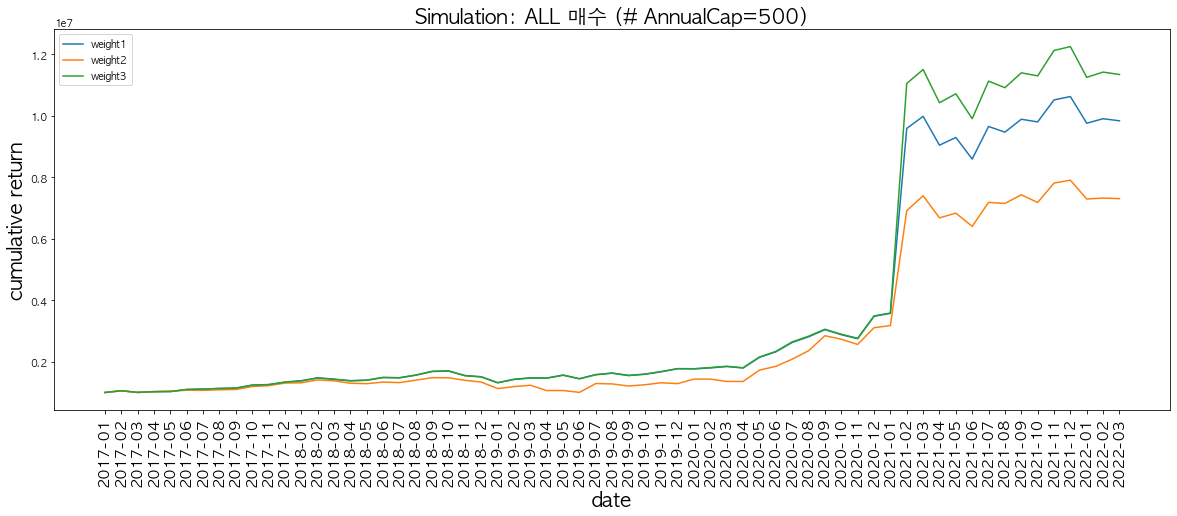

In [23]:
# Simulation: ALL 매수 (# AnnualCap=500)
plt.figure(figsize=(20,7))
plt.plot(ym_list, seed_list1_500, label='weight1')
plt.plot(ym_list, seed_list2_500, label='weight2')
plt.plot(ym_list, seed_list3_500, label='weight3')

plt.xticks(rotation=90, fontsize=15)
plt.xlabel('date', fontdict = {'fontsize' : 20})
plt.ylabel('cumulative return', fontdict = {'fontsize' : 20})
plt.title('Simulation: ALL 매수 (# AnnualCap=500)', fontdict = {'fontsize' : 20})
plt.legend()

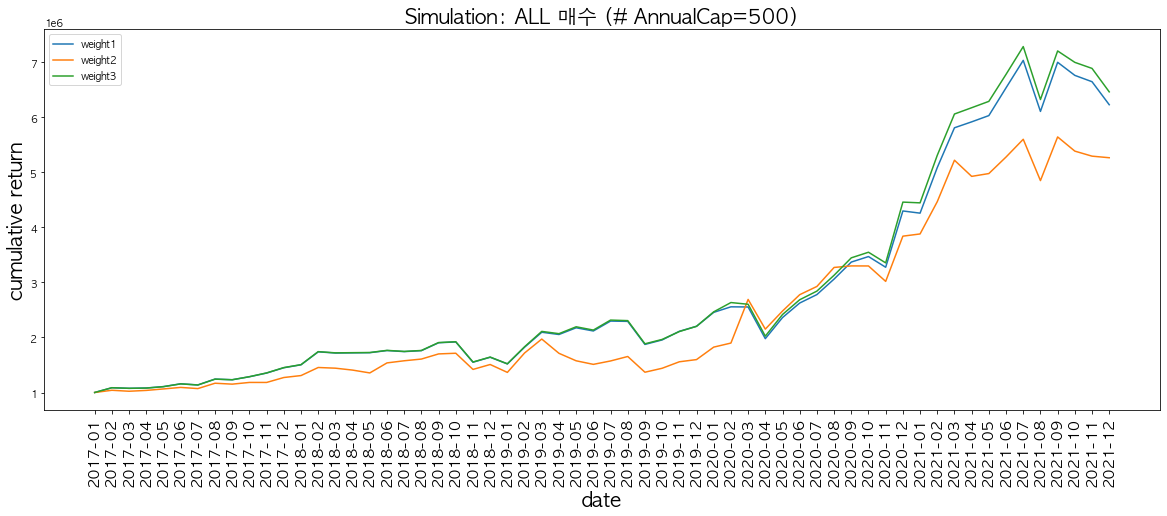

In [66]:
# Simulation: ALL 매수 (# AnnualCap=500)
plt.figure(figsize=(20,7))
plt.plot(ym_list, seed_list1_500, label='weight1')
plt.plot(ym_list, seed_list2_500, label='weight2')
plt.plot(ym_list, seed_list3_500, label='weight3')

plt.xticks(rotation=90, fontsize=15)
plt.xlabel('date', fontdict = {'fontsize' : 20})
plt.ylabel('cumulative return', fontdict = {'fontsize' : 20})
plt.title('Simulation: ALL 매수 (# AnnualCap=500)', fontdict = {'fontsize' : 20})
plt.legend()

## 1-3. AnnualCap=1000

In [69]:
seed_list1_1000, seed_list2_1000, seed_list3_1000 = Long(df_top10_1000)

initial seed: 1000000 


 ###### Trading Month 2017-01 ###### 

weight1로 top10 all 매도 ===> seed: 1000000
weight2로 top10 all 매도 ===> seed: 1000000
weight3로 top10 all 매도 ===> seed: 1000000


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:28: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
0,2017-01,63765,SWN,-0.167283,0.1,0.097562,0.104405
1,2017-01,14295,TWTR,0.080982,0.1,0.110206,0.104399
2,2017-01,13267,CZR,0.052941,0.1,0.050082,0.099970
3,2017-01,58975,OII,-0.012761,0.1,0.144590,0.099964
4,2017-01,87137,DVN,-0.002846,0.1,0.060064,0.098549
5,2017-01,24328,EQT,-0.072936,0.1,0.083611,0.098548
6,2017-01,75316,BID,-0.003763,0.1,0.111303,0.098545
7,2017-01,25487,CAR,0.014722,0.1,0.202835,0.098544
8,2017-01,13253,SLCA,0.043402,0.1,0.038786,0.098541
9,2017-01,93150,CIT,-0.034911,0.1,0.100961,0.098537



return 1 of 2017-02: -10245.43
return 2 of 2017-02: -12132.76
return 3 of 2017-02: -10545.36

 ###### Trading Month 2017-02 ###### 

weight1로 top10 all 매도 ===> seed: 989754.57
weight2로 top10 all 매도 ===> seed: 987867.24
weight3로 top10 all 매도 ===> seed: 989454.64


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:28: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
10,2017-02,13621,PBYI,0.132716,0.1,0.033050,0.105403
11,2017-02,14295,TWTR,-0.104994,0.1,0.045280,0.104269
12,2017-02,63765,SWN,-0.166482,0.1,0.040085,0.104267
13,2017-02,13643,ICPT,0.162551,0.1,0.061224,0.100086
14,2017-02,10180,AKRX,0.089529,0.1,0.645080,0.098146
15,2017-02,15134,JUNO,0.126523,0.1,0.021085,0.098070
16,2017-02,90178,ALNY,0.291323,0.1,0.025439,0.097814
17,2017-02,90664,DXCM,-0.012508,0.1,0.076280,0.097537
18,2017-02,13168,TRIP,-0.216068,0.1,0.029814,0.097236
19,2017-02,90988,BKD,-0.038076,0.1,0.022664,0.097172



return 1 of 2017-03: 26180.35
return 2 of 2017-03: 61725.45
return 3 of 2017-03: 25441.46

 ###### Trading Month 2017-03 ###### 

weight1로 top10 all 매도 ===> seed: 1015934.92
weight2로 top10 all 매도 ===> seed: 1049592.69
weight3로 top10 all 매도 ===> seed: 1014896.1


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:28: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
20,2017-03,13621,PBYI,0.013624,0.1,0.088669,0.103645
21,2017-03,13643,ICPT,-0.113567,0.1,0.164259,0.103408
22,2017-03,63765,SWN,0.087883,0.1,0.107545,0.103289
23,2017-03,14295,TWTR,-0.051998,0.1,0.121483,0.101303
24,2017-03,13267,CZR,0.010582,0.1,0.055206,0.099096
25,2017-03,89971,TPX,0.005845,0.1,0.049712,0.098138
26,2017-03,90178,ALNY,-0.007552,0.1,0.068249,0.097824
27,2017-03,91983,CLR,0.004867,0.1,0.043309,0.097769
28,2017-03,75241,PXD,0.001613,0.1,0.047979,0.097766
29,2017-03,12449,FLT,-0.109235,0.1,0.253590,0.097762



return 1 of 2017-04: -16045.41
return 2 of 2017-04: -43416.64
return 3 of 2017-04: -15917.41

 ###### Trading Month 2017-04 ###### 

weight1로 top10 all 매도 ===> seed: 999889.51
weight2로 top10 all 매도 ===> seed: 1006176.05
weight3로 top10 all 매도 ===> seed: 998978.69


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:28: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
30,2017-04,63765,SWN,-0.080783,0.1,0.128566,0.104550
31,2017-04,13621,PBYI,0.091398,0.1,0.106001,0.100446
32,2017-04,50017,RRC,-0.089691,0.1,0.052431,0.100261
33,2017-04,14295,TWTR,0.102341,0.1,0.145228,0.100143
34,2017-04,88031,MNST,-0.017111,0.1,0.056414,0.099104
35,2017-04,75241,PXD,-0.071095,0.1,0.057357,0.099104
36,2017-04,76709,IDXX,0.084859,0.1,0.048873,0.099102
37,2017-04,12449,FLT,-0.067952,0.1,0.303158,0.099099
38,2017-04,91983,CLR,-0.066270,0.1,0.051775,0.099097
39,2017-04,91516,AWI,0.015201,0.1,0.050198,0.099095



return 1 of 2017-05: -9909.26
return 2 of 2017-05: -14792.31
return 3 of 2017-05: -10125.51

 ###### Trading Month 2017-05 ###### 

weight1로 top10 all 매도 ===> seed: 989980.25
weight2로 top10 all 매도 ===> seed: 991383.74
weight3로 top10 all 매도 ===> seed: 988853.18


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:28: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
40,2017-05,63765,SWN,-0.193076,0.1,0.128996,0.102622
41,2017-05,50017,RRC,-0.129483,0.1,0.052606,0.101956
42,2017-05,14179,AR,-0.029259,0.1,0.067338,0.100465
43,2017-05,15017,SMAC,-0.548429,0.1,0.049625,0.099502
44,2017-05,88031,MNST,0.114147,0.1,0.056602,0.099246
45,2017-05,84723,LNG,0.074311,0.1,0.202030,0.099246
46,2017-05,13244,MTDR,0.051199,0.1,0.085954,0.099246
47,2017-05,76709,IDXX,0.003935,0.1,0.049037,0.099244
48,2017-05,75241,PXD,-0.035436,0.1,0.057549,0.099239
49,2017-05,90200,CAB,-0.032418,0.1,0.250262,0.099236



return 1 of 2017-06: -71724.85
return 2 of 2017-06: -44600.48
return 3 of 2017-06: -72268.11

 ###### Trading Month 2017-06 ###### 

weight1로 top10 all 매도 ===> seed: 918255.4
weight2로 top10 all 매도 ===> seed: 946783.26
weight3로 top10 all 매도 ===> seed: 916585.07


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:28: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
50,2017-06,50017,RRC,0.005637,0.1,0.007522,0.102684
51,2017-06,63765,SWN,0.003300,0.1,0.018445,0.102350
52,2017-06,14179,AR,0.050559,0.1,0.009629,0.100398
53,2017-06,13244,MTDR,-0.062308,0.1,0.012291,0.099232
54,2017-06,14695,KITE,0.433490,0.1,0.018030,0.099230
55,2017-06,75241,PXD,-0.043629,0.1,0.008229,0.099221
56,2017-06,89509,XEC,-0.125976,0.1,0.035740,0.099221
57,2017-06,90200,CAB,0.124740,0.1,0.035786,0.099221
58,2017-06,83462,TUP,-0.013906,0.1,0.669435,0.099221
59,2017-06,19166,FMC,-0.028592,0.1,0.184892,0.099221



return 1 of 2017-07: 31525.04
return 2 of 2017-07: -6961.75
return 3 of 2017-07: 31307.33

 ###### Trading Month 2017-07 ###### 

weight1로 top10 all 매도 ===> seed: 949780.44
weight2로 top10 all 매도 ===> seed: 939821.51
weight3로 top10 all 매도 ===> seed: 947892.4


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:28: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
60,2017-07,14179,AR,-0.045812,0.1,0.012045,0.101531
61,2017-07,81774,FCX,0.217319,0.1,0.009348,0.101460
62,2017-07,93422,QEP,-0.151485,0.1,0.018261,0.101410
63,2017-07,63765,SWN,-0.062500,0.1,0.023074,0.101303
64,2017-07,50017,RRC,-0.088908,0.1,0.009410,0.101275
65,2017-07,58975,OII,0.123030,0.1,0.034196,0.099352
66,2017-07,15069,MRO,0.032067,0.1,0.009558,0.099263
67,2017-07,13244,MTDR,0.135236,0.1,0.015375,0.098141
68,2017-07,84319,LAD,0.095723,0.1,0.031326,0.098133
69,2017-07,83462,TUP,-0.135555,0.1,0.837408,0.098133



return 1 of 2017-08: 11313.35
return 2 of 2017-08: -101019.95
return 3 of 2017-08: 10872.28

 ###### Trading Month 2017-08 ###### 

weight1로 top10 all 매도 ===> seed: 961093.79
weight2로 top10 all 매도 ===> seed: 838801.56
weight3로 top10 all 매도 ===> seed: 958764.68


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:28: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
70,2017-08,15069,MRO,-0.086672,0.1,0.029300,0.102024
71,2017-08,63765,SWN,-0.043860,0.1,0.070734,0.101839
72,2017-08,93422,QEP,-0.119020,0.1,0.055981,0.100415
73,2017-08,50017,RRC,-0.177641,0.1,0.028846,0.100392
74,2017-08,58975,OII,-0.115010,0.1,0.104831,0.100000
75,2017-08,81774,FCX,0.010944,0.1,0.028657,0.099859
76,2017-08,62341,PDCE,-0.166030,0.1,0.510584,0.098989
77,2017-08,13253,SLCA,-0.065911,0.1,0.028120,0.098857
78,2017-08,89393,NFLX,-0.038258,0.1,0.077420,0.098812
79,2017-08,76082,COG,0.029353,0.1,0.065527,0.098812



return 1 of 2017-09: -74206.62
return 2 of 2017-09: -98002.65
return 3 of 2017-09: -74144.59

 ###### Trading Month 2017-09 ###### 

weight1로 top10 all 매도 ===> seed: 886887.17
weight2로 top10 all 매도 ===> seed: 740798.91
weight3로 top10 all 매도 ===> seed: 884620.09


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:28: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
80,2017-09,14295,TWTR,-0.002365,0.1,0.122978,0.101571
81,2017-09,15069,MRO,0.219425,0.1,0.045096,0.101554
82,2017-09,50017,RRC,0.128456,0.1,0.044398,0.101471
83,2017-09,63765,SWN,0.121101,0.1,0.108868,0.101384
84,2017-09,93422,QEP,0.135099,0.1,0.086160,0.101265
85,2017-09,14179,AR,0.010665,0.1,0.056831,0.099485
86,2017-09,13253,SLCA,0.144157,0.1,0.043280,0.098335
87,2017-09,76644,X,-0.035701,0.1,0.192611,0.098324
88,2017-09,92239,CXO,0.186987,0.1,0.180620,0.098306
89,2017-09,89393,NFLX,0.038006,0.1,0.119158,0.098304



return 1 of 2017-10: 83884.43
return 2 of 2017-10: 58080.81
return 3 of 2017-10: 83933.52

 ###### Trading Month 2017-10 ###### 

weight1로 top10 all 매도 ===> seed: 970771.6
weight2로 top10 all 매도 ===> seed: 798879.72
weight3로 top10 all 매도 ===> seed: 968553.61


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:28: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
90,2017-10,14295,TWTR,0.222288,0.1,0.147091,0.101603
91,2017-10,15069,MRO,0.048673,0.1,0.053939,0.101468
92,2017-10,50017,RRC,-0.074604,0.1,0.053103,0.101444
93,2017-10,93422,QEP,0.044341,0.1,0.103055,0.101429
94,2017-10,63765,SWN,-0.091653,0.1,0.130215,0.101385
95,2017-10,14179,AR,-0.025126,0.1,0.067974,0.099481
96,2017-10,89393,NFLX,0.083154,0.1,0.142522,0.098301
97,2017-10,76082,COG,0.035514,0.1,0.120628,0.098301
98,2017-10,13244,MTDR,-0.022099,0.1,0.086766,0.098296
99,2017-10,20395,CVBF,-0.007033,0.1,0.094706,0.098292



return 1 of 2017-11: 20721.5
return 2 of 2017-11: 28631.0
return 3 of 2017-11: 20788.14

 ###### Trading Month 2017-11 ###### 

weight1로 top10 all 매도 ===> seed: 991493.1
weight2로 top10 all 매도 ===> seed: 827510.72
weight3로 top10 all 매도 ===> seed: 989341.75


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:28: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
100,2017-11,90988,BKD,0.065803,0.1,0.054507,0.102137
101,2017-11,63765,SWN,0.145946,0.1,0.096404,0.101996
102,2017-11,50017,RRC,-0.004970,0.1,0.039315,0.101962
103,2017-11,13643,ICPT,-0.003570,0.1,0.147242,0.101800
104,2017-11,76082,COG,0.046931,0.1,0.089306,0.098696
105,2017-11,20395,CVBF,0.030595,0.1,0.070115,0.098682
106,2017-11,75976,NEOG,0.046135,0.1,0.098731,0.098682
107,2017-11,84597,AMTD,0.027805,0.1,0.124739,0.098682
108,2017-11,76709,IDXX,-0.058735,0.1,0.036647,0.098682
109,2017-11,92402,MSCI,0.099864,0.1,0.242994,0.098682



return 1 of 2017-12: 39243.75
return 2 of 2017-12: 44196.53
return 3 of 2017-12: 39319.46

 ###### Trading Month 2017-12 ###### 

weight1로 top10 all 매도 ===> seed: 1030736.85
weight2로 top10 all 매도 ===> seed: 871707.25
weight3로 top10 all 매도 ===> seed: 1028661.21


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:28: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
110,2017-12,15017,SMAC,7.695652,0.1,0.040151,0.137042
111,2017-12,90988,BKD,-0.092610,0.1,0.059010,0.099621
112,2017-12,50017,RRC,-0.052164,0.1,0.042563,0.097475
113,2017-12,63765,SWN,-0.122642,0.1,0.104369,0.097430
114,2017-12,77462,M,0.074265,0.1,0.050715,0.095809
115,2017-12,58975,OII,0.081883,0.1,0.154678,0.095412
116,2017-12,91063,VIAB,0.094986,0.1,0.120702,0.094746
117,2017-12,77659,BBBY,-0.011166,0.1,0.085025,0.094224
118,2017-12,76082,COG,-0.012090,0.1,0.096685,0.094123
119,2017-12,12449,FLT,0.058063,0.1,0.246101,0.094117



return 1 of 2018-01: 795128.76
return 2 of 2018-01: 286418.87
return 3 of 2018-01: 1085820.25

 ###### Trading Month 2018-01 ###### 

weight1로 top10 all 매도 ===> seed: 1825865.61
weight2로 top10 all 매도 ===> seed: 1158126.12
weight3로 top10 all 매도 ===> seed: 2114481.46


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:28: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
120,2018-01,85675,EVHC,0.041377,0.1,0.071546,0.101336
121,2018-01,90775,THS,-0.046502,0.1,0.030484,0.100479
122,2018-01,13456,TSRO,-0.185954,0.1,0.166901,0.100054
123,2018-01,91603,AFSI,0.332671,0.1,0.054185,0.099789
124,2018-01,23085,SCG,0.021619,0.1,0.092855,0.099775
125,2018-01,15456,FL,0.055034,0.1,0.416558,0.099764
126,2018-01,89540,DKS,0.094642,0.1,0.092600,0.099739
127,2018-01,89217,AAP,0.173538,0.1,0.031600,0.099700
128,2018-01,78170,SM,0.057518,0.1,0.021845,0.099697
129,2018-01,90979,UA,-0.039501,0.1,0.021426,0.099668



return 1 of 2018-02: 92104.35
return 2 of 2018-02: 32569.61
return 3 of 2018-02: 106354.43

 ###### Trading Month 2018-02 ###### 

weight1로 top10 all 매도 ===> seed: 1917969.96
weight2로 top10 all 매도 ===> seed: 1190695.73
weight3로 top10 all 매도 ===> seed: 2220835.89


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:28: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
130,2018-02,13456,TSRO,-0.181293,0.1,0.099390,0.100378
131,2018-02,14436,RARE,-0.103842,0.1,0.022070,0.100312
132,2018-02,91603,AFSI,-0.108048,0.1,0.032267,0.099978
133,2018-02,23085,SCG,-0.023868,0.1,0.055296,0.099969
134,2018-02,50017,RRC,-0.067368,0.1,0.232249,0.099957
135,2018-02,39538,MAT,0.003788,0.1,0.029393,0.099941
136,2018-02,89540,DKS,0.017800,0.1,0.055144,0.099920
137,2018-02,89217,AAP,-0.023421,0.1,0.018818,0.099882
138,2018-02,85675,EVHC,0.069742,0.1,0.042606,0.099880
139,2018-02,14040,S,-0.026266,0.1,0.412766,0.099781



return 1 of 2018-03: -84923.24
return 2 of 2018-03: -57131.17
return 3 of 2018-03: -98548.02

 ###### Trading Month 2018-03 ###### 

weight1로 top10 all 매도 ===> seed: 1833046.72
weight2로 top10 all 매도 ===> seed: 1133564.56
weight3로 top10 all 매도 ===> seed: 2122287.87


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:28: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
140,2018-03,13456,TSRO,0.034583,0.1,0.132764,0.101217
141,2018-03,60986,NWL,-0.008174,0.1,0.024792,0.100194
142,2018-03,14436,RARE,0.066513,0.1,0.029480,0.100066
143,2018-03,85675,EVHC,-0.001818,0.1,0.056913,0.099942
144,2018-03,90775,THS,0.006575,0.1,0.024249,0.099887
145,2018-03,23085,SCG,-0.038001,0.1,0.073863,0.099856
146,2018-03,91603,AFSI,0.042607,0.1,0.043102,0.099809
147,2018-03,14040,S,-0.059730,0.1,0.551366,0.099780
148,2018-03,39538,MAT,-0.172956,0.1,0.039262,0.099719
149,2018-03,14686,NSAM,-0.263496,0.1,0.024207,0.099528



return 1 of 2018-04: -72203.35
return 2 of 2018-04: -46098.94
return 3 of 2018-04: -83113.42

 ###### Trading Month 2018-04 ###### 

weight1로 top10 all 매도 ===> seed: 1760843.37
weight2로 top10 all 매도 ===> seed: 1087465.62
weight3로 top10 all 매도 ===> seed: 2039174.45


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:28: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
150,2018-04,13456,TSRO,-0.109030,0.1,0.100379,0.101557
151,2018-04,90775,THS,0.006010,0.1,0.018334,0.100428
152,2018-04,79906,INCY,-0.256690,0.1,0.014337,0.099982
153,2018-04,14040,S,0.149590,0.1,0.416871,0.099747
154,2018-04,39538,MAT,0.125475,0.1,0.029685,0.099747
155,2018-04,23085,SCG,-0.020772,0.1,0.055846,0.099742
156,2018-04,60986,NWL,0.084380,0.1,0.018745,0.099728
157,2018-04,15456,FL,-0.046443,0.1,0.250529,0.099724
158,2018-04,79915,NFX,0.220311,0.1,0.052244,0.099679
159,2018-04,85675,EVHC,-0.032787,0.1,0.043030,0.099665



return 1 of 2018-05: 21137.84
return 2 of 2018-05: 54868.89
return 3 of 2018-05: 23874.05

 ###### Trading Month 2018-05 ###### 

weight1로 top10 all 매도 ===> seed: 1781981.21
weight2로 top10 all 매도 ===> seed: 1142334.51
weight3로 top10 all 매도 ===> seed: 2063048.5


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:28: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
160,2018-05,13456,TSRO,-0.100962,0.1,0.090579,0.101508
161,2018-05,14686,NSAM,-0.036007,0.1,0.016515,0.100777
162,2018-05,90507,MIC,0.047493,0.1,0.162497,0.100516
163,2018-05,60986,NWL,-0.138255,0.1,0.016915,0.099700
164,2018-05,14040,S,-0.083779,0.1,0.376173,0.099647
165,2018-05,15456,FL,0.252786,0.1,0.226071,0.099612
166,2018-05,23085,SCG,-0.012782,0.1,0.050394,0.099608
167,2018-05,81696,DISH,-0.119225,0.1,0.017525,0.099592
168,2018-05,39538,MAT,0.048649,0.1,0.026787,0.099591
169,2018-05,90775,THS,0.244416,0.1,0.016544,0.099450



return 1 of 2018-06: 18235.43
return 2 of 2018-06: 27284.19
return 3 of 2018-06: 20526.6

 ###### Trading Month 2018-06 ###### 

weight1로 top10 all 매도 ===> seed: 1800216.64
weight2로 top10 all 매도 ===> seed: 1169618.7
weight3로 top10 all 매도 ===> seed: 2083575.1


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:28: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
170,2018-06,14686,NSAM,0.078098,0.1,0.046627,0.100610
171,2018-06,77610,OLED,-0.130707,0.1,0.097232,0.100173
172,2018-06,79906,INCY,-0.018603,0.1,0.036525,0.100169
173,2018-06,13456,TSRO,-0.028403,0.1,0.255731,0.100087
174,2018-06,93295,SPB,0.024219,0.1,0.026663,0.099894
175,2018-06,81696,DISH,0.137394,0.1,0.049477,0.099877
176,2018-06,90775,THS,0.096013,0.1,0.046709,0.099855
177,2018-06,60986,NWL,0.093724,0.1,0.047755,0.099834
178,2018-06,23085,SCG,0.061157,0.1,0.142276,0.099771
179,2018-06,87659,EPC,0.154163,0.1,0.251003,0.099730



return 1 of 2018-07: 84080.17
return 2 of 2018-07: 54726.78
return 3 of 2018-07: 97137.25

 ###### Trading Month 2018-07 ###### 

weight1로 top10 all 매도 ===> seed: 1884296.81
weight2로 top10 all 매도 ===> seed: 1224345.48
weight3로 top10 all 매도 ===> seed: 2180712.35


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:28: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
180,2018-07,14686,NSAM,-0.012821,0.1,0.039231,0.101296
181,2018-07,13456,TSRO,-0.216775,0.1,0.215165,0.100964
182,2018-07,79906,INCY,-0.006866,0.1,0.030731,0.099984
183,2018-07,90507,MIC,0.076066,0.1,0.386002,0.099738
184,2018-07,23085,SCG,0.041373,0.1,0.119707,0.099701
185,2018-07,89216,AYI,0.201001,0.1,0.019372,0.099684
186,2018-07,81696,DISH,-0.060994,0.1,0.041628,0.099668
187,2018-07,16753,ATUS,0.004103,0.1,0.086985,0.099666
188,2018-07,16595,SNAP,-0.045073,0.1,0.021878,0.099655
189,2018-07,90775,THS,-0.095601,0.1,0.039300,0.099644



return 1 of 2018-08: -21779.59
return 2 of 2018-08: -19679.78
return 3 of 2018-08: -25756.84

 ###### Trading Month 2018-08 ###### 

weight1로 top10 all 매도 ===> seed: 1862517.22
weight2로 top10 all 매도 ===> seed: 1204665.7
weight3로 top10 all 매도 ===> seed: 2154955.51


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:28: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
190,2018-08,77610,OLED,0.271028,0.1,0.083401,0.100621
191,2018-08,13456,TSRO,-0.068332,0.1,0.219353,0.100268
192,2018-08,79906,INCY,0.110760,0.1,0.031330,0.100142
193,2018-08,14686,NSAM,-0.004870,0.1,0.039994,0.099999
194,2018-08,16753,ATUS,0.046118,0.1,0.088678,0.099865
195,2018-08,81696,DISH,0.120089,0.1,0.042439,0.099861
196,2018-08,60986,NWL,-0.161894,0.1,0.040962,0.099851
197,2018-08,89216,AYI,0.099331,0.1,0.019749,0.099835
198,2018-08,90507,MIC,0.057917,0.1,0.393515,0.099786
199,2018-08,11552,CELG,0.048396,0.1,0.040579,0.099771



return 1 of 2018-09: 96579.56
return 2 of 2018-09: 48381.36
return 3 of 2018-09: 112017.5

 ###### Trading Month 2018-09 ###### 

weight1로 top10 all 매도 ===> seed: 1959096.78
weight2로 top10 all 매도 ===> seed: 1253047.06
weight3로 top10 all 매도 ===> seed: 2266973.01


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:28: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
200,2018-09,79906,INCY,-0.065350,0.1,0.046947,0.100238
201,2018-09,13456,TSRO,0.202157,0.1,0.328696,0.100170
202,2018-09,14686,NSAM,0.011419,0.1,0.059931,0.100152
203,2018-09,93179,PPC,-0.021633,0.1,0.081708,0.100047
204,2018-09,60986,NWL,-0.065378,0.1,0.061381,0.100033
205,2018-09,81696,DISH,0.011598,0.1,0.063593,0.099982
206,2018-09,13688,PCG,-0.003681,0.1,0.133809,0.099972
207,2018-09,16753,ATUS,0.012277,0.1,0.132883,0.099953
208,2018-09,11552,CELG,-0.052515,0.1,0.060807,0.099807
209,2018-09,15284,BPMC,0.018130,0.1,0.030246,0.099647



return 1 of 2018-10: 9212.57
return 2 of 2018-10: 72069.8
return 3 of 2018-10: 10706.69

 ###### Trading Month 2018-10 ###### 

weight1로 top10 all 매도 ===> seed: 1968309.35
weight2로 top10 all 매도 ===> seed: 1325116.86
weight3로 top10 all 매도 ===> seed: 2277679.7


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:28: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
210,2018-10,13456,TSRO,-0.259677,0.1,0.223361,0.101117
211,2018-10,14686,NSAM,-0.036125,0.1,0.040725,0.100204
212,2018-10,79906,INCY,-0.061668,0.1,0.031902,0.100165
213,2018-10,66683,RES,-0.038760,0.1,0.158225,0.100092
214,2018-10,60986,NWL,-0.217734,0.1,0.041710,0.100071
215,2018-10,11552,CELG,-0.199911,0.1,0.041320,0.099831
216,2018-10,93179,PPC,-0.023770,0.1,0.055524,0.099691
217,2018-10,81696,DISH,-0.140380,0.1,0.043214,0.099639
218,2018-10,79338,SGMS,-0.123622,0.1,0.249497,0.099607
219,2018-10,15264,SUM,-0.257426,0.1,0.114521,0.099583



return 1 of 2018-11: -267507.37
return 2 of 2018-11: -202246.41
return 3 of 2018-11: -309732.71

 ###### Trading Month 2018-11 ###### 

weight1로 top10 all 매도 ===> seed: 1700801.98
weight2로 top10 all 매도 ===> seed: 1122870.45
weight3로 top10 all 매도 ===> seed: 1967946.99


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:28: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
220,2018-11,79338,SGMS,-0.124888,0.1,0.106422,0.101251
221,2018-11,79906,INCY,-0.008794,0.1,0.013608,0.099992
222,2018-11,13456,TSRO,0.605956,0.1,0.095274,0.099964
223,2018-11,15264,SUM,0.074074,0.1,0.048848,0.099909
224,2018-11,93179,PPC,0.123443,0.1,0.023683,0.099854
225,2018-11,14686,NSAM,0.049404,0.1,0.017371,0.099852
226,2018-11,16664,FND,0.295153,0.1,0.013597,0.099815
227,2018-11,60986,NWL,0.488035,0.1,0.017791,0.099806
228,2018-11,92570,DAN,-0.061657,0.1,0.008936,0.099778
229,2018-11,76081,THO,-0.026278,0.1,0.654471,0.099778



return 1 of 2018-12: 240569.57
return 2 of 2018-12: 52402.18
return 3 of 2018-12: 277687.59

 ###### Trading Month 2018-12 ###### 

weight1로 top10 all 매도 ===> seed: 1941371.55
weight2로 top10 all 매도 ===> seed: 1175272.63
weight3로 top10 all 매도 ===> seed: 2245634.58


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:28: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
230,2018-12,66384,WDC,-0.174488,0.1,0.017485,0.100547
231,2018-12,79338,SGMS,-0.082136,0.1,0.108872,0.100434
232,2018-12,15264,SUM,-0.144828,0.1,0.049973,0.100327
233,2018-12,89533,WYNN,-0.095887,0.1,0.535013,0.100313
234,2018-12,80539,NKTR,-0.186185,0.1,0.012477,0.099889
235,2018-12,91668,IPGP,-0.203025,0.1,0.019675,0.099865
236,2018-12,16664,FND,-0.218231,0.1,0.013910,0.099796
237,2018-12,88159,EXEL,-0.031512,0.1,0.106292,0.099657
238,2018-12,90178,ALNY,-0.101651,0.1,0.038837,0.099631
239,2018-12,13456,TSRO,0.600906,0.1,0.097467,0.099540



return 1 of 2019-01: -123672.26
return 2 of 2019-01: -33628.01
return 3 of 2019-01: -143828.01

 ###### Trading Month 2019-01 ###### 

weight1로 top10 all 매도 ===> seed: 1817699.29
weight2로 top10 all 매도 ===> seed: 1141644.62
weight3로 top10 all 매도 ===> seed: 2101806.57


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:28: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
240,2019-01,17701,SMAR,0.262269,0.1,0.058653,0.531004
241,2019-01,14686,NSAM,0.297009,0.1,0.067147,0.052136
242,2019-01,11600,XRAY,0.127385,0.1,0.498007,0.052132
243,2019-01,90177,ACAD,0.408782,0.1,0.050931,0.052125
244,2019-01,85593,AMG,0.077073,0.1,0.036878,0.052116
245,2019-01,77610,OLED,0.109651,0.1,0.073212,0.052113
246,2019-01,91531,OC,0.196226,0.1,0.032895,0.052105
247,2019-01,24476,COHR,0.118153,0.1,0.066528,0.052095
248,2019-01,89900,SNX,0.201571,0.1,0.033288,0.052091
249,2019-01,13085,VAC,0.255708,0.1,0.082460,0.052085



return 1 of 2019-02: 373323.84
return 2 of 2019-02: 197008.81
return 3 of 2019-02: 488938.67

 ###### Trading Month 2019-02 ###### 

weight1로 top10 all 매도 ===> seed: 2191023.13
weight2로 top10 all 매도 ===> seed: 1338653.43
weight3로 top10 all 매도 ===> seed: 2590745.24


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:28: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
250,2019-02,13983,COTY,0.433634,0.1,0.002604,0.100404
251,2019-02,16968,MDB,0.099610,0.1,0.001759,0.100017
252,2019-02,16140,TWLO,0.093155,0.1,0.013293,0.100000
253,2019-02,16068,RETA,0.182650,0.1,0.002082,0.099961
254,2019-02,13643,ICPT,-0.173517,0.1,0.007802,0.099950
255,2019-02,85002,SRPT,0.032424,0.1,0.456414,0.099948
256,2019-02,15065,FGEN,0.018502,0.1,0.007909,0.099934
257,2019-02,14596,FIVN,0.037356,0.1,0.482985,0.099929
258,2019-02,13914,DATA,0.031758,0.1,0.014764,0.099928
259,2019-02,88863,EXAS,0.010213,0.1,0.010388,0.099928



return 1 of 2019-03: 167785.53
return 2 of 2019-03: 47029.23
return 3 of 2019-03: 198836.04

 ###### Trading Month 2019-03 ###### 

weight1로 top10 all 매도 ===> seed: 2358808.66
weight2로 top10 all 매도 ===> seed: 1385682.66
weight3로 top10 all 매도 ===> seed: 2789581.28


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:28: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
260,2019-03,13983,COTY,0.045455,0.1,0.061687,0.103515
261,2019-03,13688,PCG,0.045214,0.1,0.033699,0.102456
262,2019-03,16068,RETA,-0.094022,0.1,0.049319,0.099357
263,2019-03,14828,SAGE,-0.001256,0.1,0.053979,0.099263
264,2019-03,15183,ONCE,0.005119,0.1,0.032720,0.099238
265,2019-03,92221,MELI,0.106672,0.1,0.092252,0.099234
266,2019-03,77610,OLED,0.024859,0.1,0.115758,0.099234
267,2019-03,17977,TLRY,-0.194195,0.1,0.035300,0.099234
268,2019-03,16309,TTD,0.002076,0.1,0.068029,0.099234
269,2019-03,86196,ULTI,-0.004133,0.1,0.457256,0.099234



return 1 of 2019-04: -15146.05
return 2 of 2019-04: 5411.18
return 3 of 2019-04: -16857.89

 ###### Trading Month 2019-04 ###### 

weight1로 top10 all 매도 ===> seed: 2343662.61
weight2로 top10 all 매도 ===> seed: 1391093.84
weight3로 top10 all 매도 ===> seed: 2772723.39


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:28: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
270,2019-04,13688,PCG,0.265169,0.1,0.016236,0.103558
271,2019-04,17977,TLRY,-0.216575,0.1,0.017007,0.101224
272,2019-04,86580,NVDA,0.008020,0.1,0.029428,0.100604
273,2019-04,14567,GRUB,-0.038578,0.1,0.069478,0.100240
274,2019-04,90175,XPO,0.266840,0.1,0.040054,0.100175
275,2019-04,79678,ATVI,0.058862,0.1,0.066789,0.099704
276,2019-04,76839,FIZZ,-0.029967,0.1,0.033101,0.098894
277,2019-04,13141,WPX,0.059497,0.1,0.015741,0.098789
278,2019-04,83534,NBIX,-0.180023,0.1,0.020254,0.098412
279,2019-04,13730,PBF,0.078356,0.1,0.691913,0.098400


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례



return 1 of 2019-05: 63654.05
return 2 of 2019-05: 88071.32
return 3 of 2019-05: 77594.58

 ###### Trading Month 2019-05 ###### 

weight1로 top10 all 매도 ===> seed: 2407316.66
weight2로 top10 all 매도 ===> seed: 1479165.16
weight3로 top10 all 매도 ===> seed: 2850317.97


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight3'] = abs(df1['ret_pred'])/abs(df1['ret_pred']).sum() # w3: predicted return에 비례


,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
280,2019-05,13688,PCG,-0.240675,0.1,0.028772,0.102302
281,2019-05,90175,XPO,-0.234871,0.1,0.070980,0.100987
282,2019-05,15408,KHC,-0.156137,0.1,0.031768,0.100473
283,2019-05,76839,FIZZ,-0.193750,0.1,0.058658,0.099529
284,2019-05,16347,AA,-0.205772,0.1,0.171364,0.099461
285,2019-05,80539,NKTR,-0.021861,0.1,0.033861,0.099461
286,2019-05,60986,NWL,-0.050765,0.1,0.057851,0.099454
287,2019-05,14239,COMM,-0.348265,0.1,0.189697,0.099445
288,2019-05,23819,HAL,-0.248500,0.1,0.314351,0.099445
289,2019-05,89826,TCBI,-0.114785,0.1,0.042699,0.099445



return 1 of 2019-06: -437019.56
return 2 of 2019-06: -337163.8
return 3 of 2019-06: -518076.02

 ###### Trading Month 2019-06 ###### 

weight1로 top10 all 매도 ===> seed: 1970297.1
weight2로 top10 all 매도 ===> seed: 1142001.36
weight3로 top10 all 매도 ===> seed: 2332241.95


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:28: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
290,2019-06,17977,TLRY,0.224941,0.1,0.017628,0.101954
291,2019-06,60986,NWL,0.149031,0.1,0.033837,0.100131
292,2019-06,19502,WBA,0.108026,0.1,0.523241,0.100061
293,2019-06,80539,NKTR,0.136015,0.1,0.019805,0.099705
294,2019-06,15408,KHC,0.122604,0.1,0.018581,0.099698
295,2019-06,76839,FIZZ,-0.011517,0.1,0.034309,0.099696
296,2019-06,13688,PCG,0.340351,0.1,0.016829,0.099690
297,2019-06,16347,AA,0.104766,0.1,0.100231,0.099689
298,2019-06,14044,AGIO,0.080355,0.1,0.159395,0.099689
299,2019-06,16738,AM,-0.062193,0.1,0.076144,0.099689



return 1 of 2019-07: 234934.23
return 2 of 2019-07: 107815.82
return 3 of 2019-07: 278670.18

 ###### Trading Month 2019-07 ###### 

weight1로 top10 all 매도 ===> seed: 2205231.33
weight2로 top10 all 매도 ===> seed: 1249817.18
weight3로 top10 all 매도 ===> seed: 2610912.13


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:28: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
300,2019-07,93436,TSLA,0.081223,0.1,0.128627,0.103077
301,2019-07,17977,TLRY,-0.123282,0.1,0.030871,0.102581
302,2019-07,11664,GDOT,0.036605,0.1,0.198962,0.101645
303,2019-07,76839,FIZZ,-0.024647,0.1,0.060084,0.099567
304,2019-07,76644,X,-0.018289,0.1,0.205452,0.099134
305,2019-07,91277,QRTEA,0.141243,0.1,0.027437,0.098921
306,2019-07,79881,URBN,0.046593,0.1,0.032900,0.098849
307,2019-07,16432,GT,-0.092157,0.1,0.113035,0.098802
308,2019-07,16304,NTNX,-0.124904,0.1,0.027104,0.098726
309,2019-07,16347,AA,-0.039299,0.1,0.175529,0.098700



return 1 of 2019-08: -25782.14
return 2 of 2019-08: -8256.47
return 3 of 2019-08: -30177.9

 ###### Trading Month 2019-08 ###### 

weight1로 top10 all 매도 ===> seed: 2179449.19
weight2로 top10 all 매도 ===> seed: 1241560.71
weight3로 top10 all 매도 ===> seed: 2580734.23


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:28: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
310,2019-08,60986,NWL,0.186047,0.1,0.028570,0.100074
311,2019-08,39538,MAT,-0.328767,0.1,0.054694,0.100072
312,2019-08,76644,X,-0.260146,0.1,0.099056,0.100070
313,2019-08,17977,TLRY,-0.371142,0.1,0.014884,0.100022
314,2019-08,79881,URBN,-0.016800,0.1,0.015862,0.100019
315,2019-08,14040,S,-0.073670,0.1,0.617414,0.099952
316,2019-08,16595,SNAP,-0.057738,0.1,0.017450,0.099952
317,2019-08,15398,CC,-0.243838,0.1,0.014103,0.099947
318,2019-08,11664,GDOT,-0.396725,0.1,0.095927,0.099947
319,2019-08,57817,JWN,-0.113863,0.1,0.042040,0.099945



return 1 of 2019-09: -365415.74
return 2 of 2019-09: -170094.48
return 3 of 2019-09: -432671.33

 ###### Trading Month 2019-09 ###### 

weight1로 top10 all 매도 ===> seed: 1814033.45
weight2로 top10 all 매도 ===> seed: 1071466.23
weight3로 top10 all 매도 ===> seed: 2148062.9


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:28: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
320,2019-09,60986,NWL,0.127711,0.1,0.101451,0.108242
321,2019-09,13688,PCG,-0.043062,0.1,0.050456,0.104276
322,2019-09,13947,BLUE,-0.111219,0.1,0.137592,0.098438
323,2019-09,15284,BPMC,-0.041737,0.1,0.053071,0.098438
324,2019-09,15065,FGEN,-0.171966,0.1,0.280486,0.098438
325,2019-09,15183,ONCE,-0.004414,0.1,0.048990,0.098438
326,2019-09,16068,RETA,0.041375,0.1,0.073842,0.098438
327,2019-09,14828,SAGE,-0.182793,0.1,0.080819,0.098438
328,2019-09,88545,MDCO,0.191611,0.1,0.120871,0.098428
329,2019-09,14054,MRTX,-0.049530,0.1,0.052422,0.098427



return 1 of 2019-10: -44266.87
return 2 of 2019-10: -49650.33
return 3 of 2019-10: -49452.7

 ###### Trading Month 2019-10 ###### 

weight1로 top10 all 매도 ===> seed: 1769766.58
weight2로 top10 all 매도 ===> seed: 1021815.9
weight3로 top10 all 매도 ===> seed: 2098610.2


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:28: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
330,2019-10,13688,PCG,-0.383000,0.1,0.022700,0.101264
331,2019-10,15408,KHC,0.157330,0.1,0.025064,0.101024
332,2019-10,60986,NWL,0.013355,0.1,0.045642,0.100744
333,2019-10,24328,EQT,0.009398,0.1,0.039408,0.099746
334,2019-10,16381,BL,-0.022380,0.1,0.037101,0.099539
335,2019-10,17685,DOCU,0.068960,0.1,0.028960,0.099539
336,2019-10,85992,MANH,-0.070906,0.1,0.053929,0.099539
337,2019-10,92050,PODD,-0.118899,0.1,0.032510,0.099539
338,2019-10,86810,TREX,-0.033432,0.1,0.669723,0.099539
339,2019-10,17864,BJ,0.032083,0.1,0.044963,0.099527



return 1 of 2019-11: -61497.85
return 2 of 2019-11: -31922.79
return 3 of 2019-11: -73448.05

 ###### Trading Month 2019-11 ###### 

weight1로 top10 all 매도 ===> seed: 1708268.73
weight2로 top10 all 매도 ===> seed: 989893.11
weight3로 top10 all 매도 ===> seed: 2025162.15


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:28: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
340,2019-11,13688,PCG,0.209076,0.1,0.078862,0.102037
341,2019-11,16068,RETA,-0.053135,0.1,0.115414,0.099799
342,2019-11,15408,KHC,-0.044231,0.1,0.087074,0.099795
343,2019-11,17948,ALLK,0.384840,0.1,0.075713,0.099770
344,2019-11,18135,GH,0.117554,0.1,0.151205,0.099770
345,2019-11,16381,BL,0.151476,0.1,0.128894,0.099768
346,2019-11,17685,DOCU,0.075842,0.1,0.100612,0.099768
347,2019-11,92050,PODD,0.277869,0.1,0.112945,0.099768
348,2019-11,14136,RNG,0.067793,0.1,0.075924,0.099768
349,2019-11,76841,BIIB,0.003683,0.1,0.073357,0.099757



return 1 of 2019-12: 203415.09
return 2 of 2019-12: 116186.42
return 3 of 2019-12: 241547.49

 ###### Trading Month 2019-12 ###### 

weight1로 top10 all 매도 ===> seed: 1911683.82
weight2로 top10 all 매도 ===> seed: 1106079.53
weight3로 top10 all 매도 ===> seed: 2266709.64


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:28: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
350,2019-12,16738,AM,0.657205,0.1,0.125408,0.100541
351,2019-12,16689,BTU,-0.057851,0.1,0.205864,0.100531
352,2019-12,76392,MMSI,0.115000,0.1,0.039340,0.100379
353,2019-12,80539,NKTR,0.063824,0.1,0.032619,0.100306
354,2019-12,14567,GRUB,0.128015,0.1,0.118608,0.100304
355,2019-12,14983,W,0.064178,0.1,0.070299,0.100194
356,2019-12,18482,PD,-0.102111,0.1,0.152296,0.100001
357,2019-12,13688,PCG,0.457105,0.1,0.027716,0.099262
358,2019-12,40125,DXC,0.012590,0.1,0.198816,0.099256
359,2019-12,17977,TLRY,-0.136593,0.1,0.029033,0.099227



return 1 of 2020-01: 229662.46
return 2 of 2020-01: 102274.58
return 3 of 2020-01: 272762.41

 ###### Trading Month 2020-01 ###### 

weight1로 top10 all 매도 ===> seed: 2141346.28
weight2로 top10 all 매도 ===> seed: 1208354.11
weight3로 top10 all 매도 ===> seed: 2539472.05


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:28: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
360,2020-01,17201,MOSC,0.619835,0.1,0.350767,0.107822
361,2020-01,18368,NFE,-0.039566,0.1,0.222493,0.107276
362,2020-01,17907,VTIQ,0.001948,0.1,0.044587,0.107122
363,2020-01,13688,PCG,0.399264,0.1,0.049305,0.104876
364,2020-01,24328,EQT,-0.444954,0.1,0.041498,0.101831
365,2020-01,14567,GRUB,0.113281,0.1,0.086360,0.097150
366,2020-01,18150,ETRN,-0.276198,0.1,0.034402,0.097102
367,2020-01,17987,GSAH,0.124207,0.1,0.037503,0.094175
368,2020-01,80539,NKTR,-0.078527,0.1,0.032317,0.094148
369,2020-01,14983,W,0.036848,0.1,0.100769,0.088499



return 1 of 2020-02: 97675.04
return 2 of 2020-02: 261049.44
return 3 of 2020-02: 129791.43

 ###### Trading Month 2020-02 ###### 

weight1로 top10 all 매도 ===> seed: 2239021.32
weight2로 top10 all 매도 ===> seed: 1469403.55
weight3로 top10 all 매도 ===> seed: 2669263.48


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:28: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
370,2020-02,17907,VTIQ,0.002901,0.1,0.012144,0.114604
371,2020-02,18368,NFE,-0.066445,0.1,0.060597,0.114584
372,2020-02,14828,SAGE,-0.290887,0.1,0.011885,0.103503
373,2020-02,13688,PCG,0.019066,0.1,0.013428,0.101114
374,2020-02,17341,ZS,-0.073097,0.1,0.019663,0.098783
375,2020-02,91277,QRTEA,-0.200469,0.1,0.811986,0.095892
376,2020-02,15198,NVTA,0.092761,0.1,0.007162,0.093789
377,2020-02,24328,EQT,-0.024793,0.1,0.011302,0.092980
378,2020-02,17987,GSAH,-0.049194,0.1,0.010214,0.092573
379,2020-02,75107,ABMD,-0.193408,0.1,0.041620,0.092177



return 1 of 2020-03: -175441.65
return 2 of 2020-03: -263868.57
return 3 of 2020-03: -207914.48

 ###### Trading Month 2020-03 ###### 

weight1로 top10 all 매도 ===> seed: 2063579.67
weight2로 top10 all 매도 ===> seed: 1205534.98
weight3로 top10 all 매도 ===> seed: 2461349.0


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:28: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
380,2020-03,17907,VTIQ,0.026037,0.1,0.012278,0.120527
381,2020-03,18368,NFE,-0.303203,0.1,0.061268,0.120033
382,2020-03,14828,SAGE,-0.388936,0.1,0.012016,0.107701
383,2020-03,24328,EQT,0.204429,0.1,0.011427,0.102684
384,2020-03,13688,PCG,-0.420000,0.1,0.013577,0.094815
385,2020-03,89509,XEC,-0.490772,0.1,0.038986,0.091222
386,2020-03,92852,LOPE,-0.054474,0.1,0.010122,0.091165
387,2020-03,15408,KHC,0.014937,0.1,0.008060,0.090995
388,2020-03,91277,QRTEA,-0.104839,0.1,0.820969,0.090722
389,2020-03,15398,CC,-0.403096,0.1,0.011298,0.090136



return 1 of 2020-04: -396189.94
return 2 of 2020-04: -164536.29
return 3 of 2020-04: -463217.46

 ###### Trading Month 2020-04 ###### 

weight1로 top10 all 매도 ===> seed: 1667389.73
weight2로 top10 all 매도 ===> seed: 1040998.69
weight3로 top10 all 매도 ===> seed: 1998131.54


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:28: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
390,2020-04,17907,VTIQ,0.245301,0.1,0.011014,0.238648
391,2020-04,18368,NFE,0.320735,0.1,0.054960,0.235258
392,2020-04,15831,AXSM,0.615332,0.1,0.100017,0.066025
393,2020-04,13323,ENPH,0.450294,0.1,0.010831,0.065991
394,2020-04,18150,ETRN,0.666004,0.1,0.008498,0.065947
395,2020-04,14828,SAGE,0.357242,0.1,0.010779,0.065931
396,2020-04,18203,KOD,0.143606,0.1,0.761366,0.065801
397,2020-04,13262,CCXI,0.319313,0.1,0.007392,0.065492
398,2020-04,14983,W,1.321108,0.1,0.024892,0.065471
399,2020-04,24328,EQT,1.063649,0.1,0.010251,0.065435



return 1 of 2020-05: 917495.35
return 2 of 2020-05: 262066.95
return 3 of 2020-05: 915683.04

 ###### Trading Month 2020-05 ###### 

weight1로 top10 all 매도 ===> seed: 2584885.08
weight2로 top10 all 매도 ===> seed: 1303065.64
weight3로 top10 all 매도 ===> seed: 2913814.58


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:28: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
400,2020-05,18368,NFE,0.072699,0.1,0.248142,0.289536
401,2020-05,17907,VTIQ,1.166038,0.1,0.049727,0.205827
402,2020-05,18150,ETRN,-0.016706,0.1,0.038368,0.063099
403,2020-05,92775,TREE,0.042708,0.1,0.032709,0.063085
404,2020-05,14229,OMF,-0.022718,0.1,0.146313,0.063083
405,2020-05,81655,DRI,0.041605,0.1,0.031655,0.063080
406,2020-05,13356,PSX,0.081864,0.1,0.086052,0.063076
407,2020-05,14558,ALLY,0.064064,0.1,0.083808,0.063071
408,2020-05,76804,MTG,0.131327,0.1,0.152895,0.063071
409,2020-05,14776,SYF,0.040424,0.1,0.130330,0.063071



return 1 of 2020-06: 413918.66
return 2 of 2020-06: 146639.58
return 3 of 2020-06: 827289.06

 ###### Trading Month 2020-06 ###### 

weight1로 top10 all 매도 ===> seed: 2998803.74
weight2로 top10 all 매도 ===> seed: 1449705.22
weight3로 top10 all 매도 ===> seed: 3741103.64


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:28: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
410,2020-06,18368,NFE,-0.065609,0.1,0.013386,0.160551
411,2020-06,17907,VTIQ,1.352962,0.1,0.002683,0.121056
412,2020-06,90664,DXCM,0.071608,0.1,0.011444,0.090229
413,2020-06,85913,MAR,-0.031299,0.1,0.001988,0.089757
414,2020-06,13323,ENPH,-0.182506,0.1,0.002638,0.089755
415,2020-06,17341,ZS,0.116322,0.1,0.004343,0.089749
416,2020-06,85992,MANH,0.065611,0.1,0.003246,0.089743
417,2020-06,43757,IMMU,0.055076,0.1,0.016164,0.089739
418,2020-06,90436,HALO,0.104656,0.1,0.002384,0.089713
419,2020-06,14596,FIVN,0.062092,0.1,0.941725,0.089708



return 1 of 2020-07: 464488.25
return 2 of 2020-07: 91851.15
return 3 of 2020-07: 661245.22

 ###### Trading Month 2020-07 ###### 

weight1로 top10 all 매도 ===> seed: 3463291.99
weight2로 top10 all 매도 ===> seed: 1541556.37
weight3로 top10 all 매도 ===> seed: 4402348.86


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:28: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
420,2020-07,13262,CCXI,-0.083942,0.1,0.007253,0.101610
421,2020-07,93436,TSLA,0.325011,0.1,0.025930,0.101072
422,2020-07,18203,KOD,-0.143939,0.1,0.746963,0.100767
423,2020-07,18312,MRNA,0.154026,0.1,0.032727,0.100674
424,2020-07,87000,STMP,0.416952,0.1,0.017867,0.099899
425,2020-07,82779,NVAX,0.716857,0.1,0.007369,0.099648
426,2020-07,13323,ENPH,0.268867,0.1,0.010626,0.099540
427,2020-07,15831,AXSM,-0.133082,0.1,0.098125,0.099098
428,2020-07,90664,DXCM,0.074346,0.1,0.046097,0.099089
429,2020-07,14136,RNG,0.018455,0.1,0.007043,0.098603



return 1 of 2020-08: 558819.99
return 2 of 2020-08: -136535.29
return 3 of 2020-08: 709526.71

 ###### Trading Month 2020-08 ###### 

weight1로 top10 all 매도 ===> seed: 4022111.98
weight2로 top10 all 매도 ===> seed: 1405021.08
weight3로 top10 all 매도 ===> seed: 5111875.57


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:28: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
430,2020-08,40125,DXC,0.115578,0.1,0.189226,0.101443
431,2020-08,88661,TPR,0.102545,0.1,0.065799,0.101046
432,2020-08,21020,AAL,0.173561,0.1,0.032498,0.101031
433,2020-08,13983,COTY,-0.035040,0.1,0.032492,0.100988
434,2020-08,89002,ADS,0.021641,0.1,0.046950,0.100658
435,2020-08,13688,PCG,-0.009626,0.1,0.049086,0.099998
436,2020-08,89509,XEC,0.144726,0.1,0.140947,0.099180
437,2020-08,61815,NBL,-0.002002,0.1,0.274003,0.098632
438,2020-08,34833,OXY,-0.190597,0.1,0.133442,0.098602
439,2020-08,87137,DVN,0.061010,0.1,0.035558,0.098421



return 1 of 2020-09: 153562.78
return 2 of 2020-09: 42500.72
return 3 of 2020-09: 197658.0

 ###### Trading Month 2020-09 ###### 

weight1로 top10 all 매도 ===> seed: 4175674.76
weight2로 top10 all 매도 ===> seed: 1447521.8
weight3로 top10 all 매도 ===> seed: 5309533.57


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:28: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
440,2020-09,82779,NVAX,-0.018035,0.1,0.015906,0.100477
441,2020-09,18790,LVGO,0.020029,0.1,0.022344,0.100402
442,2020-09,76591,QDEL,0.246761,0.1,0.021064,0.100385
443,2020-09,87337,PLUG,0.033128,0.1,0.084365,0.100368
444,2020-09,18312,MRNA,0.090307,0.1,0.070641,0.100171
445,2020-09,87000,STMP,-0.033649,0.1,0.038566,0.100086
446,2020-09,93436,TSLA,-0.139087,0.1,0.055971,0.099727
447,2020-09,13262,CCXI,0.024299,0.1,0.015655,0.099645
448,2020-09,18580,FSLY,0.009048,0.1,0.063560,0.099483
449,2020-09,15585,TDOC,0.016459,0.1,0.611930,0.099256



return 1 of 2020-10: 104082.36
return 2 of 2020-10: 23851.09
return 3 of 2020-10: 133043.12

 ###### Trading Month 2020-10 ###### 

weight1로 top10 all 매도 ===> seed: 4279757.12
weight2로 top10 all 매도 ===> seed: 1471372.89
weight3로 top10 all 매도 ===> seed: 5442576.69


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:28: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
450,2020-10,17907,VTIQ,-0.105957,0.1,0.024293,0.100211
451,2020-10,93436,TSLA,-0.095499,0.1,0.058296,0.100116
452,2020-10,18580,FSLY,-0.322054,0.1,0.066201,0.100069
453,2020-10,13262,CCXI,-0.124088,0.1,0.016305,0.100057
454,2020-10,17685,DOCU,-0.060351,0.1,0.409195,0.100032
455,2020-10,18484,ZM,-0.019570,0.1,0.027096,0.100020
456,2020-10,87337,PLUG,0.043997,0.1,0.087870,0.099998
457,2020-10,18312,MRNA,-0.046360,0.1,0.073576,0.099917
458,2020-10,15831,AXSM,-0.069333,0.1,0.220601,0.099917
459,2020-10,82779,NVAX,-0.255099,0.1,0.016567,0.099664



return 1 of 2020-11: -451220.97
return 2 of 2020-11: -111495.76
return 3 of 2020-11: -573653.24

 ###### Trading Month 2020-11 ###### 

weight1로 top10 all 매도 ===> seed: 3828536.15
weight2로 top10 all 매도 ===> seed: 1359877.13
weight3로 top10 all 매도 ===> seed: 4868923.45


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:28: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
460,2020-11,13983,COTY,1.479310,0.1,0.039107,0.105069
461,2020-11,83799,STRA,0.137611,0.1,0.096624,0.102241
462,2020-11,34833,OXY,0.726177,0.1,0.160609,0.100112
463,2020-11,16386,IRTC,0.156349,0.1,0.185383,0.099088
464,2020-11,82779,NVAX,0.728410,0.1,0.036436,0.099035
465,2020-11,93436,TSLA,0.462736,0.1,0.128209,0.098949
466,2020-11,18484,ZM,0.037860,0.1,0.059592,0.098923
467,2020-11,87337,PLUG,0.885000,0.1,0.193250,0.098886
468,2020-11,13323,ENPH,0.392293,0.1,0.052539,0.098883
469,2020-11,76591,QDEL,-0.272988,0.1,0.048250,0.098814



return 1 of 2020-12: 1811953.77
return 2 of 2020-12: 657299.08
return 3 of 2020-12: 2330717.6

 ###### Trading Month 2020-12 ###### 

weight1로 top10 all 매도 ===> seed: 5640489.92
weight2로 top10 all 매도 ===> seed: 2017176.21
weight3로 top10 all 매도 ===> seed: 7199641.05


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:28: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
470,2020-12,83799,STRA,0.015337,0.1,0.071968,0.104640
471,2020-12,85269,VLO,0.052074,0.1,0.190396,0.099671
472,2020-12,13356,PSX,0.154506,0.1,0.068862,0.099654
473,2020-12,13641,FANG,0.211211,0.1,0.288401,0.099565
474,2020-12,82779,NVAX,-0.200645,0.1,0.027139,0.099494
475,2020-12,18484,ZM,-0.294841,0.1,0.044386,0.099455
476,2020-12,93436,TSLA,0.243252,0.1,0.095494,0.099406
477,2020-12,13323,ENPH,0.284836,0.1,0.039133,0.099405
478,2020-12,87337,PLUG,0.284956,0.1,0.143939,0.099390
479,2020-12,18776,IMVT,-0.060988,0.1,0.030282,0.099319



return 1 of 2021-01: 389024.01
return 2 of 2021-01: 277532.37
return 3 of 2021-01: 494575.25

 ###### Trading Month 2021-01 ###### 

weight1로 top10 all 매도 ===> seed: 6029513.93
weight2로 top10 all 매도 ===> seed: 2294708.58
weight3로 top10 all 매도 ===> seed: 7694216.3


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:28: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
480,2021-01,19230,CIIC,-0.041607,0.1,0.046262,0.178842
481,2021-01,14328,AMC,5.254717,0.1,0.052735,0.177969
482,2021-01,34833,OXY,0.158868,0.1,0.209858,0.080494
483,2021-01,91983,CLR,0.207976,0.1,0.072890,0.080458
484,2021-01,17907,VTIQ,0.513106,0.1,0.054288,0.080434
485,2021-01,82779,NVAX,0.981347,0.1,0.175934,0.080393
486,2021-01,16309,TTD,-0.043708,0.1,0.053617,0.080393
487,2021-01,89002,ADS,-0.087044,0.1,0.234799,0.080366
488,2021-01,16595,SNAP,0.057320,0.1,0.047417,0.080334
489,2021-01,15069,MRO,0.085457,0.1,0.052200,0.080316



return 1 of 2021-02: 4272773.41
return 2 of 2021-02: 1167055.23
return 3 of 2021-02: 8297309.69

 ###### Trading Month 2021-02 ###### 

weight1로 top10 all 매도 ===> seed: 10302287.34
weight2로 top10 all 매도 ===> seed: 3461763.81
weight3로 top10 all 매도 ===> seed: 15991525.99


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:28: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
490,2021-02,19230,CIIC,-0.149165,0.1,0.041680,0.217936
491,2021-02,34833,OXY,0.326521,0.1,0.189075,0.086984
492,2021-02,91983,CLR,0.228035,0.1,0.065671,0.086977
493,2021-02,14328,AMC,-0.395928,0.1,0.047512,0.086962
494,2021-02,89002,ADS,0.429564,0.1,0.211545,0.086918
495,2021-02,19228,BEAM,-0.075703,0.1,0.031246,0.086876
496,2021-02,18312,MRNA,-0.105971,0.1,0.180306,0.086865
497,2021-02,13983,COTY,0.204082,0.1,0.066184,0.086845
498,2021-02,87337,PLUG,-0.234130,0.1,0.128404,0.086831
499,2021-02,91594,SPR,0.264541,0.1,0.038377,0.086806



return 1 of 2021-03: 506712.6
return 2 of 2021-03: 396991.9
return 3 of 2021-03: 371142.81

 ###### Trading Month 2021-03 ###### 

weight1로 top10 all 매도 ===> seed: 10808999.94
weight2로 top10 all 매도 ===> seed: 3858755.71
weight3로 top10 all 매도 ===> seed: 16362668.8


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:28: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
500,2021-03,19230,CIIC,-0.299608,0.1,0.015276,0.224280
501,2021-03,87337,PLUG,-0.259198,0.1,0.047061,0.086273
502,2021-03,17907,VTIQ,-0.232597,0.1,0.017927,0.086254
503,2021-03,82670,TGTX,0.101211,0.1,0.053084,0.086234
504,2021-03,18572,BYND,-0.105582,0.1,0.302299,0.086195
505,2021-03,19228,BEAM,-0.101986,0.1,0.011452,0.086159
506,2021-03,17944,TENB,-0.115497,0.1,0.128790,0.086153
507,2021-03,88518,APPS,-0.026765,0.1,0.028824,0.086151
508,2021-03,82779,NVAX,-0.215889,0.1,0.058095,0.086151
509,2021-03,12360,PACB,0.089630,0.1,0.337193,0.086151



return 1 of 2021-04: -1260631.85
return 2 of 2021-04: -179905.69
return 3 of 2021-04: -2322082.62

 ###### Trading Month 2021-04 ###### 

weight1로 top10 all 매도 ===> seed: 9548368.09
weight2로 top10 all 매도 ===> seed: 3678850.02
weight3로 top10 all 매도 ===> seed: 14040586.18


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:28: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
510,2021-04,87337,PLUG,-0.204520,0.1,0.052547,0.100076
511,2021-04,15533,NK,-0.252317,0.1,0.019141,0.100067
512,2021-04,82779,NVAX,0.306767,0.1,0.064867,0.100067
513,2021-04,19228,BEAM,0.024488,0.1,0.012787,0.100011
514,2021-04,18937,SBE,-0.051685,0.1,0.082727,0.100011
515,2021-04,18572,BYND,0.011989,0.1,0.337537,0.099981
516,2021-04,14970,HUBS,0.159045,0.1,0.085877,0.099975
517,2021-04,18214,TWST,0.083401,0.1,0.016420,0.099940
518,2021-04,88518,APPS,-0.061349,0.1,0.032184,0.099936
519,2021-04,18368,NFE,-0.073840,0.1,0.295913,0.099936



return 1 of 2021-05: -55400.77
return 2 of 2021-05: -16150.58
return 3 of 2021-05: -81643.94

 ###### Trading Month 2021-05 ###### 

weight1로 top10 all 매도 ===> seed: 9492967.32
weight2로 top10 all 매도 ===> seed: 3662699.44
weight3로 top10 all 매도 ===> seed: 13958942.24


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:28: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
520,2021-05,88518,APPS,-0.122763,0.1,0.037015,0.100022
521,2021-05,15533,NK,-0.011268,0.1,0.022014,0.100022
522,2021-05,82779,NVAX,-0.376947,0.1,0.074605,0.100010
523,2021-05,93436,TSLA,-0.118713,0.1,0.040867,0.100010
524,2021-05,17367,LPRO,-0.012036,0.1,0.028814,0.100001
525,2021-05,19338,SKLZ,-0.030251,0.1,0.015137,0.099996
526,2021-05,18368,NFE,-0.007526,0.1,0.340337,0.099985
527,2021-05,18456,SWAV,0.100575,0.1,0.017938,0.099985
528,2021-05,18453,LAZR,-0.098462,0.1,0.057760,0.099984
529,2021-05,19358,NARI,-0.239216,0.1,0.365513,0.099984



return 1 of 2021-06: -870131.23
return 2 of 2021-06: -485129.65
return 3 of 2021-06: -1279537.9

 ###### Trading Month 2021-06 ###### 

weight1로 top10 all 매도 ===> seed: 8622836.09
weight2로 top10 all 매도 ===> seed: 3177569.79
weight3로 top10 all 매도 ===> seed: 12679404.34


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:28: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
530,2021-06,15533,NK,-0.186325,0.1,0.023942,0.100019
531,2021-06,19338,SKLZ,0.278399,0.1,0.016463,0.100019
532,2021-06,18456,SWAV,0.054641,0.1,0.019509,0.100017
533,2021-06,18453,LAZR,0.070210,0.1,0.062818,0.100007
534,2021-06,20196,UPST,-0.157334,0.1,0.017828,0.100007
535,2021-06,17367,LPRO,0.116900,0.1,0.031338,0.100001
536,2021-06,19228,BEAM,0.645277,0.1,0.015994,0.099984
537,2021-06,18368,NFE,-0.100237,0.1,0.370141,0.099983
538,2021-06,93436,TSLA,0.087137,0.1,0.044445,0.099983
539,2021-06,19358,NARI,0.072800,0.1,0.397522,0.099977



return 1 of 2021-07: 760076.13
return 2 of 2021-07: 39682.59
return 3 of 2021-07: 1117532.7

 ###### Trading Month 2021-07 ###### 

weight1로 top10 all 매도 ===> seed: 9382912.22
weight2로 top10 all 매도 ===> seed: 3217252.38
weight3로 top10 all 매도 ===> seed: 13796937.04


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:28: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
540,2021-07,16698,APPN,-0.154773,0.1,0.111148,0.100145
541,2021-07,18453,LAZR,-0.161731,0.1,0.090903,0.100016
542,2021-07,17685,DOCU,0.066066,0.1,0.509410,0.099997
543,2021-07,19338,SKLZ,-0.351750,0.1,0.023823,0.099997
544,2021-07,18456,SWAV,-0.040742,0.1,0.028230,0.099994
545,2021-07,20196,UPST,-0.033147,0.1,0.025799,0.099985
546,2021-07,19228,BEAM,-0.285215,0.1,0.023145,0.099977
547,2021-07,17367,LPRO,-0.118125,0.1,0.045348,0.099969
548,2021-07,17104,APLS,0.012500,0.1,0.024780,0.099960
549,2021-07,82779,NVAX,-0.155339,0.1,0.117414,0.099960



return 1 of 2021-08: -1146831.45
return 2 of 2021-08: -123935.59
return 3 of 2021-08: -1686441.51

 ###### Trading Month 2021-08 ###### 

weight1로 top10 all 매도 ===> seed: 8236080.77
weight2로 top10 all 매도 ===> seed: 3093316.79
weight3로 top10 all 매도 ===> seed: 12110495.53


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:28: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
550,2021-08,84032,NOV,-0.046343,0.1,0.031881,0.102334
551,2021-08,13688,PCG,0.043231,0.1,0.091847,0.102334
552,2021-08,34833,OXY,-0.015709,0.1,0.189016,0.101519
553,2021-08,89002,ADS,0.054370,0.1,0.211479,0.099443
554,2021-08,40125,DXC,-0.081541,0.1,0.191306,0.099420
555,2021-08,87337,PLUG,-0.044721,0.1,0.128363,0.099192
556,2021-08,20648,RBLX,0.065861,0.1,0.040482,0.098950
557,2021-08,18456,SWAV,0.176978,0.1,0.038099,0.098941
558,2021-08,16595,SNAP,0.022709,0.1,0.042708,0.098936
559,2021-08,20196,UPST,0.897317,0.1,0.034818,0.098932



return 1 of 2021-09: 883032.98
return 2 of 2021-09: 96831.97
return 3 of 2021-09: 1283687.16

 ###### Trading Month 2021-09 ###### 

weight1로 top10 all 매도 ===> seed: 9119113.75
weight2로 top10 all 매도 ===> seed: 3190148.76
weight3로 top10 all 매도 ===> seed: 13394182.69


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:28: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
560,2021-09,17977,TLRY,-0.175310,0.1,0.003097,0.102208
561,2021-09,84032,NOV,-0.004556,0.1,0.002426,0.101043
562,2021-09,13688,PCG,0.046892,0.1,0.006990,0.101043
563,2021-09,34833,OXY,0.151810,0.1,0.014385,0.100574
564,2021-09,89002,ADS,0.028336,0.1,0.016095,0.100234
565,2021-09,39490,APA,0.100103,0.1,0.005192,0.100008
566,2021-09,40125,DXC,-0.084695,0.1,0.014560,0.100008
567,2021-09,85002,SRPT,0.183820,0.1,0.921158,0.098807
568,2021-09,18312,MRNA,0.021689,0.1,0.013718,0.098119
569,2021-09,19228,BEAM,-0.215561,0.1,0.002377,0.097955



return 1 of 2021-10: 47899.95
return 2 of 2021-10: 544917.39
return 3 of 2021-10: 69436.98

 ###### Trading Month 2021-10 ###### 

weight1로 top10 all 매도 ===> seed: 9167013.7
weight2로 top10 all 매도 ===> seed: 3735066.15
weight3로 top10 all 매도 ===> seed: 13463619.67


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:28: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
570,2021-10,17977,TLRY,-0.087688,0.1,0.003078,0.100765
571,2021-10,18312,MRNA,-0.103024,0.1,0.013637,0.100117
572,2021-10,72304,STAA,-0.078347,0.1,0.041628,0.100045
573,2021-10,16595,SNAP,-0.288209,0.1,0.003231,0.099946
574,2021-10,20196,UPST,0.017697,0.1,0.002634,0.099946
575,2021-10,19084,BILL,0.102491,0.1,0.003298,0.099945
576,2021-10,85002,SRPT,-0.144356,0.1,0.915683,0.099926
577,2021-10,13511,PANW,0.062818,0.1,0.002459,0.099871
578,2021-10,82779,NVAX,-0.282090,0.1,0.011988,0.099739
579,2021-10,19228,BEAM,0.020227,0.1,0.002363,0.099700



return 1 of 2021-11: -715467.61
return 2 of 2021-11: -526070.68
return 3 of 2021-11: -1050856.99

 ###### Trading Month 2021-11 ###### 

weight1로 top10 all 매도 ===> seed: 8451546.09
weight2로 top10 all 매도 ===> seed: 3208995.47
weight3로 top10 all 매도 ===> seed: 12412762.68


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:28: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
580,2021-11,13688,PCG,0.024138,0.1,0.072718,0.101049
581,2021-11,17977,TLRY,-0.017476,0.1,0.032216,0.100929
582,2021-11,84032,NOV,-0.149786,0.1,0.025242,0.100923
583,2021-11,57817,JWN,-0.263140,0.1,0.073061,0.100341
584,2021-11,40125,DXC,-0.079214,0.1,0.151463,0.099954
585,2021-11,89002,ADS,0.012008,0.1,0.167434,0.099409
586,2021-11,34833,OXY,-0.115717,0.1,0.149649,0.099390
587,2021-11,91103,UAL,-0.084092,0.1,0.040447,0.099359
588,2021-11,91594,SPR,-0.083071,0.1,0.030375,0.099356
589,2021-11,17783,CHX,-0.221883,0.1,0.257394,0.099290



return 1 of 2021-12: -826757.91
return 2 of 2021-12: -359902.45
return 3 of 2021-12: -1212852.64

 ###### Trading Month 2021-12 ###### 

weight1로 top10 all 매도 ===> seed: 7624788.18
weight2로 top10 all 매도 ===> seed: 2849093.02
weight3로 top10 all 매도 ===> seed: 11199910.04


/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight1'] = 1/nrow # w1: equal weight
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weight2'] = df1['me_last_year']/df1['me_last_year'].sum() # w2: 전년도 평균 시총에 비례
/var/folders/xs/m9hqs21n70g8d49d166ktg940000gn/T/ipykernel_13256/573110868.py:28: SettingWithCopyWarning: 
A value is trying to be

,yyyy_mm,permno,ticker,ret,weight1,weight2,weight3
590,2021-12,17977,TLRY,-0.305336,0.1,0.037753,0.101028
591,2021-12,84032,NOV,0.140940,0.1,0.029580,0.100659
592,2021-12,89002,ADS,-0.023328,0.1,0.196211,0.100643
593,2021-12,13688,PCG,0.021886,0.1,0.085216,0.100643
594,2021-12,91103,UAL,0.035968,0.1,0.047399,0.099936
595,2021-12,21020,AAL,0.015263,0.1,0.175018,0.099652
596,2021-12,91594,SPR,0.138405,0.1,0.035595,0.099458
597,2021-12,34833,OXY,-0.021922,0.1,0.175370,0.099333
598,2021-12,76661,IONS,0.148302,0.1,0.040362,0.099330
599,2021-12,40125,DXC,0.073358,0.1,0.177495,0.099317


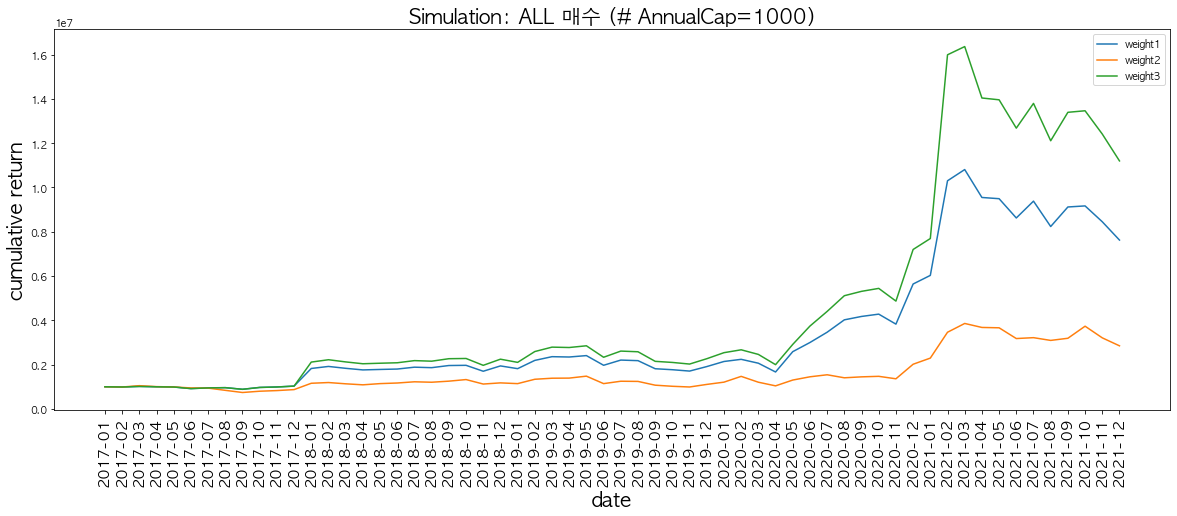

In [70]:
# Simulation: ALL 매수 (# AnnualCap=1000)
plt.figure(figsize=(20,7))
plt.plot(ym_list, seed_list1_1000, label='weight1')
plt.plot(ym_list, seed_list2_1000, label='weight2')
plt.plot(ym_list, seed_list3_1000, label='weight3')

plt.xticks(rotation=90, fontsize=15)
plt.xlabel('date', fontdict = {'fontsize' : 20})
plt.ylabel('cumulative return', fontdict = {'fontsize' : 20})
plt.title('Simulation: ALL 매수 (# AnnualCap=1000)', fontdict = {'fontsize' : 20})
plt.legend()

# 2. 매수 50% / 공매도 50%